In [1]:
from autometrics.dataset.datasets import HelpSteer
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeRubricProposer import LLMJudgeRubricProposer
import dspy
import litellm
from prometheus_eval.litellm import LiteLLM

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = HelpSteer()

In [3]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.1, seed=42, max_size=1000)

In [4]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3.1-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [5]:
llama31_70b_litellm = LiteLLM('openai/meta-llama/Meta-Llama-3.1-70b-Instruct', api_base="http://future-hgx-1:7410/v1", api_key='None') # VLLM endpoint

In [6]:
generator = LLMJudgeRubricProposer(train_dataset=train, task_description="Answer the user query as a helpful chatbot assistant.", proposer_model=llama31_70b, judge_model=llama31_70b)

In [7]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3.1-70b-Instruct'

In [8]:
new_metrics = []

for target_column in dataset.target_columns:
    new_metrics.extend(generator.generate(train, target_column, use_prometheus=False))

In [9]:
# Condense the metrics that have duplicate names
new_metrics_names = set()
new_metrics_final = []
for metric in new_metrics:
    if metric.name not in new_metrics_names:
        new_metrics_names.add(metric.name)
        new_metrics_final.append(metric)

In [10]:
for metric in new_metrics_final:
    metric.display()

,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,Completeness: The extent to which the output provides a thorough and detailed answer to the prompt.,"A score of 1 indicates that the response is incomplete and lacks essential information. The output may be brief, vague, or fail to address key aspects of the prompt. A response scoring 1 may demonstrate a limited understanding of the topic or may not provide sufficient detail to be considered a complete answer.",A score of 2 indicates that the response is partially complete but lacks significant information or clarity. The output may address some aspects of the prompt but omit important details or fail to provide a clear explanation. A response scoring 2 may demonstrate a basic understanding of the topic but may not provide sufficient depth or breadth to be considered a complete answer.,A score of 3 indicates that the response is generally complete but may lack some details or clarity. The output may address most aspects of the prompt but may omit some important information or provide a somewhat vague explanation. A response scoring 3 may demonstrate a good understanding of the topic but may not provide sufficient depth or breadth to be considered a comprehensive answer.,"A score of 4 indicates that the response is mostly complete and provides a good level of detail and clarity. The output may address all aspects of the prompt and provide a clear explanation, but may lack some nuance or depth. A response scoring 4 may demonstrate a strong understanding of the topic and provide a comprehensive answer, but may not be perfect in terms of detail or clarity.","A score of 5 indicates that the response is complete, providing a thorough and detailed answer to the prompt. The output addresses all aspects of the question, provides relevant information, and demonstrates a clear and comprehensive understanding of the topic. A response scoring 5 is well-written, clear, and concise, and provides a complete and accurate answer to the prompt."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"Coherence: The clarity and logical flow of the output, making it easy to understand.","A score of 1 indicates that the output is incoherent and lacks logical flow. The output may be disjointed, with sentences or paragraphs that do not relate to each other. The language may be ambiguous, making it difficult to understand the intended meaning. The output may also be overly verbose, with unnecessary words or phrases that detract from the overall clarity.","A score of 2 indicates that the output is somewhat incoherent, with some logical flow but also some areas of confusion. The output may be poorly organized, with sentences or paragraphs that do not follow a clear structure. The language may be somewhat ambiguous, with some words or phrases that are unclear. However, the overall meaning of the output may still be discernible with some effort.","A score of 3 indicates that the output is moderately coherent, with a clear structure and logical flow. The output may be well-organized, with sentences or paragraphs that follow a clear and logical sequence. The language may be clear and concise, with few areas of ambiguity. However, the output may still contain some minor errors or areas of confusion.","A score of 4 indicates that the output is highly coherent, with a clear and logical structure. The output may be well-organized, with sentences or paragraphs that follow a clear and logical sequence. The language may be clear and concise, with few areas of ambiguity. The output may also be engaging and easy to read, with a clear and concise writing style.","A score of 5 indicates that the output is exceptionally coherent, with a clear and logical structure that is easy to follow. The output may be extremely well-organized, with sentences or paragraphs that follow a clear and logical sequence. The language may be clear and concise, with no areas of ambiguity. The output may also be engaging and easy to read, with a clear and concise writing style that is free of errors."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,Relevance: The ability of the output to stay on topic and address the given prompt.,"A score of 1 indicates that the response is completely off-topic and fails to address the input prompt. The response may be unrelated to the subject matter, or it may provide unnecessary information that is not relevant to the prompt.","A score of 2 indicates that the response is somewhat off-topic, but may provide some tangential information that is loosely related to the prompt. The response may be overly verbose or provide unnecessary details that detract from the main topic.","A score of 3 indicates that the response is partially relevant, but may not fully address the input prompt. The response may provide some useful information, but may also include unnecessary details or tangents that detract from the main topic.","A score of 4 indicates that the response is mostly relevant and provides useful information that directly addresses the input prompt. The response may be concise and to the point, but may also include some minor tangents or unnecessary details.","A score of 5 indicates that the response is highly relevant and provides a clear, concise, and direct answer to the input prompt. The response is on-topic, provides useful information, and is free of unnecessary details or tangents."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,Contextual understanding: The ability of the output to demonstrate an understanding of the context and background information provided.,Score 1: The model's output demonstrates little to no understanding of the context. It may provide a generic or irrelevant response that does not take into account the background information provided.,"Score 2: The model's output shows some understanding of the context, but it is limited or superficial. It may identify some relevant information, but fails to recognize relationships between different pieces of information or use the context to inform its response.","Score 3: The model's output demonstrates a moderate understanding of the context. It may identify relevant information, recognize some relationships between different pieces of information, and use the context to inform its response, but may not fully capture the nuances and implications of the context.","Score 4: The model's output shows a strong understanding of the context. It identifies relevant information, recognizes relationships between different pieces of information, and uses the context to inform its response. It may also demonstrate an understanding of the nuances and implications of the context, but may not fully capture the subtleties of the topic.","Score 5: The model's output demonstrates an exceptional understanding of the context. It identifies all relevant information, recognizes complex relationships between different pieces of information, and uses the context to inform its response. It also demonstrates a deep understanding of the nuances and implications of the context, and provides a response that is insightful and informative."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"Tone: The level of formality, sincerity, and respect in the output, avoiding sarcasm and glibness.","A score of 1 indicates that the tone is completely off, with a high level of sarcasm, glibness, or disrespect. The output may come across as unhelpful, dismissive, or even rude, making the reader feel uncomfortable or undervalued.","A score of 2 indicates that the tone is somewhat off, with a noticeable level of sarcasm, glibness, or informality. The output may come across as slightly unhelpful or dismissive, but still attempts to provide some level of assistance.","A score of 3 indicates that the tone is neutral, with a moderate level of formality and sincerity. The output is somewhat helpful, but may lack a clear and engaging tone, making it feel somewhat generic or uninteresting.","A score of 4 indicates that the tone is good, with a high level of formality, sincerity, and respect. The output is helpful, engaging, and makes the reader feel valued and comfortable. However, there may be some minor issues with the tone, such as a slight hint of sarcasm or informality.","A score of 5 indicates that the tone is excellent, with a perfect balance of formality, sincerity, and respect. The output is highly engaging, professional, and makes the reader feel comfortable and valued. The tone is polished and refined, with no noticeable issues or areas for improvement."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Engagement**: The output's ability to capture the reader's attention, using tone, language, and style to convey enthusiasm and interest in the topic.","A score of 1 indicates that the output lacks engagement, tone, and style. The language is dull, and the content fails to capture the reader's attention. The output may be too formal, too long, or too boring, leading to a lack of interest in the topic.","A score of 2 indicates that the output shows some attempt at engagement, but it falls short. The tone may be somewhat formal, and the language may be somewhat dry. The content may be mildly interesting, but it fails to capture the reader's attention fully. The output may lack variety in sentence structure, vocabulary, or style.","A score of 3 indicates that the output is moderately engaging. The tone is somewhat informal, and the language is clear and concise. The content is somewhat interesting, and the output shows some attempt at using rhetorical devices, such as metaphors or allusions. However, the output may lack depth, and the language may not be particularly vivid or engaging.","A score of 4 indicates that the output is engaging and well-written. The tone is informal and conversational, and the language is vivid and engaging. The content is interesting, and the output shows a good use of rhetorical devices, such as metaphors, allusions, or repetition. The output may use humor, irony, or other literary devices to capture the reader's attention.","A score of 5 indicates that the output is highly engaging and exceptionally well-written. The tone is informal and conversational, and the language is vivid, engaging, and memorable. The content is fascinating, and the output shows a masterful use of rhetorical devices, such as metaphors, allusions, or repetition. The output may use humor, irony, or other literary devices to capture the reader's attention and leave a lasting impression."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Accuracy**: The output's factual correctness, precision, and attention to detail, ensuring that the information provided is reliable.","A score of 1 indicates that the output is completely inaccurate, containing numerous factual errors, and lacks attention to detail. The information provided is unreliable and may be misleading.","A score of 2 indicates that the output contains some inaccuracies, with a few factual errors and a lack of attention to detail in certain areas. While some information may be correct, the output is not entirely reliable.","A score of 3 indicates that the output is partially accurate, with some correct information and some minor errors or inaccuracies. The output shows some attention to detail but may lack precision in certain areas.","A score of 4 indicates that the output is mostly accurate, with a high degree of factual correctness and attention to detail. However, there may be some minor errors or inaccuracies that do not significantly impact the overall reliability of the information.","A score of 5 indicates that the output is entirely accurate, with a high degree of factual correctness, precision, and attention to detail. The information provided is reliable and trustworthy, with no errors or inaccuracies."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Grammar and syntax**: The quality of the grammar and syntax used in the output, with good examples using proper grammar and syntax and bad examples using poor grammar and syntax.","A score of 1 indicates that the output contains severe grammatical errors, making it difficult to understand. The output may contain multiple errors in verb tense, subject-verb agreement, pronoun usage, and sentence structure. The errors are so severe that they hinder the reader's ability to comprehend the intended meaning.","A score of 2 indicates that the output contains noticeable grammatical errors, but the meaning is still clear. The output may contain errors in verb tense, subject-verb agreement, pronoun usage, and sentence structure, but they do not significantly impede the reader's understanding. The errors are noticeable but do not dominate the text.","A score of 3 indicates that the output contains some minor grammatical errors, but the meaning is clear. The output may contain a few errors in verb tense, subject-verb agreement, pronoun usage, and sentence structure, but they do not significantly affect the reader's understanding. The errors are minor and do not detract from the overall quality of the text.","A score of 4 indicates that the output contains only a few minor errors, and the meaning is clear. The output may contain a single error or a few very minor errors in verb tense, subject-verb agreement, pronoun usage, and sentence structure, but they do not affect the reader's understanding. The errors are very minor and do not detract from the overall quality of the text.","A score of 5 indicates that the output is free of grammatical errors and is well-written. The output demonstrates a strong command of grammar and syntax, with no errors in verb tense, subject-verb agreement, pronoun usage, and sentence structure. The text is clear, concise, and well-organized, making it easy for the reader to understand the intended meaning."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,"**Informative value**: The amount of useful and accurate information provided in the output, with good examples providing detailed and accurate information and bad examples providing incomplete or inaccurate information.","A score of 1 indicates that the output provides little to no useful information. The response may be incomplete, inaccurate, or lack relevant details.","A score of 2 indicates that the output provides some useful information, but it is incomplete or lacks relevant details. The response may be partially accurate, but it does not fully address the task or prompt.","A score of 3 indicates that the output provides some useful information, but it is not entirely accurate or lacks relevant details. The response may be partially complete, but it does not fully address the task or prompt.","A score of 4 indicates that the output provides a good amount of useful and accurate information. The response is mostly complete and addresses the task or prompt, but it may lack some relevant details or have minor inaccuracies.","A score of 5 indicates that the output provides a high amount of useful and accurate information. The response is complete, accurate, and fully addresses the task or prompt, providing all relevant details and information."


,Criteria,Score 1,Score 2,Score 3,Score 4,Score 5
0,Conciseness: The ability of the model to provide clear and concise responses that directly address the user's query.,"A score of 1 indicates that the model's response is overly verbose and fails to effectively communicate the necessary information. The response may contain irrelevant details, repetitive phrases, or unnecessary tangents that detract from the main point.","A score of 2 indicates that the model's response is somewhat concise but still contains some unnecessary information. The response may be slightly wordy or contain a few irrelevant details, but it still manages to convey the main point.","A score of 3 indicates that the model's response is generally concise and effectively communicates the necessary information. The response may contain a few minor flaws, such as a slight redundancy or a brief tangent, but overall, it is clear and to the point.",A score of 4 indicates that the model's response is very concise and effectively communicates the necessary information in a clear and direct manner. The response is well-structured and free of unnecessary words or phrases.,"A score of 5 indicates that the model's response is extremely concise and effectively communicates the necessary information in a clear and direct manner. The response is perfectly structured, and every word is essential to conveying the main point."


In [11]:
train.add_metrics(new_metrics_final)
dev.add_metrics(new_metrics_final)
test.add_metrics(new_metrics_final)

Processing Items:  63%|██████▎   | 633/1000 [05:57<03:33,  1.72it/s]

Error processing item 140: Expected dict_keys(['reasoning', 'score']) but got dict_keys(['reasoning'])


Processing Items: 100%|██████████| 1000/1000 [10:51<00:00,  1.54it/s]

Error processing item 720: Expected dict_keys(['reasoning', 'score']) but got dict_keys(['reasoning'])



Processing Items:  60%|█████▉    | 595/1000 [05:42<01:03,  6.41it/s]

Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████    | 606/1000 [05:42<00:47,  8.34it/s]

Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 623/1000 [05:43<00:29, 12.99it/s]

Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▎   | 637/1000 [05:44<00:33, 10.93it/s]

Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 660/1000 [05:45<00:18, 18.13it/s]

Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|███████   | 702/1000 [05:46<00:10, 29.06it/s]

Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████   | 708/1000 [05:47<00:10, 27.44it/s]

Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 717/1000 [05:47<00:13, 21.13it/s]

Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 756/1000 [05:48<00:06, 39.34it/s]

Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 766/1000 [05:48<00:07, 32.15it/s]

Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 774/1000 [05:49<00:07, 32.00it/s]

Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 781/1000 [05:49<00:10, 19.93it/s]

Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 816/1000 [05:50<00:02, 61.59it/s]

Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 827/1000 [05:50<00:04, 35.83it/s]

Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 836/1000 [05:50<00:04, 36.98it/s]

Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 843/1000 [05:51<00:05, 27.30it/s]

Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 856/1000 [05:53<00:11, 12.46it/s]

Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 900/1000 [05:54<00:02, 38.84it/s]

Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 917/1000 [05:55<00:03, 22.46it/s]

Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 923/1000 [05:55<00:03, 23.72it/s]

Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 936/1000 [05:56<00:03, 19.23it/s]

Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▋| 963/1000 [05:57<00:01, 32.80it/s]

Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 972/1000 [05:57<00:01, 27.60it/s]

Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 985/1000 [05:58<00:00, 26.60it/s]

Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  99%|█████████▉| 990/1000 [05:58<00:00, 21.31it/s]

Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 994/1000 [05:59<00:00, 19.06it/s]

Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [05:59<00:00,  2.78it/s]

Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 1/1000 [00:00<08:28,  1.96it/s]

Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 9/1000 [00:01<01:53,  8.74it/s]

Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|▏         | 13/1000 [00:01<01:27, 11.28it/s]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 17/1000 [00:03<03:54,  4.18it/s]

Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 19/1000 [00:04<05:03,  3.23it/s]

Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 62/1000 [00:04<00:26, 35.90it/s]

Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   7%|▋         | 72/1000 [00:05<00:45, 20.25it/s]

Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 84/1000 [00:07<01:07, 13.58it/s]

Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 88/1000 [00:07<01:16, 11.92it/s]

Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 138/1000 [00:09<00:25, 33.96it/s]

Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Erro

Processing Items:  15%|█▌        | 151/1000 [00:10<00:37, 22.75it/s]

Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 172/1000 [00:13<01:01, 13.52it/s]

Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▊        | 187/1000 [00:14<01:13, 11.04it/s]

Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 192/1000 [00:16<01:56,  6.95it/s]

Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 202/1000 [00:18<01:55,  6.88it/s]

Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 204/1000 [00:18<01:58,  6.70it/s]

Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 210/1000 [00:19<01:35,  8.24it/s]

Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██▏       | 214/1000 [00:22<04:40,  2.81it/s]

Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 216/1000 [00:27<13:39,  1.05s/it]

Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 273/1000 [00:28<00:42, 17.28it/s]

Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 284/1000 [00:30<01:10, 10.20it/s]

Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|██▉       | 297/1000 [00:43<04:40,  2.51it/s]

Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 308/1000 [00:43<02:46,  4.15it/s]

Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███▏      | 313/1000 [01:51<39:47,  3.48s/it]

Error processing item 307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 311: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 309: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  32%|███▏      | 320/1000 [01:52<24:45,  2.18s/it]

Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 303: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 319: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  32%|███▏      | 324/1000 [01:52<18:18,  1.62s/it]

Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 317: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  33%|███▎      | 334/1000 [01:52<09:29,  1.17it/s]

Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▍      | 339/1000 [03:01<44:44,  4.06s/it]

Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 340: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▍      | 342/1000 [03:01<34:14,  3.12s/it]

Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  35%|███▍      | 348/1000 [03:01<18:57,  1.74s/it]

Error processing item 345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 346: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  35%|███▌      | 351/1000 [03:01<13:56,  1.29s/it]

Error processing item 347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  35%|███▌      | 352/1000 [04:09<1:37:03,  8.99s/it]

Error processing item 356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 352: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▌      | 355/1000 [04:10<1:04:55,  6.04s/it]

Error processing item 366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  37%|███▋      | 371/1000 [04:10<12:09,  1.16s/it]  

Error processing item 362: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 355: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 358: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 369: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  38%|███▊      | 377/1000 [05:18<47:53,  4.61s/it]

Error processing item 378: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 384/1000 [05:18<27:54,  2.72s/it]

Error processing item 380: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 383: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 381: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 379: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 393/1000 [05:18<13:20,  1.32s/it]

Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 382: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  40%|███▉      | 397/1000 [05:18<09:44,  1.03it/s]

Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|████      | 400/1000 [05:19<07:45,  1.29it/s]

Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|████      | 404/1000 [06:27<53:14,  5.36s/it]  

Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 410/1000 [06:27<25:51,  2.63s/it]

Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████▏     | 413/1000 [06:28<18:23,  1.88s/it]

Error processing item 413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▏     | 415/1000 [06:28<14:22,  1.47s/it]

Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▏     | 416/1000 [07:35<1:43:00, 10.58s/it]

Error processing item 416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▏     | 420/1000 [07:36<50:40,  5.24s/it]  

Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 417: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▏     | 423/1000 [07:36<31:52,  3.31s/it]

Error processing item 422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 428: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  43%|████▎     | 434/1000 [07:36<08:18,  1.14it/s]

Error processing item 431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  44%|████▍     | 442/1000 [08:44<43:11,  4.64s/it]

Error processing item 441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▍     | 449/1000 [08:44<20:26,  2.23s/it]

Error processing item 445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 446: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 444: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 447: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  46%|████▌     | 461/1000 [08:45<07:07,  1.26it/s]

Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  46%|████▋     | 465/1000 [08:45<05:40,  1.57it/s]

Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 468/1000 [09:53<45:30,  5.13s/it]

Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 472/1000 [09:53<29:04,  3.30s/it]

Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 477/1000 [09:54<16:51,  1.93s/it]

Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 480/1000 [11:02<1:12:13,  8.33s/it]

Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|████▉     | 496/1000 [11:03<16:33,  1.97s/it]  

Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 489: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  50%|█████     | 503/1000 [11:03<11:01,  1.33s/it]

Error processing item 503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|█████     | 505/1000 [12:10<42:20,  5.13s/it]

Error processing item 504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████     | 506/1000 [12:10<39:06,  4.75s/it]

Error processing item 505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████▏    | 514/1000 [12:11<18:43,  2.31s/it]

Error processing item 510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 523/1000 [12:11<08:24,  1.06s/it]

Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  53%|█████▎    | 527/1000 [12:11<06:09,  1.28it/s]

Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 532/1000 [13:20<37:58,  4.87s/it]

Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▎    | 535/1000 [13:20<27:11,  3.51s/it]

Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▍    | 540/1000 [13:21<15:40,  2.04s/it]

Error processing item 541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▍    | 544/1000 [14:28<58:15,  7.67s/it]

Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▍    | 548/1000 [14:29<34:15,  4.55s/it]

Error processing item 548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 556: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  56%|█████▌    | 560/1000 [14:29<10:15,  1.40s/it]

Error processing item 546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 566: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  57%|█████▋    | 570/1000 [15:36<28:31,  3.98s/it]

Error processing item 568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 577/1000 [15:37<15:16,  2.17s/it]

Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 591/1000 [15:37<05:22,  1.27it/s]

Error processing item 575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  59%|█████▉    | 594/1000 [16:46<33:54,  5.01s/it]

Error processing item 593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|█████▉    | 599/1000 [16:46<21:25,  3.21s/it]

Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|██████    | 605/1000 [16:47<11:39,  1.77s/it]

Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  61%|██████    | 608/1000 [17:55<49:38,  7.60s/it]

Error processing item 607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 617/1000 [17:55<18:33,  2.91s/it]

Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  63%|██████▎   | 626/1000 [17:56<09:28,  1.52s/it]

Error processing item 623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  63%|██████▎   | 633/1000 [19:02<26:22,  4.31s/it]

Error processing item 632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 634/1000 [19:03<24:40,  4.04s/it]

Error processing item 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 638/1000 [19:03<17:57,  2.98s/it]

Error processing item 639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 643/1000 [19:04<11:24,  1.92s/it]

Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  66%|██████▌   | 656/1000 [19:05<04:21,  1.31it/s]

Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 658/1000 [20:12<26:58,  4.73s/it]

Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 661/1000 [20:12<20:13,  3.58s/it]

Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▋   | 665/1000 [20:13<13:10,  2.36s/it]

Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 667/1000 [20:13<10:51,  1.96s/it]

Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 670/1000 [20:13<07:36,  1.38s/it]

Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 672/1000 [21:21<46:43,  8.55s/it]

Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 678/1000 [21:22<20:25,  3.81s/it]

Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 684/1000 [21:22<09:04,  1.72s/it]

Error processing item 682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  70%|██████▉   | 697/1000 [22:29<20:45,  4.11s/it]

Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|██████▉   | 699/1000 [22:29<17:58,  3.58s/it]

Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 703/1000 [22:30<12:18,  2.49s/it]

Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 708/1000 [22:30<06:43,  1.38s/it]

Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  72%|███████▏  | 718/1000 [22:30<02:40,  1.75it/s]

Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 721/1000 [22:31<02:22,  1.96it/s]

Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 722/1000 [23:38<29:41,  6.41s/it]

Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 726/1000 [23:39<17:43,  3.88s/it]

Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 729/1000 [23:39<12:01,  2.66s/it]

Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 731/1000 [23:39<09:29,  2.12s/it]

Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 734/1000 [23:40<06:22,  1.44s/it]

Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▎  | 736/1000 [24:47<40:30,  9.21s/it]

Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 739/1000 [24:48<24:28,  5.63s/it]

Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 742/1000 [24:48<14:56,  3.48s/it]

Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▌  | 752/1000 [24:48<04:11,  1.01s/it]

Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  76%|███████▌  | 758/1000 [24:49<02:31,  1.60it/s]

Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 761/1000 [25:55<21:20,  5.36s/it]

Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▋  | 763/1000 [25:55<17:35,  4.45s/it]

Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 766/1000 [25:56<12:49,  3.29s/it]

Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 773/1000 [25:56<05:49,  1.54s/it]

Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 776/1000 [25:56<04:15,  1.14s/it]

Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 779/1000 [25:57<03:13,  1.14it/s]

Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 784/1000 [25:57<01:58,  1.83it/s]

Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▊  | 786/1000 [27:05<23:48,  6.67s/it]

Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▊  | 787/1000 [27:05<21:03,  5.93s/it]

Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 789/1000 [27:05<15:50,  4.50s/it]

Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 794/1000 [27:06<08:16,  2.41s/it]

Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|███████▉  | 797/1000 [27:06<05:54,  1.75s/it]

Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|████████  | 800/1000 [28:13<25:57,  7.79s/it]

Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|████████  | 804/1000 [28:15<15:01,  4.60s/it]

Error processing item 803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 807/1000 [28:15<09:59,  3.10s/it]

Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 811/1000 [28:15<05:45,  1.83s/it]

Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 808: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  82%|████████▎ | 825/1000 [29:22<11:24,  3.91s/it]

Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 828/1000 [29:22<09:14,  3.22s/it]

Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 832/1000 [29:22<06:28,  2.31s/it]

Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 834/1000 [29:23<05:09,  1.86s/it]

Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 839/1000 [29:23<02:44,  1.02s/it]

Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▍ | 847/1000 [29:24<01:07,  2.26it/s]

Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▍ | 849/1000 [29:24<00:56,  2.69it/s]

Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 850/1000 [30:31<21:34,  8.63s/it]

Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 852/1000 [30:32<15:51,  6.43s/it]

Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 859/1000 [30:32<05:41,  2.42s/it]

Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 862/1000 [30:32<03:58,  1.73s/it]

Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▋ | 864/1000 [31:40<19:53,  8.77s/it]

Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▋ | 865/1000 [31:41<17:22,  7.72s/it]

Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 869/1000 [31:42<08:50,  4.05s/it]

Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 876/1000 [31:42<03:11,  1.55s/it]

Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 878/1000 [31:42<02:28,  1.21s/it]

Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  89%|████████▉ | 889/1000 [32:48<07:59,  4.32s/it]

Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 892/1000 [32:48<06:14,  3.47s/it]

Error processing item 891: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 898/1000 [32:49<03:26,  2.02s/it]

Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 903/1000 [32:49<01:58,  1.23s/it]

Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 906/1000 [32:50<01:25,  1.10it/s]

Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 909/1000 [32:50<01:00,  1.50it/s]

Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 911/1000 [32:50<00:49,  1.80it/s]

Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████▏| 914/1000 [33:58<10:44,  7.49s/it]

Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 917/1000 [33:58<06:55,  5.01s/it]

Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 921/1000 [33:58<03:39,  2.77s/it]

Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▎| 925/1000 [33:59<02:08,  1.71s/it]

Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 927/1000 [33:59<01:40,  1.38s/it]

Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 928/1000 [35:06<12:17, 10.24s/it]

Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 929/1000 [35:07<10:21,  8.76s/it]

Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 932/1000 [35:08<05:39,  4.99s/it]

Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 932: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 938/1000 [35:08<01:52,  1.82s/it]

Error processing item 936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 945/1000 [35:08<00:37,  1.47it/s]

Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  95%|█████████▌| 952/1000 [35:09<00:15,  3.04it/s]

Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▌| 953/1000 [36:14<06:17,  8.02s/it]

Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 956/1000 [36:15<03:56,  5.37s/it]

Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 959/1000 [36:15<02:30,  3.68s/it]

Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 970/1000 [36:16<00:36,  1.21s/it]

Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  98%|█████████▊| 976/1000 [36:17<00:17,  1.36it/s]

Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 978/1000 [37:24<02:34,  7.01s/it]

Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 979/1000 [37:24<02:10,  6.21s/it]

Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 989/1000 [37:25<00:21,  1.92s/it]

Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  99%|█████████▉| 992/1000 [38:39<00:59,  7.43s/it]

Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 993/1000 [38:40<00:47,  6.78s/it]

Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 993: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|█████████▉| 995/1000 [38:41<00:26,  5.29s/it]

Error processing item 995: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|██████████| 1000/1000 [38:41<00:00,  2.32s/it]

Error processing item 999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.



Processing Items:   0%|          | 5/1000 [03:45<9:16:28, 33.56s/it]  

Error processing item 4: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 0: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 2: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 6: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 5: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   1%|          | 9/1000 [03:45<4:10:31, 15.17s/it]

Error processing item 8: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 3: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 15: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 13: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 18: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 17: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 12: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   3%|▎         | 27/1000 [03:45<35:25,  2.18s/it]  

Error processing item 11: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 7: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 9: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 21: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 14: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 16: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 20: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 27: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Erro

Processing Items:   4%|▎         | 35/1000 [03:45<21:19,  1.33s/it]

Error processing item 19: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 36: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 28: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 26: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 29: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 31: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 34: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 46: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 35: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   5%|▍         | 48/1000 [03:46<10:12,  1.55it/s]

Error processing item 33: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 45: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 37: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 41: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 52: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 38: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 39: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 44: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 48: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
E

Processing Items:   6%|▌         | 56/1000 [03:46<06:36,  2.38it/s]

Error processing item 60: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 59: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 55: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 62: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 51: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 57: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 58: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 61: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   6%|▋         | 63/1000 [03:46<04:40,  3.34it/s]

Error processing item 63: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   7%|▋         | 69/1000 [07:31<2:30:48,  9.72s/it]

Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 71: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   7%|▋         | 74/1000 [07:31<1:44:54,  6.80s/it]

Error processing item 73: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 69: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 75: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 70: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 78: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 86: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 81: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   8%|▊         | 79/1000 [07:32<1:13:14,  4.77s/it]

Error processing item 79: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   9%|▉         | 89/1000 [07:33<33:15,  2.19s/it]  

Error processing item 76: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 80: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 74: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 77: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 85: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 90: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 88: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 94: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
E

Processing Items:   9%|▉         | 92/1000 [07:33<25:02,  1.65s/it]

Error processing item 84: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 91: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 96: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 97: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 95: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 93: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 83: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 100: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.

Processing Items:  13%|█▎        | 132/1000 [11:17<1:09:24,  4.80s/it]

Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▎        | 135/1000 [11:18<1:01:40,  4.28s/it]

Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 139: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▍        | 143/1000 [11:18<41:17,  2.89s/it]  

Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  15%|█▍        | 147/1000 [11:18<32:06,  2.26s/it]

Error processing item 146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  15%|█▌        | 154/1000 [11:19<19:07,  1.36s/it]

Error processing item 148: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  16%|█▌        | 161/1000 [11:19<10:33,  1.32it/s]

Error processing item 149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 166: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  17%|█▋        | 168/1000 [11:19<05:42,  2.43it/s]

Error processing item 165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 169: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  18%|█▊        | 179/1000 [11:19<02:17,  5.96it/s]

Error processing item 176: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 181: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  19%|█▉        | 189/1000 [11:19<01:16, 10.58it/s]

Error processing item 184: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 189: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 182: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 186: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 190: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 188: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  19%|█▉        | 193/1000 [15:04<2:39:46, 11.88s/it]

Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 201/1000 [15:04<1:29:58,  6.76s/it]

Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██        | 206/1000 [15:04<1:02:25,  4.72s/it]

Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██        | 211/1000 [15:04<43:30,  3.31s/it]  

Error processing item 210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 218/1000 [15:05<25:26,  1.95s/it]

Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 221/1000 [15:05<19:31,  1.50s/it]

Error processing item 219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  23%|██▎       | 227/1000 [15:05<11:00,  1.17it/s]

Error processing item 224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 228: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  23%|██▎       | 231/1000 [15:05<07:23,  1.73it/s]

Error processing item 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 232: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  24%|██▍       | 239/1000 [15:06<03:36,  3.51it/s]

Error processing item 240: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 250: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  24%|██▍       | 242/1000 [15:06<02:55,  4.33it/s]

Error processing item 253: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 244: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 233: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 242: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 238: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 245: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 259/1000 [18:50<1:46:45,  8.64s/it]

Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▌       | 262/1000 [18:50<1:26:20,  7.02s/it]

Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▋       | 265/1000 [18:50<1:07:45,  5.53s/it]

Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 275/1000 [18:51<30:44,  2.54s/it]  

Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 282/1000 [18:51<16:58,  1.42s/it]

Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 285/1000 [18:51<12:56,  1.09s/it]

Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▉       | 291/1000 [18:52<07:14,  1.63it/s]

Error processing item 287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 289: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▉       | 294/1000 [18:52<05:25,  2.17it/s]

Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  30%|███       | 303/1000 [18:52<02:25,  4.80it/s]

Error processing item 297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 304: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 302: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 303: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 306: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 315/1000 [18:52<01:01, 11.15it/s]

Error processing item 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 314: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 316: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 311: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 309: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 318: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 320/1000 [18:52<00:49, 13.85it/s]

Error processing item 317: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  32%|███▏      | 322/1000 [22:36<2:58:37, 15.81s/it]

Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 331/1000 [22:37<1:08:05,  6.11s/it]

Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▍      | 339/1000 [22:37<32:18,  2.93s/it]  

Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▍      | 343/1000 [22:37<22:38,  2.07s/it]

Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 340: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 346: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  35%|███▌      | 350/1000 [22:38<11:58,  1.11s/it]

Error processing item 344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 352: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  35%|███▌      | 354/1000 [22:38<08:11,  1.31it/s]

Error processing item 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 355: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▌      | 361/1000 [22:38<04:22,  2.43it/s]

Error processing item 357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 358: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  37%|███▋      | 369/1000 [22:38<02:11,  4.80it/s]

Error processing item 366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 362: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 369: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  38%|███▊      | 379/1000 [22:39<00:59, 10.39it/s]

Error processing item 372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 381: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 378: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 374: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 379: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 382: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  39%|███▉      | 388/1000 [26:23<1:49:07, 10.70s/it]

Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 392/1000 [26:23<1:18:17,  7.73s/it]

Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|███▉      | 396/1000 [26:23<55:39,  5.53s/it]  

Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|████      | 403/1000 [26:24<30:04,  3.02s/it]

Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 406/1000 [26:24<22:28,  2.27s/it]

Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 409/1000 [26:24<16:33,  1.68s/it]

Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 412/1000 [26:24<12:09,  1.24s/it]

Error processing item 417: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▏     | 419/1000 [26:24<06:23,  1.51it/s]

Error processing item 416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  43%|████▎     | 426/1000 [26:25<03:40,  2.61it/s]

Error processing item 424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 428: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  44%|████▎     | 436/1000 [26:25<01:40,  5.59it/s]

Error processing item 431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 439: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▍     | 447/1000 [26:25<00:52, 10.60it/s]

Error processing item 436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 446: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 447: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▌     | 450/1000 [30:09<2:17:18, 14.98s/it]

Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 456/1000 [30:09<1:08:29,  7.55s/it]

Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 462/1000 [30:10<33:48,  3.77s/it]  

Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 468/1000 [30:10<16:42,  1.88s/it]

Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 471/1000 [30:10<11:53,  1.35s/it]

Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 479/1000 [30:10<04:58,  1.74it/s]

Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 483/1000 [30:11<03:26,  2.51it/s]

Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  49%|████▉     | 489/1000 [30:11<02:04,  4.12it/s]

Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 489: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|████▉     | 496/1000 [30:11<01:09,  7.26it/s]

Error processing item 491: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 499: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████     | 509/1000 [30:11<00:29, 16.53it/s]

Error processing item 501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  52%|█████▏    | 515/1000 [33:55<1:40:03, 12.38s/it]

Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 519/1000 [33:56<1:08:36,  8.56s/it]

Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 526/1000 [33:56<34:36,  4.38s/it]  

Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 530/1000 [33:56<23:35,  3.01s/it]

Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▎    | 536/1000 [33:56<12:58,  1.68s/it]

Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▍    | 542/1000 [33:57<06:51,  1.11it/s]

Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▍    | 548/1000 [33:57<03:50,  1.97it/s]

Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▌    | 551/1000 [33:57<03:02,  2.45it/s]

Error processing item 552: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▌    | 554/1000 [33:57<02:22,  3.13it/s]

Error processing item 556: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  56%|█████▌    | 559/1000 [34:00<02:44,  2.68it/s]

Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 565: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 566: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  58%|█████▊    | 579/1000 [37:42<52:35,  7.50s/it]

Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 581/1000 [37:42<46:08,  6.61s/it]

Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 585/1000 [37:42<32:27,  4.69s/it]

Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 592/1000 [37:42<15:31,  2.28s/it]

Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|█████▉    | 599/1000 [37:43<07:47,  1.17s/it]

Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|██████    | 602/1000 [37:43<05:44,  1.15it/s]

Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  61%|██████    | 606/1000 [37:44<03:57,  1.66it/s]

Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  62%|██████▏   | 619/1000 [37:44<01:19,  4.80it/s]

Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 622/1000 [37:46<01:51,  3.38it/s]

Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▎   | 636/1000 [37:46<00:45,  8.00it/s]

Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  64%|██████▍   | 642/1000 [41:28<1:04:05, 10.74s/it]

Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▌   | 650/1000 [41:28<32:14,  5.53s/it]  

Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▌   | 653/1000 [41:29<24:36,  4.26s/it]

Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 658/1000 [41:30<15:02,  2.64s/it]

Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  67%|██████▋   | 668/1000 [41:30<06:11,  1.12s/it]

Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 674/1000 [41:31<04:02,  1.35it/s]

Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  68%|██████▊   | 683/1000 [41:31<02:03,  2.56it/s]

Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  69%|██████▊   | 686/1000 [41:32<02:10,  2.40it/s]

Error processing item 683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  69%|██████▉   | 694/1000 [41:33<01:09,  4.39it/s]

Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  70%|██████▉   | 698/1000 [41:33<00:52,  5.75it/s]

Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 704/1000 [41:33<00:38,  7.68it/s]

Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 705/1000 [45:14<1:28:24, 17.98s/it]

Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████▏  | 713/1000 [45:15<33:01,  6.90s/it]  

Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  72%|███████▏  | 718/1000 [45:16<18:46,  3.99s/it]

Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 724/1000 [45:16<08:53,  1.93s/it]

Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 730/1000 [45:16<04:18,  1.04it/s]

Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▎  | 736/1000 [45:17<02:19,  1.89it/s]

Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 743/1000 [45:17<01:07,  3.79it/s]

Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▍  | 747/1000 [45:17<00:46,  5.50it/s]

Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▌  | 754/1000 [45:19<00:49,  4.95it/s]

Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 758/1000 [45:19<00:37,  6.38it/s]

Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  77%|███████▋  | 766/1000 [45:19<00:18, 12.82it/s]

Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 769/1000 [49:00<1:05:15, 16.95s/it]

Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 773/1000 [49:01<40:54, 10.81s/it]  

Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 777/1000 [49:01<25:42,  6.92s/it]

Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 783/1000 [49:03<13:12,  3.65s/it]

Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 790/1000 [49:04<05:47,  1.65s/it]

Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  82%|████████▏ | 817/1000 [49:05<00:59,  3.10it/s]

Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  83%|████████▎ | 831/1000 [49:06<00:27,  6.10it/s]

Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 819: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  83%|████████▎ | 833/1000 [52:47<49:08, 17.66s/it]

Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 839/1000 [52:48<24:47,  9.24s/it]

Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 842/1000 [52:48<17:54,  6.80s/it]

Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 845/1000 [52:49<12:58,  5.02s/it]

Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 851/1000 [52:49<06:18,  2.54s/it]

Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 856/1000 [52:50<03:22,  1.41s/it]

Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 862/1000 [52:50<01:44,  1.32it/s]

Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 868/1000 [52:50<00:57,  2.28it/s]

Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 875/1000 [52:50<00:28,  4.32it/s]

Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 878/1000 [52:52<00:32,  3.78it/s]

Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 881/1000 [52:52<00:24,  4.88it/s]

Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 883/1000 [52:52<00:25,  4.52it/s]

Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 888/1000 [52:53<00:17,  6.53it/s]

Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 893/1000 [52:53<00:10,  9.99it/s]

Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 891: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 897/1000 [56:33<37:56, 22.10s/it]

Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 902/1000 [56:34<18:32, 11.36s/it]

Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 906/1000 [56:34<11:10,  7.13s/it]

Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 909/1000 [56:35<07:51,  5.18s/it]

Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████▏| 913/1000 [56:36<04:35,  3.17s/it]

Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 918/1000 [56:36<02:10,  1.59s/it]

Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 922/1000 [56:37<01:11,  1.09it/s]

Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 924/1000 [56:37<00:56,  1.34it/s]

Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  94%|█████████▍| 940/1000 [56:38<00:12,  4.78it/s]

Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 944/1000 [56:38<00:10,  5.59it/s]

Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▍| 949/1000 [56:39<00:08,  6.05it/s]

Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▌| 951/1000 [56:39<00:07,  6.97it/s]

Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 959/1000 [56:39<00:03, 11.69it/s]

Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 961/1000 [1:00:20<13:42, 21.09s/it]

Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▋| 964/1000 [1:00:21<08:20, 13.91s/it]

Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 971/1000 [1:00:21<02:36,  5.39s/it]

Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 974/1000 [1:00:22<01:41,  3.90s/it]

Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 980/1000 [1:00:22<00:38,  1.94s/it]

Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 982/1000 [1:00:23<00:27,  1.53s/it]

Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▊| 987/1000 [1:00:23<00:10,  1.26it/s]

Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 993/1000 [1:00:23<00:02,  2.59it/s]

Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|██████████| 1000/1000 [1:00:24<00:00,  3.62s/it]

Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 993: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 995: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.



Processing Items:   0%|          | 1/1000 [03:46<62:42:56, 226.00s/it]

Error processing item 1: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 9: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 0: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 4: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   1%|          | 7/1000 [03:46<5:22:39, 19.50s/it]  

Error processing item 22: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 32: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 14: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   6%|▌         | 58/1000 [03:46<15:58,  1.02s/it] 

Error processing item 13: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 26: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 47: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 29: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 11: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 8: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 25: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 3: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 31: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Err

Processing Items:   6%|▋         | 65/1000 [07:32<1:32:14,  5.92s/it]

Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   7%|▋         | 69/1000 [07:33<1:21:32,  5.25s/it]

Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 120: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  11%|█         | 110/1000 [07:34<24:50,  1.68s/it] 

Error processing item 115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 116: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 118: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 112: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 89: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 73: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 76: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed 

Processing Items:  12%|█▏        | 120/1000 [07:34<19:30,  1.33s/it]

Error processing item 119: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 74: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 78: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 126: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 121: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 106: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed 

Processing Items:  13%|█▎        | 131/1000 [11:19<1:25:41,  5.92s/it]

Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▍        | 139/1000 [11:20<1:02:56,  4.39s/it]

Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  15%|█▌        | 151/1000 [11:20<36:56,  2.61s/it]  

Error processing item 143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 148: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  17%|█▋        | 169/1000 [11:21<15:01,  1.08s/it]

Error processing item 175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 186: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 190: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 189: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  19%|█▉        | 193/1000 [15:05<1:23:35,  6.22s/it]

Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|█▉        | 198/1000 [15:06<1:10:14,  5.26s/it]

Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 202/1000 [15:06<59:37,  4.48s/it]  

Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 205/1000 [15:06<51:13,  3.87s/it]

Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  22%|██▏       | 215/1000 [15:07<28:37,  2.19s/it]

Error processing item 211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  23%|██▎       | 227/1000 [15:07<13:58,  1.09s/it]

Error processing item 228: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 232: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  25%|██▍       | 246/1000 [15:07<04:47,  2.62it/s]

Error processing item 224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 240: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 254: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 261/1000 [18:52<1:20:38,  6.55s/it]

Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  27%|██▋       | 272/1000 [18:53<45:35,  3.76s/it]  

Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 282/1000 [18:53<24:32,  2.05s/it]

Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  29%|██▊       | 287/1000 [18:53<17:54,  1.51s/it]

Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 289: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  30%|███       | 300/1000 [18:53<07:46,  1.50it/s]

Error processing item 287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 302: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 314: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 310: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 319/1000 [18:54<02:55,  3.88it/s]

Error processing item 295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 304: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 313: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 319: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 309: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 324/1000 [22:38<1:42:17,  9.08s/it]

Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 330/1000 [22:39<1:08:41,  6.15s/it]

Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▎      | 335/1000 [22:39<49:15,  4.44s/it]  

Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▍      | 345/1000 [22:39<24:20,  2.23s/it]

Error processing item 340: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  35%|███▌      | 354/1000 [22:40<12:58,  1.20s/it]

Error processing item 352: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 355: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 358: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▋      | 365/1000 [22:40<05:48,  1.82it/s]

Error processing item 359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  38%|███▊      | 377/1000 [22:40<02:42,  3.83it/s]

Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 382: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 373: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 381: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 380: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 369: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  38%|███▊      | 384/1000 [22:40<01:49,  5.61it/s]

Error processing item 383: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 385/1000 [26:24<2:33:19, 14.96s/it]

Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 388/1000 [26:24<1:59:05, 11.68s/it]

Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 392/1000 [26:25<1:23:37,  8.25s/it]

Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|███▉      | 396/1000 [26:25<58:37,  5.82s/it]  

Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|███▉      | 399/1000 [26:25<44:26,  4.44s/it]

Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 407/1000 [26:26<20:24,  2.06s/it]

Error processing item 406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  42%|████▏     | 417/1000 [26:26<08:58,  1.08it/s]

Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 417: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  43%|████▎     | 427/1000 [26:26<04:05,  2.34it/s]

Error processing item 413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 428: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  44%|████▍     | 441/1000 [26:26<01:40,  5.57it/s]

Error processing item 429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▍     | 447/1000 [26:27<01:14,  7.45it/s]

Error processing item 445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 444: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 447: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 446: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▌     | 451/1000 [30:11<1:50:25, 12.07s/it]

Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 458/1000 [30:11<57:42,  6.39s/it]  

Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 461/1000 [30:12<42:41,  4.75s/it]

Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▋     | 464/1000 [30:12<31:05,  3.48s/it]

Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 472/1000 [30:12<13:27,  1.53s/it]

Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  48%|████▊     | 484/1000 [30:12<05:09,  1.67it/s]

Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|████▉     | 497/1000 [30:13<02:05,  4.00it/s]

Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 489: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████     | 510/1000 [30:13<01:00,  8.06it/s]

Error processing item 500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████▏    | 514/1000 [33:57<1:36:16, 11.89s/it]

Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 519/1000 [33:58<1:02:22,  7.78s/it]

Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 523/1000 [33:58<44:23,  5.58s/it]  

Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 529/1000 [33:58<25:21,  3.23s/it]

Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 533/1000 [33:58<17:07,  2.20s/it]

Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  55%|█████▍    | 546/1000 [33:59<06:08,  1.23it/s]

Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  56%|█████▌    | 555/1000 [33:59<03:10,  2.33it/s]

Error processing item 549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 552: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  57%|█████▋    | 570/1000 [33:59<01:13,  5.88it/s]

Error processing item 560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 565: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  58%|█████▊    | 576/1000 [33:59<00:54,  7.74it/s]

Error processing item 574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 578/1000 [37:43<1:34:41, 13.46s/it]

Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 582/1000 [37:44<1:03:21,  9.09s/it]

Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 585/1000 [37:44<46:47,  6.76s/it]  

Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 592/1000 [37:44<22:55,  3.37s/it]

Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|█████▉    | 595/1000 [37:45<16:40,  2.47s/it]

Error processing item 593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|██████    | 605/1000 [37:45<06:24,  1.03it/s]

Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  61%|██████▏   | 614/1000 [37:45<03:04,  2.09it/s]

Error processing item 607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  63%|██████▎   | 629/1000 [37:45<01:04,  5.72it/s]

Error processing item 626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  64%|██████▎   | 635/1000 [37:46<00:48,  7.60it/s]

Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 641/1000 [41:29<1:07:11, 11.23s/it]

Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 643/1000 [41:30<58:35,  9.85s/it]  

Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▌   | 650/1000 [41:30<33:19,  5.71s/it]

Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▌   | 653/1000 [41:31<25:12,  4.36s/it]

Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 660/1000 [41:31<12:33,  2.22s/it]

Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  67%|██████▋   | 668/1000 [41:31<05:49,  1.05s/it]

Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  67%|██████▋   | 674/1000 [41:31<03:28,  1.56it/s]

Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 684/1000 [41:32<01:36,  3.28it/s]

Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  70%|██████▉   | 696/1000 [41:32<00:43,  6.96it/s]

Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  70%|███████   | 704/1000 [41:32<00:28, 10.55it/s]

Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 706/1000 [45:16<1:05:21, 13.34s/it]

Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 710/1000 [45:16<43:38,  9.03s/it]  

Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████▏  | 713/1000 [45:17<32:09,  6.72s/it]

Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 716/1000 [45:17<23:19,  4.93s/it]

Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 721/1000 [45:17<13:12,  2.84s/it]

Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 730/1000 [45:18<04:52,  1.08s/it]

Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 742/1000 [45:18<01:42,  2.51it/s]

Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  75%|███████▌  | 751/1000 [45:18<00:54,  4.60it/s]

Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  76%|███████▋  | 763/1000 [45:18<00:25,  9.42it/s]

Error processing item 757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  77%|███████▋  | 768/1000 [45:18<00:20, 11.39it/s]

Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 769/1000 [49:02<1:04:35, 16.78s/it]

Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 770/1000 [49:02<58:11, 15.18s/it]  

Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 774/1000 [49:03<37:00,  9.83s/it]

Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 777/1000 [49:03<26:35,  7.15s/it]

Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 782/1000 [49:03<14:19,  3.94s/it]

Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 784/1000 [49:04<11:01,  3.06s/it]

Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 791/1000 [49:04<04:37,  1.33s/it]

Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|███████▉  | 799/1000 [49:04<01:59,  1.69it/s]

Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 806/1000 [49:04<00:58,  3.34it/s]

Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  82%|████████▏ | 819/1000 [49:05<00:20,  8.63it/s]

Error processing item 819: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 808: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  83%|████████▎ | 826/1000 [49:05<00:13, 12.54it/s]

Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 831/1000 [49:05<00:11, 15.15it/s]

Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▎ | 836/1000 [52:49<32:18, 11.82s/it]

Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 840/1000 [52:50<22:12,  8.33s/it]

Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 844/1000 [52:50<15:11,  5.84s/it]

Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 850/1000 [52:50<08:15,  3.30s/it]

Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 856/1000 [52:50<04:34,  1.91s/it]

Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 860/1000 [52:50<03:12,  1.37s/it]

Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 885/1000 [52:53<00:41,  2.80it/s]

Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  89%|████████▉ | 893/1000 [52:53<00:28,  3.70it/s]

Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 900/1000 [56:35<13:04,  7.85s/it]

Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 909/1000 [56:36<06:51,  4.52s/it]

Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████▏| 913/1000 [56:36<04:57,  3.42s/it]

Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 919/1000 [56:37<02:49,  2.10s/it]

Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 924/1000 [56:37<01:43,  1.36s/it]

Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▎| 935/1000 [56:39<00:43,  1.50it/s]

Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  96%|█████████▌| 957/1000 [56:39<00:09,  4.54it/s]

Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  96%|█████████▌| 962/1000 [1:00:21<06:06,  9.65s/it]

Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 967/1000 [1:00:22<03:43,  6.78s/it]

Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 972/1000 [1:00:22<02:12,  4.74s/it]

Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 983/1000 [1:00:23<00:36,  2.16s/it]

Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  99%|█████████▊| 987/1000 [1:00:23<00:21,  1.65s/it]

Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 991/1000 [1:00:25<00:12,  1.37s/it]

Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|██████████| 1000/1000 [1:00:26<00:00,  3.63s/it]

Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 995: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 993: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.



Processing Items:   0%|          | 6/1789 [03:46<13:45:29, 27.78s/it]  

Error processing item 5: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 3: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 0: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 18: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 2: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 7: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 4: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 23: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 12: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error p

Processing Items:   1%|          | 19/1789 [03:46<2:47:40,  5.68s/it]

Error processing item 10: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 8: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 19: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 28: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 13: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 16: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   2%|▏         | 28/1789 [03:46<1:19:30,  2.71s/it]

Error processing item 11: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 26: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 36: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 6: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 22: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 61: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 41: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 17: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Err

Processing Items:   4%|▍         | 68/1789 [07:32<2:21:27,  4.93s/it]

Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 70: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 74: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 71: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   4%|▍         | 76/1789 [07:32<1:46:53,  3.74s/it]

Error processing item 69: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 76: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 73: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 75: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 80: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 77: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   5%|▍         | 86/1789 [07:32<1:09:11,  2.44s/it]

Error processing item 85: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 78: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 79: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 89: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 81: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 90: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 96: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 86: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 91: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
E

Processing Items:   5%|▌         | 95/1789 [07:33<42:21,  1.50s/it]  

Error processing item 100: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 102: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 106: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 93: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 97: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed 

Processing Items:   6%|▌         | 103/1789 [07:33<25:35,  1.10it/s]

Error processing item 110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 108: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 87: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 121: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 94: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 99: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed 

Processing Items:   7%|▋         | 133/1789 [11:18<2:30:08,  5.44s/it]

Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:   8%|▊         | 142/1789 [11:19<1:39:31,  3.63s/it]

Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 139: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   8%|▊         | 150/1789 [11:19<1:01:26,  2.25s/it]

Error processing item 151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 148: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   9%|▊         | 155/1789 [11:19<43:56,  1.61s/it]  

Error processing item 153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   9%|▉         | 163/1789 [11:19<24:41,  1.10it/s]

Error processing item 157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 166: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  10%|▉         | 172/1789 [11:20<12:26,  2.17it/s]

Error processing item 180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 169: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 182: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  10%|▉         | 176/1789 [11:20<09:13,  2.91it/s]

Error processing item 184: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 181: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  11%|█         | 197/1789 [15:05<3:03:45,  6.93s/it]

Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  11%|█▏        | 205/1789 [15:05<1:54:34,  4.34s/it]

Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  12%|█▏        | 213/1789 [15:05<1:04:56,  2.47s/it]

Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  12%|█▏        | 217/1789 [15:05<47:40,  1.82s/it]  

Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  13%|█▎        | 230/1789 [15:06<19:27,  1.33it/s]

Error processing item 226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 228: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▎        | 242/1789 [15:06<09:02,  2.85it/s]

Error processing item 231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 246: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 243: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 233: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  14%|█▍        | 256/1789 [15:06<04:18,  5.93it/s]

Error processing item 241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 240: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 244: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 238: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  14%|█▍        | 259/1789 [18:51<5:09:21, 12.13s/it]

Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  15%|█▍        | 264/1789 [18:51<3:19:59,  7.87s/it]

Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  15%|█▌        | 275/1789 [18:52<1:25:51,  3.40s/it]

Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  16%|█▌        | 281/1789 [18:52<56:03,  2.23s/it]  

Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 289: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  16%|█▌        | 286/1789 [18:52<39:43,  1.59s/it]

Error processing item 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  16%|█▋        | 295/1789 [18:52<21:16,  1.17it/s]

Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 304: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  17%|█▋        | 307/1789 [18:52<09:07,  2.71it/s]

Error processing item 301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 303: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 306: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  18%|█▊        | 315/1789 [18:53<05:46,  4.26it/s]

Error processing item 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 318: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 314: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 316: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  18%|█▊        | 320/1789 [18:53<04:33,  5.37it/s]

Error processing item 319: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  18%|█▊        | 324/1789 [22:37<4:50:53, 11.91s/it]

Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  19%|█▊        | 332/1789 [22:38<2:22:11,  5.86s/it]

Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  19%|█▉        | 340/1789 [22:38<1:09:44,  2.89s/it]

Error processing item 338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 340: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|█▉        | 351/1789 [22:38<29:02,  1.21s/it]  

Error processing item 341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 346: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  20%|█▉        | 356/1789 [22:38<20:13,  1.18it/s]

Error processing item 350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 352: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 358: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 355: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 364/1789 [22:39<11:05,  2.14it/s]

Error processing item 360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 362: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  21%|██        | 375/1789 [22:39<05:05,  4.63it/s]

Error processing item 365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 369: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 378: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 373: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 380: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  21%|██▏       | 383/1789 [22:39<03:07,  7.48it/s]

Error processing item 375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 379: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 383: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 382: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 389/1789 [26:24<4:07:53, 10.62s/it]

Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 394/1789 [26:24<2:47:29,  7.20s/it]

Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  23%|██▎       | 405/1789 [26:24<1:15:18,  3.26s/it]

Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  23%|██▎       | 415/1789 [26:25<37:04,  1.62s/it]  

Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  24%|██▎       | 423/1789 [26:25<20:31,  1.11it/s]

Error processing item 416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 417: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  24%|██▍       | 429/1789 [26:25<13:12,  1.72it/s]

Error processing item 427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  25%|██▍       | 441/1789 [26:25<06:07,  3.67it/s]

Error processing item 425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 439: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 446: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  25%|██▍       | 446/1789 [26:25<04:32,  4.92it/s]

Error processing item 441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 444: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 447: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  25%|██▌       | 451/1789 [30:10<4:38:57, 12.51s/it]

Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▌       | 459/1789 [30:10<2:12:58,  6.00s/it]

Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 469/1789 [30:11<58:11,  2.65s/it]  

Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 477/1789 [30:11<32:36,  1.49s/it]

Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  27%|██▋       | 485/1789 [30:11<18:44,  1.16it/s]

Error processing item 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 489: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 494/1789 [30:11<09:30,  2.27it/s]

Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 491: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  28%|██▊       | 505/1789 [30:12<04:21,  4.91it/s]

Error processing item 500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  29%|██▊       | 510/1789 [30:12<03:19,  6.41it/s]

Error processing item 507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▉       | 517/1789 [33:57<3:51:42, 10.93s/it]

Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▉       | 525/1789 [33:57<1:58:02,  5.60s/it]

Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  30%|██▉       | 533/1789 [33:57<59:01,  2.82s/it]  

Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  30%|███       | 541/1789 [33:57<29:20,  1.41s/it]

Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  31%|███       | 547/1789 [33:57<18:01,  1.15it/s]

Error processing item 548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  31%|███       | 559/1789 [33:58<07:39,  2.68it/s]

Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 569/1789 [33:58<04:10,  4.88it/s]

Error processing item 565: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 566: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  32%|███▏      | 574/1789 [33:58<03:11,  6.34it/s]

Error processing item 567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  32%|███▏      | 580/1789 [37:43<3:55:55, 11.71s/it]

Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 588/1789 [37:43<1:56:07,  5.80s/it]

Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  33%|███▎      | 598/1789 [37:43<51:35,  2.60s/it]  

Error processing item 592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▍      | 606/1789 [37:44<26:41,  1.35s/it]

Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▍      | 610/1789 [37:44<19:04,  1.03it/s]

Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  35%|███▍      | 618/1789 [37:44<09:48,  1.99it/s]

Error processing item 613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  35%|███▌      | 630/1789 [37:44<04:03,  4.76it/s]

Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  36%|███▌      | 637/1789 [37:44<02:40,  7.19it/s]

Error processing item 634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▌      | 644/1789 [41:29<3:20:25, 10.50s/it]

Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  37%|███▋      | 655/1789 [41:30<1:27:10,  4.61s/it]

Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  37%|███▋      | 660/1789 [41:30<1:01:10,  3.25s/it]

Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  37%|███▋      | 670/1789 [41:30<30:11,  1.62s/it]  

Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 676/1789 [41:30<20:00,  1.08s/it]

Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 684/1789 [41:30<11:23,  1.62it/s]

Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  39%|███▉      | 694/1789 [41:31<05:42,  3.19it/s]

Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 701/1789 [41:31<03:35,  5.06it/s]

Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|███▉      | 707/1789 [45:16<3:30:19, 11.66s/it]

Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|████      | 718/1789 [45:16<1:27:50,  4.92s/it]

Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  40%|████      | 723/1789 [45:16<1:00:30,  3.41s/it]

Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 732/1789 [45:16<31:03,  1.76s/it]  

Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████▏     | 741/1789 [45:17<15:21,  1.14it/s]

Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  42%|████▏     | 745/1789 [45:17<11:18,  1.54it/s]

Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▏     | 756/1789 [45:17<05:02,  3.42it/s]

Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  43%|████▎     | 765/1789 [45:17<02:49,  6.06it/s]

Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  43%|████▎     | 772/1789 [49:02<3:18:13, 11.69s/it]

Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  44%|████▍     | 783/1789 [49:02<1:20:59,  4.83s/it]

Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  44%|████▍     | 791/1789 [49:03<43:26,  2.61s/it]  

Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▍     | 799/1789 [49:03<22:27,  1.36s/it]

Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▌     | 810/1789 [49:03<09:31,  1.71it/s]

Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 808: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 814/1789 [49:03<07:15,  2.24it/s]

Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 822/1789 [49:03<04:14,  3.80it/s]

Error processing item 818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 819: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  46%|████▋     | 831/1789 [49:04<02:36,  6.13it/s]

Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 839/1789 [52:48<2:41:02, 10.17s/it]

Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 847/1789 [52:49<1:24:47,  5.40s/it]

Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 851/1789 [52:49<1:00:37,  3.88s/it]

Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 859/1789 [52:49<30:31,  1.97s/it]  

Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  49%|████▊     | 872/1789 [52:49<11:19,  1.35it/s]

Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  49%|████▉     | 877/1789 [52:50<08:17,  1.83it/s]

Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|████▉     | 886/1789 [52:50<04:36,  3.27it/s]

Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|████▉     | 892/1789 [52:50<03:05,  4.84it/s]

Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 891: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  50%|█████     | 899/1789 [56:35<2:48:35, 11.37s/it]

Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|█████     | 903/1789 [56:35<1:59:18,  8.08s/it]

Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████     | 915/1789 [56:35<45:31,  3.13s/it]  

Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████▏    | 920/1789 [56:35<32:23,  2.24s/it]

Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 931/1789 [56:36<14:59,  1.05s/it]

Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 932: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  52%|█████▏    | 938/1789 [56:36<09:41,  1.46it/s]

Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 943/1789 [56:36<07:20,  1.92it/s]

Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 948/1789 [56:36<05:22,  2.61it/s]

Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▎    | 958/1789 [56:36<02:53,  4.80it/s]

Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  54%|█████▍    | 963/1789 [1:00:21<2:53:18, 12.59s/it]

Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▍    | 967/1789 [1:00:21<1:58:59,  8.69s/it]

Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▍    | 979/1789 [1:00:22<44:07,  3.27s/it]  

Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  55%|█████▌    | 984/1789 [1:00:22<30:54,  2.30s/it]

Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  56%|█████▌    | 998/1789 [1:00:22<12:00,  1.10it/s]

Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1001: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request ti

Processing Items:  56%|█████▌    | 1004/1789 [1:00:22<08:36,  1.52it/s]

Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1000: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1002: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1003: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▋    | 1013/1789 [1:00:23<05:05,  2.54it/s]

Error processing item 1006: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1007: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1012: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1005: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1010: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1008: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1017: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1013: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▋    | 1018/1789 [1:00:23<03:40,  3.49it/s]

Error processing item 1016: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1014: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1009: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1011: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1018: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1015: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1019: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1021: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▋    | 1023/1789 [1:00:23<02:47,  4.58it/s]

Error processing item 1020: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1022: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1023: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▋    | 1027/1789 [1:04:07<2:51:00, 13.47s/it]

Error processing item 1024: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1028: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1025: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 1030/1789 [1:04:08<2:05:14,  9.90s/it]

Error processing item 1027: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1026: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1031: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 1033/1789 [1:04:08<1:30:35,  7.19s/it]

Error processing item 1030: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1034: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1035: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1033: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1038: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1032: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1036: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1044: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1037: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  58%|█████▊    | 1045/1789 [1:04:08<32:00,  2.58s/it]  

Error processing item 1040: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1043: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1041: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1047: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1046: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▊    | 1049/1789 [1:04:08<23:09,  1.88s/it]

Error processing item 1042: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1048: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1049: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1053: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1061: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 1064/1789 [1:04:08<07:50,  1.54it/s]

Error processing item 1063: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1055: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1060: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1059: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1056: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1054: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1062: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1052: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  60%|█████▉    | 1070/1789 [1:04:09<05:39,  2.12it/s]

Error processing item 1067: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1066: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1068: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1064: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1065: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|██████    | 1075/1789 [1:04:09<04:17,  2.77it/s]

Error processing item 1071: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1070: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1073: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1076: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1072: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1075: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1080: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1077: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  61%|██████    | 1085/1789 [1:04:09<02:20,  5.00it/s]

Error processing item 1082: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1078: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1074: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1081: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1085: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1084: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1079: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1086: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  61%|██████    | 1091/1789 [1:07:54<2:14:14, 11.54s/it]

Error processing item 1088: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1090: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1089: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  61%|██████    | 1095/1789 [1:07:54<1:34:35,  8.18s/it]

Error processing item 1091: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1092: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1099: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1094: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 1103/1789 [1:07:54<45:29,  3.98s/it]  

Error processing item 1093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1096: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1100: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1098: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1102: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 1107/1789 [1:07:54<32:04,  2.82s/it]

Error processing item 1109: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1097: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 1115/1789 [1:07:55<15:56,  1.42s/it]

Error processing item 1108: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1112: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1106: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1113: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1120: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 1127/1789 [1:07:55<06:04,  1.82it/s]

Error processing item 1116: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1124: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1126: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1121: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1118: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  63%|██████▎   | 1132/1789 [1:07:55<04:25,  2.48it/s]

Error processing item 1122: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 1141/1789 [1:07:55<02:27,  4.39it/s]

Error processing item 1130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1139: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 1145/1789 [1:07:55<01:54,  5.60it/s]

Error processing item 1138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1148: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  64%|██████▍   | 1151/1789 [1:07:56<01:19,  7.98it/s]

Error processing item 1150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 1154/1789 [1:11:40<2:38:46, 15.00s/it]

Error processing item 1153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 1157/1789 [1:11:40<1:52:35, 10.69s/it]

Error processing item 1155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▌   | 1164/1789 [1:11:40<50:49,  4.88s/it]  

Error processing item 1158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1166: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  66%|██████▌   | 1174/1789 [1:11:41<19:45,  1.93s/it]

Error processing item 1161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1169: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  66%|██████▌   | 1178/1789 [1:11:41<14:03,  1.38s/it]

Error processing item 1175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1176: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1182: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▋   | 1187/1789 [1:11:41<06:44,  1.49it/s]

Error processing item 1184: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1181: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1188: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1185: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1186: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  67%|██████▋   | 1197/1789 [1:11:41<03:12,  3.08it/s]

Error processing item 1189: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 1203/1789 [1:11:42<02:05,  4.66it/s]

Error processing item 1201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 1213/1789 [1:11:42<01:10,  8.18it/s]

Error processing item 1210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  68%|██████▊   | 1219/1789 [1:15:26<1:54:36, 12.06s/it]

Error processing item 1217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 1222/1789 [1:15:27<1:26:06,  9.11s/it]

Error processing item 1220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  69%|██████▊   | 1227/1789 [1:15:29<52:19,  5.59s/it]  

Error processing item 1219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1253: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1254: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  72%|███████▏  | 1283/1789 [1:19:13<46:07,  5.47s/it]

Error processing item 1281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 1293/1789 [1:19:15<30:26,  3.68s/it]

Error processing item 1295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 1300/1789 [1:19:16<20:14,  2.48s/it]

Error processing item 1324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1314: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  75%|███████▌  | 1348/1789 [1:22:59<30:16,  4.12s/it]

Error processing item 1345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1346: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 1351/1789 [1:23:01<27:53,  3.82s/it]

Error processing item 1349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 1356/1789 [1:23:02<21:46,  3.02s/it]

Error processing item 1351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1352: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1355: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 1362/1789 [1:23:02<14:07,  1.99s/it]

Error processing item 1356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1358: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1378: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  77%|███████▋  | 1375/1789 [1:23:02<05:32,  1.25it/s]

Error processing item 1367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1362: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  77%|███████▋  | 1384/1789 [1:23:03<03:06,  2.17it/s]

Error processing item 1405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1383: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1374: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1381: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  79%|███████▉  | 1409/1789 [1:26:45<39:15,  6.20s/it]

Error processing item 1408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 1412/1789 [1:26:45<34:56,  5.56s/it]

Error processing item 1411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 1419/1789 [1:26:48<24:28,  3.97s/it]

Error processing item 1414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1417: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|███████▉  | 1428/1789 [1:26:48<13:14,  2.20s/it]

Error processing item 1421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1428: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  80%|████████  | 1437/1789 [1:26:49<07:02,  1.20s/it]

Error processing item 1426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  81%|████████  | 1441/1789 [1:26:49<05:13,  1.11it/s]

Error processing item 1435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  82%|████████▏ | 1463/1789 [1:26:49<01:11,  4.59it/s]

Error processing item 1447: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1439: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1444: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  83%|████████▎ | 1476/1789 [1:30:32<38:52,  7.45s/it]

Error processing item 1472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 1481/1789 [1:30:34<29:16,  5.70s/it]

Error processing item 1479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 1488/1789 [1:30:35<18:01,  3.59s/it]

Error processing item 1483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1489: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 1492/1789 [1:30:35<13:03,  2.64s/it]

Error processing item 1487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1491: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 1500/1789 [1:30:35<06:31,  1.35s/it]

Error processing item 1492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1499: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 1509/1789 [1:30:35<03:03,  1.53it/s]

Error processing item 1500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▍ | 1514/1789 [1:30:35<02:04,  2.21it/s]

Error processing item 1510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  86%|████████▌ | 1535/1789 [1:30:36<00:35,  7.11it/s]

Error processing item 1516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  86%|████████▌ | 1540/1789 [1:34:18<38:38,  9.31s/it]

Error processing item 1536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  86%|████████▋ | 1546/1789 [1:34:21<25:37,  6.33s/it]

Error processing item 1545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 1554/1789 [1:34:21<14:01,  3.58s/it]

Error processing item 1552: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 1565/1789 [1:34:21<05:53,  1.58s/it]

Error processing item 1554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1556: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1565: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  88%|████████▊ | 1569/1789 [1:34:21<04:23,  1.20s/it]

Error processing item 1563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1566: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 1580/1789 [1:34:22<01:54,  1.82it/s]

Error processing item 1578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  89%|████████▉ | 1591/1789 [1:34:22<00:53,  3.70it/s]

Error processing item 1577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  90%|████████▉ | 1605/1789 [1:38:04<24:11,  7.89s/it]

Error processing item 1602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 1609/1789 [1:38:07<18:50,  6.28s/it]

Error processing item 1606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 1616/1789 [1:38:07<10:45,  3.73s/it]

Error processing item 1613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 1619/1789 [1:38:08<08:15,  2.92s/it]

Error processing item 1617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  91%|█████████ | 1630/1789 [1:38:08<03:19,  1.25s/it]

Error processing item 1631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  92%|█████████▏| 1642/1789 [1:38:08<01:20,  1.83it/s]

Error processing item 1636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  93%|█████████▎| 1655/1789 [1:38:08<00:33,  4.03it/s]

Error processing item 1647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  93%|█████████▎| 1661/1789 [1:38:08<00:23,  5.55it/s]

Error processing item 1657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 1667/1789 [1:41:51<21:49, 10.73s/it]

Error processing item 1665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 1671/1789 [1:41:53<15:30,  7.89s/it]

Error processing item 1669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▎| 1674/1789 [1:41:53<11:40,  6.09s/it]

Error processing item 1671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 1681/1789 [1:41:54<05:38,  3.13s/it]

Error processing item 1674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 1684/1789 [1:41:54<04:06,  2.35s/it]

Error processing item 1686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  95%|█████████▌| 1700/1789 [1:41:54<01:04,  1.39it/s]

Error processing item 1701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  96%|█████████▌| 1712/1789 [1:41:54<00:27,  2.77it/s]

Error processing item 1698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▋| 1722/1789 [1:41:55<00:13,  4.92it/s]

Error processing item 1711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▋| 1726/1789 [1:41:55<00:10,  6.21it/s]

Error processing item 1722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 1731/1789 [1:45:37<12:25, 12.85s/it]

Error processing item 1729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 1735/1789 [1:45:39<08:02,  8.94s/it]

Error processing item 1734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 1741/1789 [1:45:40<03:55,  4.92s/it]

Error processing item 1739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 1748/1789 [1:45:40<01:36,  2.36s/it]

Error processing item 1745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 1755/1789 [1:45:40<00:39,  1.15s/it]

Error processing item 1750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  99%|█████████▉| 1770/1789 [1:45:41<00:06,  2.72it/s]

Error processing item 1761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  99%|█████████▉| 1775/1789 [1:45:41<00:03,  3.66it/s]

Error processing item 1773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|█████████▉| 1784/1789 [1:45:41<00:00,  6.15it/s]

Error processing item 1784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items: 100%|██████████| 1789/1789 [1:45:41<00:00,  3.54s/it]


Error processing item 1786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   1%|          | 9/1789 [03:46<9:00:05, 18.21s/it]   

Error processing item 6: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 20: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 8: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 0: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 16: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 21: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 13: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 15: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   1%|          | 16/1789 [03:46<4:10:55,  8.49s/it]

Error processing item 11: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 12: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 10: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 7: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 4: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 31: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 33: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   1%|          | 21/1789 [03:46<2:42:31,  5.52s/it]

Error processing item 29: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 34: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 42: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 9: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 25: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 14: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 49: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 39: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 22: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Er

Processing Items:   4%|▍         | 68/1789 [07:32<2:18:10,  4.82s/it]

Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 70: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 69: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   4%|▍         | 74/1789 [07:32<1:49:56,  3.85s/it]

Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 71: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 73: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   5%|▍         | 81/1789 [07:32<1:13:30,  2.58s/it]

Error processing item 74: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 77: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 79: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 81: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 88: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 76: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 96: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 80: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
E

Processing Items:   5%|▌         | 90/1789 [07:33<40:21,  1.43s/it]  

Error processing item 99: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 95: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 90: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 85: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 102: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 92: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   7%|▋         | 128/1789 [07:33<07:12,  3.84it/s]

Error processing item 126: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 118: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 91: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 75: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 116: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 86: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 109: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 100: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed 

Processing Items:   7%|▋         | 132/1789 [11:18<2:54:41,  6.33s/it]

Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:   8%|▊         | 149/1789 [11:19<1:22:35,  3.02s/it]

Error processing item 141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 139: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 148: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:   9%|▊         | 156/1789 [11:19<1:00:04,  2.21s/it]

Error processing item 146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:   9%|▉         | 168/1789 [11:19<33:10,  1.23s/it]  

Error processing item 160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 169: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 190: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  10%|▉         | 174/1789 [11:20<24:15,  1.11it/s]

Error processing item 168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 186: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  11%|█         | 193/1789 [15:04<3:04:45,  6.95s/it]

Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  11%|█         | 200/1789 [15:05<2:15:23,  5.11s/it]

Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  11%|█▏        | 204/1789 [15:05<1:48:18,  4.10s/it]

Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  12%|█▏        | 212/1789 [15:05<1:04:08,  2.44s/it]

Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  12%|█▏        | 216/1789 [15:05<47:50,  1.82s/it]  

Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  13%|█▎        | 229/1789 [15:06<19:02,  1.37it/s]

Error processing item 222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 228: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  14%|█▍        | 247/1789 [15:06<07:21,  3.49it/s]

Error processing item 232: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 244: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 242: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 245: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 253: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  14%|█▍        | 255/1789 [15:06<05:09,  4.96it/s]

Error processing item 250: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 254: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 243: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 246: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  14%|█▍        | 257/1789 [18:51<4:52:30, 11.46s/it]

Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  15%|█▍        | 260/1789 [18:51<4:00:37,  9.44s/it]

Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  15%|█▌        | 269/1789 [18:51<2:06:12,  4.98s/it]

Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  15%|█▌        | 277/1789 [18:52<1:07:14,  2.67s/it]

Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  16%|█▌        | 281/1789 [18:52<48:34,  1.93s/it]  

Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  16%|█▌        | 290/1789 [18:52<23:04,  1.08it/s]

Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 289: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  17%|█▋        | 305/1789 [18:52<08:41,  2.85it/s]

Error processing item 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 302: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  17%|█▋        | 311/1789 [18:52<06:10,  3.98it/s]

Error processing item 303: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 318: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 314: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 313: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 317: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  18%|█▊        | 320/1789 [18:53<03:51,  6.35it/s]

Error processing item 316: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  18%|█▊        | 323/1789 [22:37<4:40:18, 11.47s/it]

Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  18%|█▊        | 328/1789 [22:38<3:05:01,  7.60s/it]

Error processing item 324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  19%|█▊        | 332/1789 [22:38<2:13:06,  5.48s/it]

Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  19%|█▉        | 339/1789 [22:38<1:12:53,  3.02s/it]

Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  19%|█▉        | 346/1789 [22:38<37:15,  1.55s/it]  

Error processing item 343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 340: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 346: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|█▉        | 350/1789 [22:38<25:40,  1.07s/it]

Error processing item 345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 358: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 352: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  21%|██        | 370/1789 [22:39<06:17,  3.76it/s]

Error processing item 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 355: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 362: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  21%|██▏       | 382/1789 [22:39<03:08,  7.45it/s]

Error processing item 367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 381: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 378: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 379: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 374: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  22%|██▏       | 386/1789 [26:23<4:56:15, 12.67s/it]

Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 390/1789 [26:24<3:23:21,  8.72s/it]

Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 394/1789 [26:24<2:20:22,  6.04s/it]

Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 398/1789 [26:24<1:37:21,  4.20s/it]

Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  23%|██▎       | 406/1789 [26:24<46:17,  2.01s/it]  

Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  23%|██▎       | 413/1789 [26:25<25:00,  1.09s/it]

Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 417: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  24%|██▎       | 423/1789 [26:25<10:52,  2.09it/s]

Error processing item 422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  25%|██▍       | 439/1789 [26:25<03:55,  5.74it/s]

Error processing item 427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 428: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  25%|██▍       | 445/1789 [26:25<02:51,  7.84it/s]

Error processing item 439: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 446: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 444: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 447: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  25%|██▌       | 449/1789 [30:10<4:38:31, 12.47s/it]

Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  25%|██▌       | 452/1789 [30:10<3:45:12, 10.11s/it]

Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▌       | 461/1789 [30:10<1:53:43,  5.14s/it]

Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▌       | 465/1789 [30:11<1:22:43,  3.75s/it]

Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▋       | 471/1789 [30:11<52:06,  2.37s/it]  

Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 479/1789 [30:11<28:17,  1.30s/it]

Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 488/1789 [30:11<13:50,  1.57it/s]

Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  28%|██▊       | 501/1789 [30:12<05:49,  3.68it/s]

Error processing item 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 489: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 491: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 499: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  28%|██▊       | 508/1789 [30:12<03:52,  5.51it/s]

Error processing item 502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▉       | 515/1789 [33:56<3:43:36, 10.53s/it]

Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▉       | 519/1789 [33:57<2:42:09,  7.66s/it]

Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▉       | 526/1789 [33:57<1:29:27,  4.25s/it]

Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  30%|██▉       | 529/1789 [33:57<1:07:13,  3.20s/it]

Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  30%|███       | 539/1789 [33:57<26:37,  1.28s/it]  

Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  31%|███       | 549/1789 [33:58<12:23,  1.67it/s]

Error processing item 546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  31%|███▏      | 560/1789 [33:58<05:48,  3.52it/s]

Error processing item 548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 552: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 567/1789 [33:58<03:48,  5.35it/s]

Error processing item 562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 556: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 565: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 566: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 573/1789 [33:58<02:51,  7.07it/s]

Error processing item 575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  32%|███▏      | 579/1789 [37:43<3:43:08, 11.06s/it]

Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 583/1789 [37:43<2:39:24,  7.93s/it]

Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 591/1789 [37:43<1:19:58,  4.01s/it]

Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 594/1789 [37:43<1:01:01,  3.06s/it]

Error processing item 592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▎      | 603/1789 [37:44<28:16,  1.43s/it]  

Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▍      | 609/1789 [37:44<17:20,  1.13it/s]

Error processing item 609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▍      | 616/1789 [37:44<10:08,  1.93it/s]

Error processing item 616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▌      | 637/1789 [37:44<02:51,  6.71it/s]

Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  36%|███▌      | 641/1789 [41:29<3:27:00, 10.82s/it]

Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▌      | 643/1789 [41:29<3:02:19,  9.55s/it]

Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▋      | 651/1789 [41:29<1:39:11,  5.23s/it]

Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  37%|███▋      | 659/1789 [41:30<51:31,  2.74s/it]  

Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  37%|███▋      | 665/1789 [41:30<32:04,  1.71s/it]

Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 674/1789 [41:30<16:29,  1.13it/s]

Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 678/1789 [41:30<12:13,  1.52it/s]

Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 688/1789 [41:31<05:36,  3.27it/s]

Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  39%|███▉      | 698/1789 [41:31<03:02,  5.97it/s]

Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  39%|███▉      | 704/1789 [41:31<02:22,  7.62it/s]

Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 705/1789 [45:15<4:20:07, 14.40s/it]

Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|███▉      | 707/1789 [45:16<3:40:15, 12.21s/it]

Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|███▉      | 715/1789 [45:16<1:46:03,  5.92s/it]

Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|████      | 719/1789 [45:16<1:13:54,  4.14s/it]

Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 727/1789 [45:16<36:04,  2.04s/it]  

Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 735/1789 [45:17<17:46,  1.01s/it]

Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████▏     | 739/1789 [45:17<12:38,  1.38it/s]

Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▏     | 748/1789 [45:17<05:50,  2.97it/s]

Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  43%|████▎     | 761/1789 [45:17<02:26,  7.00it/s]

Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  43%|████▎     | 766/1789 [45:17<01:53,  9.05it/s]

Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  43%|████▎     | 769/1789 [49:02<4:07:21, 14.55s/it]

Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  43%|████▎     | 771/1789 [49:02<3:28:56, 12.31s/it]

Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  44%|████▎     | 779/1789 [49:02<1:40:03,  5.94s/it]

Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  44%|████▍     | 783/1789 [49:02<1:09:32,  4.15s/it]

Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  44%|████▍     | 789/1789 [49:03<38:54,  2.33s/it]  

Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▍     | 798/1789 [49:03<16:50,  1.02s/it]

Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▍     | 805/1789 [49:03<09:08,  1.79it/s]

Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▌     | 808/1789 [49:03<06:54,  2.37it/s]

Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 808: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  46%|████▌     | 820/1789 [49:04<02:43,  5.93it/s]

Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 819: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  46%|████▋     | 828/1789 [49:04<01:38,  9.71it/s]

Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 834/1789 [52:48<3:02:47, 11.48s/it]

Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 838/1789 [52:48<2:09:07,  8.15s/it]

Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 844/1789 [52:49<1:13:01,  4.64s/it]

Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 850/1789 [52:49<38:48,  2.48s/it]  

Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 854/1789 [52:49<25:29,  1.64s/it]

Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  48%|████▊     | 866/1789 [52:49<09:14,  1.66it/s]

Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  49%|████▉     | 874/1789 [52:50<05:11,  2.94it/s]

Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  49%|████▉     | 885/1789 [52:50<02:19,  6.46it/s]

Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  50%|█████     | 895/1789 [52:50<01:19, 11.19it/s]

Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|█████     | 898/1789 [56:34<3:40:19, 14.84s/it]

Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|█████     | 902/1789 [56:35<2:23:08,  9.68s/it]

Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████     | 909/1789 [56:35<1:08:20,  4.66s/it]

Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████▏    | 917/1789 [56:35<30:32,  2.10s/it]  

Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  52%|█████▏    | 923/1789 [56:36<18:18,  1.27s/it]

Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 928/1789 [56:36<12:25,  1.15it/s]

Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 937/1789 [56:38<07:31,  1.89it/s]

Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 950/1789 [56:38<03:08,  4.45it/s]

Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  53%|█████▎    | 956/1789 [56:38<02:14,  6.20it/s]

Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  54%|█████▎    | 961/1789 [1:00:21<2:45:54, 12.02s/it]

Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▍    | 964/1789 [1:00:21<2:14:44,  9.80s/it]

Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▍    | 968/1789 [1:00:21<1:39:07,  7.24s/it]

Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▍    | 979/1789 [1:00:22<42:32,  3.15s/it]  

Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  55%|█████▌    | 989/1789 [1:00:22<21:06,  1.58s/it]

Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  56%|█████▌    | 993/1789 [1:00:22<15:50,  1.19s/it]

Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  56%|█████▌    | 997/1789 [1:00:24<13:18,  1.01s/it]

Error processing item 993: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 995: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1000: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  56%|█████▌    | 1001/1789 [1:00:24<09:44,  1.35it/s]

Error processing item 999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  56%|█████▋    | 1010/1789 [1:00:25<04:48,  2.70it/s]

Error processing item 1004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1003: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1010: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1001: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1006: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1002: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1007: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1005: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1008: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  57%|█████▋    | 1017/1789 [1:00:25<02:58,  4.34it/s]

Error processing item 1011: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1012: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1016: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1009: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1017: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1020: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1014: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1022: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1019: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  57%|█████▋    | 1023/1789 [1:00:25<02:04,  6.15it/s]

Error processing item 1018: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1021: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▋    | 1027/1789 [1:04:07<2:40:56, 12.67s/it]

Error processing item 1025: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1024: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1026: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1028: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1027: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 1031/1789 [1:04:08<1:49:58,  8.70s/it]

Error processing item 1030: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1033: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1032: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 1039/1789 [1:04:08<51:01,  4.08s/it]  

Error processing item 1031: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1041: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1034: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1040: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1035: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1042: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1036: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1045: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1037: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  59%|█████▊    | 1050/1789 [1:04:08<21:02,  1.71s/it]

Error processing item 1043: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1044: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1051: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1046: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1048: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1050: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1047: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1053: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1055: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  59%|█████▉    | 1056/1789 [1:04:08<13:36,  1.11s/it]

Error processing item 1056: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1054: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1052: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 1060/1789 [1:04:10<11:38,  1.04it/s]

Error processing item 1057: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1059: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1063: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1060: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1062: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 1064/1789 [1:04:11<08:42,  1.39it/s]

Error processing item 1061: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1064: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|██████    | 1074/1789 [1:04:11<04:04,  2.93it/s]

Error processing item 1067: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1065: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1071: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1074: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1068: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1075: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1078: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1066: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1070: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  61%|██████    | 1086/1789 [1:04:11<01:50,  6.38it/s]

Error processing item 1076: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1072: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1077: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1084: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1073: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1079: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1085: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1082: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  61%|██████    | 1089/1789 [1:07:53<2:41:19, 13.83s/it]

Error processing item 1089: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1088: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  61%|██████    | 1091/1789 [1:07:54<2:17:00, 11.78s/it]

Error processing item 1090: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1091: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1092: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  61%|██████▏   | 1098/1789 [1:07:54<1:12:13,  6.27s/it]

Error processing item 1094: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1098: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1097: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1096: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 1108/1789 [1:07:54<30:23,  2.68s/it]  

Error processing item 1100: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1102: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1099: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1106: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  62%|██████▏   | 1115/1789 [1:07:55<17:45,  1.58s/it]

Error processing item 1108: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1109: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1116: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1112: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1119: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1113: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 1119/1789 [1:07:55<13:19,  1.19s/it]

Error processing item 1115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1120: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1118: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 1123/1789 [1:07:57<11:09,  1.01s/it]

Error processing item 1121: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1122: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1124: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1126: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 1127/1789 [1:07:57<08:11,  1.35it/s]

Error processing item 1127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 1134/1789 [1:07:57<04:38,  2.35it/s]

Error processing item 1128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 1144/1789 [1:07:58<02:03,  5.24it/s]

Error processing item 1137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  64%|██████▍   | 1150/1789 [1:07:58<01:24,  7.60it/s]

Error processing item 1141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1148: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 1154/1789 [1:11:40<2:25:38, 13.76s/it]

Error processing item 1153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 1157/1789 [1:11:40<1:45:33, 10.02s/it]

Error processing item 1154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▌   | 1166/1789 [1:11:41<41:50,  4.03s/it]  

Error processing item 1160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1166: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  66%|██████▌   | 1173/1789 [1:11:41<23:48,  2.32s/it]

Error processing item 1175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1169: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  66%|██████▌   | 1183/1789 [1:11:41<11:45,  1.16s/it]

Error processing item 1180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1176: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1184: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1181: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1182: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▋   | 1187/1789 [1:11:43<09:53,  1.01it/s]

Error processing item 1185: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1186: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 1190/1789 [1:11:43<07:47,  1.28it/s]

Error processing item 1191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1190: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1189: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1188: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 1197/1789 [1:11:44<04:17,  2.30it/s]

Error processing item 1192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 1203/1789 [1:11:44<02:31,  3.86it/s]

Error processing item 1203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  68%|██████▊   | 1214/1789 [1:11:44<01:04,  8.85it/s]

Error processing item 1204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  68%|██████▊   | 1217/1789 [1:15:26<2:41:52, 16.98s/it]

Error processing item 1216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 1221/1789 [1:15:27<1:42:31, 10.83s/it]

Error processing item 1219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 1224/1789 [1:15:27<1:11:55,  7.64s/it]

Error processing item 1221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  69%|██████▉   | 1233/1789 [1:15:27<27:00,  2.92s/it]  

Error processing item 1227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1228: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1233: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  69%|██████▉   | 1242/1789 [1:15:27<12:21,  1.35s/it]

Error processing item 1240: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1232: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1238: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1245: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1244: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|██████▉   | 1246/1789 [1:15:27<08:46,  1.03it/s]

Error processing item 1246: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1242: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1243: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|██████▉   | 1250/1789 [1:15:29<07:16,  1.24it/s]

Error processing item 1249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 1256/1789 [1:15:30<04:21,  2.03it/s]

Error processing item 1251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1253: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1254: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1250: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 1258/1789 [1:15:30<03:43,  2.37it/s]

Error processing item 1259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 1269/1789 [1:15:30<01:25,  6.07it/s]

Error processing item 1261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  71%|███████▏  | 1279/1789 [1:15:30<00:44, 11.35it/s]

Error processing item 1273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 1281/1789 [1:19:12<2:28:26, 17.53s/it]

Error processing item 1280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 1283/1789 [1:19:13<2:00:58, 14.34s/it]

Error processing item 1282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 1289/1789 [1:19:13<1:01:24,  7.37s/it]

Error processing item 1283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1289: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 1296/1789 [1:19:13<27:47,  3.38s/it]  

Error processing item 1290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 1308/1789 [1:19:14<09:15,  1.15s/it]

Error processing item 1293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1302: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1304: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1306: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  73%|███████▎  | 1312/1789 [1:19:14<06:52,  1.16it/s]

Error processing item 1311: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1309: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1310: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1313: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▎  | 1316/1789 [1:19:16<05:58,  1.32it/s]

Error processing item 1316: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1314: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1317: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 1322/1789 [1:19:16<03:39,  2.12it/s]

Error processing item 1318: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1319: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 1329/1789 [1:19:16<02:00,  3.83it/s]

Error processing item 1324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▍  | 1337/1789 [1:19:17<01:00,  7.45it/s]

Error processing item 1325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1340: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  75%|███████▌  | 1343/1789 [1:19:17<00:41, 10.72it/s]

Error processing item 1341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▌  | 1347/1789 [1:22:59<1:46:54, 14.51s/it]

Error processing item 1344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1346: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▌  | 1350/1789 [1:22:59<1:16:10, 10.41s/it]

Error processing item 1347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 1356/1789 [1:23:00<36:54,  5.12s/it]  

Error processing item 1351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1352: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▋  | 1367/1789 [1:23:00<12:32,  1.78s/it]

Error processing item 1358: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1355: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  77%|███████▋  | 1372/1789 [1:23:00<08:26,  1.21s/it]

Error processing item 1362: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1373: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 1376/1789 [1:23:00<06:11,  1.11it/s]

Error processing item 1374: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1379: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 1380/1789 [1:23:02<05:18,  1.28it/s]

Error processing item 1380: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1378: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1381: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1383: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 1386/1789 [1:23:03<03:13,  2.08it/s]

Error processing item 1384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1382: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 1388/1789 [1:23:03<02:42,  2.46it/s]

Error processing item 1385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 1395/1789 [1:23:03<01:23,  4.70it/s]

Error processing item 1391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▊  | 1405/1789 [1:23:03<00:37, 10.32it/s]

Error processing item 1394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  79%|███████▉  | 1409/1789 [1:26:45<1:43:06, 16.28s/it]

Error processing item 1408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 1415/1789 [1:26:46<57:51,  9.28s/it]  

Error processing item 1411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 1418/1789 [1:26:46<42:11,  6.82s/it]

Error processing item 1418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1417: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|███████▉  | 1426/1789 [1:26:46<18:10,  3.00s/it]

Error processing item 1424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1428: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|████████  | 1434/1789 [1:26:46<08:32,  1.44s/it]

Error processing item 1421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|████████  | 1438/1789 [1:26:47<05:56,  1.01s/it]

Error processing item 1432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1439: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 1442/1789 [1:26:48<04:46,  1.21it/s]

Error processing item 1441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 1445/1789 [1:26:49<03:45,  1.53it/s]

Error processing item 1444: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1446: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1447: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 1451/1789 [1:26:49<02:12,  2.54it/s]

Error processing item 1448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████▏ | 1457/1789 [1:26:49<01:12,  4.60it/s]

Error processing item 1450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  82%|████████▏ | 1462/1789 [1:26:49<00:45,  7.24it/s]

Error processing item 1457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  82%|████████▏ | 1469/1789 [1:26:50<00:24, 13.31it/s]

Error processing item 1464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 1476/1789 [1:30:32<1:05:01, 12.47s/it]

Error processing item 1472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 1482/1789 [1:30:32<34:57,  6.83s/it]  

Error processing item 1477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 1485/1789 [1:30:33<25:09,  4.97s/it]

Error processing item 1486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1491: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 1493/1789 [1:30:33<11:07,  2.25s/it]

Error processing item 1487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1489: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  84%|████████▍ | 1504/1789 [1:30:33<04:17,  1.11it/s]

Error processing item 1503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1499: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 1508/1789 [1:30:35<03:37,  1.29it/s]

Error processing item 1505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 1511/1789 [1:30:35<02:50,  1.63it/s]

Error processing item 1510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▍ | 1514/1789 [1:30:35<02:11,  2.09it/s]

Error processing item 1512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▍ | 1520/1789 [1:30:36<01:13,  3.65it/s]

Error processing item 1519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 1526/1789 [1:30:36<00:44,  5.90it/s]

Error processing item 1522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  86%|████████▌ | 1536/1789 [1:30:36<00:23, 10.76it/s]

Error processing item 1535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 1537/1789 [1:34:18<1:10:51, 16.87s/it]

Error processing item 1536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 1542/1789 [1:34:18<42:38, 10.36s/it]  

Error processing item 1541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 1548/1789 [1:34:19<20:27,  5.09s/it]

Error processing item 1545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 1554/1789 [1:34:19<10:08,  2.59s/it]

Error processing item 1552: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 1561/1789 [1:34:19<04:38,  1.22s/it]

Error processing item 1555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1556: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 1568/1789 [1:34:19<02:23,  1.54it/s]

Error processing item 1565: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1566: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 1571/1789 [1:34:21<02:15,  1.60it/s]

Error processing item 1569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 1574/1789 [1:34:21<01:44,  2.06it/s]

Error processing item 1572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 1576/1789 [1:34:22<01:29,  2.38it/s]

Error processing item 1577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 1583/1789 [1:34:22<00:46,  4.40it/s]

Error processing item 1580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 1589/1789 [1:34:22<00:27,  7.33it/s]

Error processing item 1584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 1595/1789 [1:34:22<00:16, 11.96it/s]

Error processing item 1593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 1599/1789 [1:34:22<00:14, 13.41it/s]

Error processing item 1596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 1605/1789 [1:38:05<40:05, 13.08s/it]  

Error processing item 1602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 1609/1789 [1:38:05<26:36,  8.87s/it]

Error processing item 1608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 1615/1789 [1:38:05<14:01,  4.84s/it]

Error processing item 1609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 1618/1789 [1:38:05<09:59,  3.51s/it]

Error processing item 1614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 1629/1789 [1:38:06<03:27,  1.30s/it]

Error processing item 1622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 1632/1789 [1:38:06<02:38,  1.01s/it]

Error processing item 1632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████▏| 1635/1789 [1:38:07<02:17,  1.12it/s]

Error processing item 1633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 1638/1789 [1:38:08<01:43,  1.46it/s]

Error processing item 1635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 1643/1789 [1:38:08<01:00,  2.41it/s]

Error processing item 1642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 1648/1789 [1:38:08<00:33,  4.18it/s]

Error processing item 1644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 1651/1789 [1:38:08<00:24,  5.62it/s]

Error processing item 1646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 1658/1789 [1:38:09<00:12, 10.54it/s]

Error processing item 1651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 1662/1789 [1:38:09<00:09, 13.60it/s]

Error processing item 1660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 1668/1789 [1:41:51<29:15, 14.51s/it]

Error processing item 1664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 1671/1789 [1:41:51<20:26, 10.40s/it]

Error processing item 1673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 1679/1789 [1:41:52<08:04,  4.40s/it]

Error processing item 1671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 1682/1789 [1:41:52<05:50,  3.28s/it]

Error processing item 1678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▍| 1694/1789 [1:41:52<01:54,  1.21s/it]

Error processing item 1683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  95%|█████████▌| 1701/1789 [1:41:54<01:09,  1.28it/s]

Error processing item 1697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▌| 1707/1789 [1:41:54<00:38,  2.11it/s]

Error processing item 1704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 1710/1789 [1:41:55<00:28,  2.75it/s]

Error processing item 1706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 1714/1789 [1:41:55<00:18,  3.95it/s]

Error processing item 1713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▋| 1724/1789 [1:41:55<00:07,  8.57it/s]

Error processing item 1720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  97%|█████████▋| 1728/1789 [1:41:55<00:06, 10.12it/s]

Error processing item 1726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 1729/1789 [1:45:37<20:04, 20.08s/it]

Error processing item 1729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 1733/1789 [1:45:37<11:11, 11.98s/it]

Error processing item 1730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 1739/1789 [1:45:38<04:41,  5.63s/it]

Error processing item 1733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 1743/1789 [1:45:38<02:31,  3.29s/it]

Error processing item 1737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 1752/1789 [1:45:38<00:39,  1.08s/it]

Error processing item 1746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Re

Processing Items:  98%|█████████▊| 1756/1789 [1:45:38<00:24,  1.34it/s]

Error processing item 1752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▊| 1764/1789 [1:45:40<00:11,  2.10it/s]

Error processing item 1761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 1768/1789 [1:45:41<00:07,  2.99it/s]

Error processing item 1765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 1770/1789 [1:45:41<00:05,  3.55it/s]

Error processing item 1769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 1778/1789 [1:45:41<00:01,  7.61it/s]

Error processing item 1778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|█████████▉| 1784/1789 [1:45:41<00:00, 11.44it/s]

Error processing item 1775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|██████████| 1789/1789 [1:45:42<00:00,  3.55s/it]

Error processing item 1781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.



Processing Items:   0%|          | 1/1789 [03:38<108:21:45, 218.18s/it]

Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 60/1789 [03:39<28:00,  1.03it/s]    

Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   5%|▌         | 92/1789 [03:41<14:44,  1.92it/s]

Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error 

Processing Items:   7%|▋         | 131/1789 [03:41<06:10,  4.47it/s]

Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Er

Processing Items:   8%|▊         | 143/1789 [03:43<05:24,  5.07it/s]

Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 152/1789 [03:43<04:30,  6.06it/s]

Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 159/1789 [03:43<03:50,  7.07it/s]

Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|▉         | 170/1789 [03:44<03:36,  7.48it/s]

Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  10%|▉         | 174/1789 [03:44<03:07,  8.61it/s]

Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  12%|█▏        | 217/1789 [03:45<01:02, 25.25it/s]

Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  12%|█▏        | 223/1789 [03:46<01:13, 21.26it/s]

Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 232/1789 [03:46<01:10, 22.24it/s]

Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 247/1789 [03:46<00:49, 31.01it/s]

Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▍        | 260/1789 [03:47<00:53, 28.77it/s]

Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  16%|█▌        | 288/1789 [03:48<00:37, 40.02it/s]

Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  17%|█▋        | 297/1789 [03:48<00:57, 26.03it/s]

Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 304/1789 [03:48<00:55, 26.94it/s]

Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 316/1789 [03:49<00:48, 30.10it/s]

Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 321/1789 [03:49<00:51, 28.40it/s]

Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 325/1789 [03:49<01:04, 22.65it/s]

Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▉        | 346/1789 [03:50<01:10, 20.45it/s]

Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 368/1789 [03:51<00:39, 36.10it/s]

Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 379/1789 [03:51<00:41, 34.30it/s]

Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██▏       | 384/1789 [03:51<00:44, 31.32it/s]

Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 390/1789 [03:52<01:09, 20.16it/s]

Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 409/1789 [03:53<00:44, 30.98it/s]

Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▎       | 422/1789 [03:53<00:34, 39.12it/s]

Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 428/1789 [03:53<00:36, 37.35it/s]

Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 440/1789 [03:53<00:35, 38.30it/s]

Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▍       | 445/1789 [03:53<00:40, 33.10it/s]

Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 452/1789 [03:54<00:48, 27.39it/s]

Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 456/1789 [03:54<01:17, 17.12it/s]

Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 459/1789 [03:55<01:32, 14.40it/s]

Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 464/1789 [04:01<09:17,  2.38it/s]

Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 519/1789 [04:02<00:50, 24.96it/s]

Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|██▉       | 534/1789 [04:03<00:56, 22.21it/s]

Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 546/1789 [04:03<00:54, 22.62it/s]

Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 567/1789 [04:05<01:02, 19.57it/s]

Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  33%|███▎      | 598/1789 [04:05<00:28, 42.18it/s]

Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▍      | 609/1789 [04:06<00:52, 22.62it/s]

Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 617/1789 [04:16<05:33,  3.51it/s]

Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 628/1789 [04:17<04:05,  4.72it/s]

Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 640/1789 [04:17<02:29,  7.66it/s]

Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 646/1789 [04:17<01:58,  9.68it/s]

Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 652/1789 [04:18<01:46, 10.70it/s]

Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 657/1789 [04:18<01:27, 12.91it/s]

Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 665/1789 [04:19<01:34, 11.86it/s]

Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 701/1789 [04:20<00:34, 31.29it/s]

Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|███▉      | 710/1789 [04:20<00:34, 31.00it/s]

Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 718/1789 [04:20<00:41, 25.81it/s]

Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 724/1789 [04:21<00:45, 23.57it/s]

Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 729/1789 [04:27<04:47,  3.69it/s]

Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 735/1789 [04:27<03:40,  4.77it/s]

Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 744/1789 [04:28<02:58,  5.87it/s]

Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 753/1789 [04:28<01:47,  9.60it/s]

Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 764/1789 [04:29<01:04, 15.92it/s]

Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 775/1789 [04:29<00:43, 23.51it/s]

Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 785/1789 [04:29<00:33, 30.14it/s]

Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 790/1789 [04:29<00:35, 28.15it/s]

Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 794/1789 [04:30<00:43, 22.88it/s]

Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 803/1789 [04:30<00:34, 28.59it/s]

Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▌     | 812/1789 [04:30<00:32, 30.11it/s]

Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 823/1789 [04:30<00:25, 37.44it/s]

Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 833/1789 [04:31<00:23, 40.73it/s]

Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 844/1789 [04:31<00:27, 34.90it/s]

Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 852/1789 [04:31<00:30, 31.21it/s]

Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 856/1789 [04:31<00:29, 31.59it/s]

Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 864/1789 [04:32<00:38, 24.20it/s]

Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 878/1789 [04:32<00:23, 39.37it/s]

Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|████▉     | 890/1789 [04:32<00:19, 45.45it/s]

Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 901/1789 [04:33<00:19, 46.69it/s]

Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 912/1789 [04:33<00:24, 35.88it/s]

Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 922/1789 [04:33<00:26, 32.78it/s]

Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 930/1789 [04:34<00:27, 30.88it/s]

Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 939/1789 [04:34<00:28, 29.68it/s]

Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 943/1789 [04:34<00:27, 30.65it/s]

Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 972/1789 [04:35<00:15, 53.86it/s]

Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▍    | 981/1789 [04:35<00:24, 32.66it/s]

Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 993/1789 [04:36<00:27, 29.14it/s]

Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 998/1789 [04:36<00:30, 26.30it/s]

Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 1002/1789 [04:36<00:28, 27.23it/s]

Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1038: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 1006/1789 [04:41<04:04,  3.20it/s]

Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 1015/1789 [04:42<02:22,  5.44it/s]

Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1063: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1039: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1062: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1061: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 1018/1789 [04:42<02:24,  5.35it/s]

Error processing item 1051: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1055: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1053: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 1030/1789 [04:43<01:09, 10.99it/s]

Error processing item 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1056: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1066: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1067: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1057: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 1037/1789 [04:43<00:55, 13.59it/s]

Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1069: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1070: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1068: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1064: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1065: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1071: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▊    | 1047/1789 [04:43<00:34, 21.61it/s]

Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1072: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1077: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  59%|█████▉    | 1064/1789 [04:43<00:18, 39.85it/s]

Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1075: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  60%|█████▉    | 1070/1789 [04:44<00:18, 39.38it/s]

Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1045: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1042: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 1076/1789 [04:44<00:20, 34.10it/s]

Error processing item 1043: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1049: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1044: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1080: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1086: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 1090/1789 [04:44<00:23, 29.20it/s]

Error processing item 1082: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1087: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1048: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1084: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1050: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1046: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1095: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1094: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  61%|██████▏   | 1099/1789 [04:44<00:17, 39.28it/s]

Error processing item 1091: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1098: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1096: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1104: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 1112/1789 [04:45<00:18, 37.58it/s]

Error processing item 1100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1099: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1110: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 1123/1789 [04:45<00:17, 37.87it/s]

Error processing item 1112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1126: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  64%|██████▎   | 1138/1789 [04:45<00:13, 48.15it/s]

Error processing item 1132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1136: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  64%|██████▍   | 1144/1789 [04:46<00:17, 36.70it/s]

Error processing item 1134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1145: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 1149/1789 [04:46<00:19, 33.61it/s]

Error processing item 1146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1149: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 1157/1789 [04:46<00:19, 32.88it/s]

Error processing item 1151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1155: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 1166/1789 [04:46<00:20, 29.68it/s]

Error processing item 1165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1168: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 1170/1789 [04:47<00:21, 29.26it/s]

Error processing item 1163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1175: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 1181/1789 [04:47<00:18, 32.93it/s]

Error processing item 1173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1190: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  67%|██████▋   | 1190/1789 [04:48<00:32, 18.57it/s]

Error processing item 1177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1202: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 1212/1789 [04:48<00:14, 40.34it/s]

Error processing item 1194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1198: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  68%|██████▊   | 1219/1789 [04:54<02:14,  4.25it/s]

Error processing item 1240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1243: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 1230/1789 [04:55<01:39,  5.63it/s]

Error processing item 1218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1227: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 1234/1789 [04:55<01:25,  6.53it/s]

Error processing item 1231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1237: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 1237/1789 [04:55<01:14,  7.41it/s]

Error processing item 1233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1284: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 1251/1789 [04:56<00:39, 13.51it/s]

Error processing item 1230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1251: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  70%|███████   | 1261/1789 [04:56<00:26, 19.98it/s]

Error processing item 1247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1262: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  71%|███████   | 1274/1789 [04:56<00:17, 29.40it/s]

Error processing item 1268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1286: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████▏  | 1279/1789 [04:57<00:19, 25.70it/s]

Error processing item 1289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1298: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 1300/1789 [04:57<00:12, 40.22it/s]

Error processing item 1287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1277: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  73%|███████▎  | 1312/1789 [04:57<00:12, 37.60it/s]

Error processing item 1303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1312: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  74%|███████▎  | 1317/1789 [04:58<00:15, 30.88it/s]

Error processing item 1315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1329: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▍  | 1340/1789 [04:58<00:09, 45.56it/s]

Error processing item 1320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1323: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  75%|███████▌  | 1346/1789 [04:58<00:11, 36.96it/s]

Error processing item 1345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1355: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 1359/1789 [04:59<00:13, 31.23it/s]

Error processing item 1348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1358: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  77%|███████▋  | 1375/1789 [04:59<00:09, 43.57it/s]

Error processing item 1359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1367: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  77%|███████▋  | 1381/1789 [04:59<00:09, 44.54it/s]

Error processing item 1382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1386: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 1392/1789 [05:07<01:51,  3.57it/s]

Error processing item 1435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1390: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  78%|███████▊  | 1403/1789 [05:07<01:01,  6.30it/s]

Error processing item 1405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1409: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 1411/1789 [05:08<00:46,  8.21it/s]

Error processing item 1432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1439: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 1414/1789 [05:08<00:47,  7.95it/s]

Error processing item 1449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1458: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 1424/1789 [05:09<00:26, 13.82it/s]

Error processing item 1448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1456: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  80%|████████  | 1435/1789 [05:09<00:17, 19.80it/s]

Error processing item 1462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1468: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 1439/1789 [05:09<00:20, 16.86it/s]

Error processing item 1470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1471: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 1443/1789 [05:09<00:19, 17.33it/s]

Error processing item 1474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1475: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 1451/1789 [05:10<00:20, 16.87it/s]

Error processing item 1478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1489: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████▏ | 1457/1789 [05:10<00:18, 17.98it/s]

Error processing item 1488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1494: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  82%|████████▏ | 1470/1789 [05:11<00:10, 30.28it/s]

Error processing item 1497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1500: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 1479/1789 [05:11<00:08, 35.06it/s]

Error processing item 1393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1503: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 1483/1789 [05:11<00:09, 32.01it/s]

Error processing item 1504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1505: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 1487/1789 [05:11<00:14, 21.17it/s]

Error processing item 1507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1510: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 1494/1789 [05:12<00:12, 24.11it/s]

Error processing item 1509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1430: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 1506/1789 [05:12<00:07, 36.78it/s]

Error processing item 1433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1518: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 1515/1789 [05:12<00:10, 26.37it/s]

Error processing item 1424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1526: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  86%|████████▋ | 1544/1789 [05:13<00:04, 56.02it/s]

Error processing item 1531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1528: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  87%|████████▋ | 1551/1789 [05:20<01:01,  3.86it/s]

Error processing item 1545: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 1556/1789 [05:20<00:53,  4.38it/s]

Error processing item 1551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1554: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 1565/1789 [05:20<00:33,  6.59it/s]

Error processing item 1562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1559: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 1570/1789 [05:21<00:26,  8.18it/s]

Error processing item 1569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1564: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 1580/1789 [05:21<00:17, 12.26it/s]

Error processing item 1573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1589: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 1591/1789 [05:22<00:11, 16.76it/s]

Error processing item 1602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1588: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  90%|█████████ | 1616/1789 [05:22<00:03, 48.25it/s]

Error processing item 1594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1598: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  91%|█████████ | 1625/1789 [05:22<00:03, 50.37it/s]

Error processing item 1619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1628: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  91%|█████████▏| 1633/1789 [05:22<00:03, 43.63it/s]

Error processing item 1632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1639: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 1649/1789 [05:23<00:04, 30.02it/s]

Error processing item 1638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1656: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  93%|█████████▎| 1663/1789 [05:23<00:03, 35.45it/s]

Error processing item 1663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1670: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 1672/1789 [05:24<00:04, 27.04it/s]

Error processing item 1676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1693: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 1676/1789 [05:24<00:04, 24.46it/s]

Error processing item 1668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1681: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  95%|█████████▌| 1702/1789 [05:25<00:02, 38.55it/s]

Error processing item 1698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1701: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 1710/1789 [05:25<00:02, 34.35it/s]

Error processing item 1706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1715: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 1717/1789 [05:25<00:01, 40.50it/s]

Error processing item 1714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1717: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  96%|█████████▋| 1723/1789 [05:25<00:01, 38.07it/s]

Error processing item 1728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1723: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1727/1789 [05:25<00:02, 28.37it/s]

Error processing item 1726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1729: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1744/1789 [05:26<00:01, 36.36it/s]

Error processing item 1724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1749: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  98%|█████████▊| 1762/1789 [05:26<00:00, 55.60it/s]

Error processing item 1746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1759: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  99%|█████████▉| 1769/1789 [05:26<00:00, 35.39it/s]

Error processing item 1765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1771: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1774/1789 [05:32<00:03,  4.58it/s]

Error processing item 1786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1787: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|█████████▉| 1782/1789 [05:34<00:01,  4.79it/s]

Error processing item 1770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1783: litellm.APIError: APIError: OpenAIException - Connec

Processing Items: 100%|██████████| 1789/1789 [05:34<00:00,  5.35it/s]


Error processing item 1779: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 2/1789 [00:01<15:01,  1.98it/s]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 6/1789 [00:05<25:30,  1.17it/s]

Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 14/1789 [00:05<09:19,  3.17it/s]

Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|▏         | 25/1789 [00:05<03:40,  8.01it/s]

Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   4%|▎         | 65/1789 [00:11<03:49,  7.51it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   4%|▎         | 67/1789 [00:11<03:56,  7.29it/s]

Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   4%|▍         | 74/1789 [00:12<03:19,  8.62it/s]

Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▍         | 86/1789 [00:12<01:58, 14.36it/s]

Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▌         | 93/1789 [00:12<01:28, 19.12it/s]

Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 129/1789 [00:13<00:35, 46.48it/s]

Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error

Processing Items:   8%|▊         | 140/1789 [00:14<01:01, 26.71it/s]

Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▊         | 156/1789 [00:14<00:49, 32.75it/s]

Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 163/1789 [00:14<00:46, 34.68it/s]

Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|▉         | 177/1789 [00:14<00:37, 43.04it/s]

Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  11%|█         | 190/1789 [00:15<00:42, 37.75it/s]

Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  11%|█         | 198/1789 [00:15<00:36, 43.63it/s]

Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█▏        | 204/1789 [00:15<01:01, 25.96it/s]

Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 209/1789 [00:15<00:54, 28.83it/s]

Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 218/1789 [00:16<00:55, 28.13it/s]

Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 241/1789 [00:16<00:30, 50.43it/s]

Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  14%|█▍        | 256/1789 [00:16<00:28, 53.76it/s]

Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▍        | 262/1789 [00:17<00:31, 49.17it/s]

Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 268/1789 [00:17<01:01, 24.91it/s]

Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 273/1789 [00:24<09:27,  2.67it/s]

Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 280/1789 [00:24<06:08,  4.09it/s]

Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 291/1789 [00:25<03:04,  8.12it/s]

Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  17%|█▋        | 302/1789 [00:25<01:46, 13.93it/s]

Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 324/1789 [00:25<00:49, 29.36it/s]

Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▊        | 332/1789 [00:26<00:55, 26.18it/s]

Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 339/1789 [00:26<00:48, 30.09it/s]

Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 345/1789 [00:26<00:59, 24.18it/s]

Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 359/1789 [00:27<00:44, 32.15it/s]

Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 370/1789 [00:27<00:39, 36.33it/s]

Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 375/1789 [00:27<00:40, 35.02it/s]

Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 394/1789 [00:27<00:32, 42.42it/s]

Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 404/1789 [00:28<00:34, 40.30it/s]

Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 415/1789 [00:28<00:48, 28.13it/s]

Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▍       | 430/1789 [00:28<00:31, 43.58it/s]

Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▍       | 436/1789 [00:29<00:32, 41.31it/s]

Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▌       | 453/1789 [00:29<00:36, 36.18it/s]

Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 468/1789 [00:29<00:28, 45.63it/s]

Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▋       | 474/1789 [00:31<02:16,  9.60it/s]

Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 478/1789 [00:35<06:27,  3.38it/s]

Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 486/1789 [00:36<04:02,  5.37it/s]

Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 495/1789 [00:37<03:09,  6.82it/s]

Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 502/1789 [00:37<02:04, 10.32it/s]

Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 516/1789 [00:37<01:07, 19.00it/s]

Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|██▉       | 530/1789 [00:38<00:45, 27.68it/s]

Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|███       | 540/1789 [00:38<00:38, 32.77it/s]

Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 545/1789 [00:38<00:35, 35.13it/s]

Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 550/1789 [00:38<00:39, 31.04it/s]

Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 554/1789 [00:38<00:51, 24.06it/s]

Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███▏      | 561/1789 [00:39<00:42, 28.71it/s]

Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 568/1789 [00:39<00:42, 28.97it/s]

Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 572/1789 [00:39<00:55, 22.10it/s]

Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 578/1789 [00:39<00:49, 24.51it/s]

Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 584/1789 [00:40<01:31, 13.14it/s]

Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 623/1789 [00:41<00:28, 40.68it/s]

Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 639/1789 [00:41<00:33, 34.71it/s]

Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 648/1789 [00:43<01:07, 16.91it/s]

Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 651/1789 [00:43<01:36, 11.81it/s]

Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 695/1789 [00:48<01:57,  9.28it/s]

Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 705/1789 [00:49<01:32, 11.71it/s]

Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 719/1789 [00:50<01:13, 14.47it/s]

Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|████      | 723/1789 [00:50<01:07, 15.87it/s]

Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 743/1789 [00:50<00:34, 30.05it/s]

Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 748/1789 [00:50<00:36, 28.27it/s]

Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 755/1789 [00:51<00:42, 24.49it/s]

Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 759/1789 [00:51<00:52, 19.74it/s]

Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 763/1789 [00:51<00:56, 18.05it/s]

Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 774/1789 [00:52<00:53, 18.84it/s]

Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▎     | 779/1789 [00:52<01:09, 14.59it/s]

Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 819/1789 [00:52<00:12, 76.05it/s]

Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▋     | 831/1789 [00:53<00:28, 34.06it/s]

Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 840/1789 [00:54<00:25, 36.84it/s]

Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 855/1789 [00:54<00:28, 32.22it/s]

Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|████▉     | 886/1789 [00:55<00:17, 50.60it/s]

Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 896/1789 [00:55<00:29, 30.31it/s]

Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 904/1789 [01:01<02:46,  5.31it/s]

Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 915/1789 [01:02<02:13,  6.56it/s]

Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████▏    | 919/1789 [01:03<02:01,  7.17it/s]

Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 931/1789 [01:03<01:11, 12.03it/s]

Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 942/1789 [01:03<00:46, 18.09it/s]

Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 951/1789 [01:03<00:40, 20.51it/s]

Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 967/1789 [01:04<00:23, 34.40it/s]

Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 972/1789 [01:04<00:24, 33.59it/s]

Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 977/1789 [01:04<00:25, 31.91it/s]

Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 985/1789 [01:05<00:35, 22.47it/s]

Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 1002/1789 [01:05<00:18, 41.49it/s]

Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection erro

Processing Items:  57%|█████▋    | 1013/1789 [01:05<00:18, 41.53it/s]

Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  57%|█████▋    | 1018/1789 [01:05<00:18, 42.22it/s]

Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 1023/1789 [01:05<00:23, 33.02it/s]

Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1038: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 1042/1789 [01:06<00:16, 44.02it/s]

Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  59%|█████▊    | 1048/1789 [01:06<00:21, 34.04it/s]

Error processing item 1046: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1048: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 1053/1789 [01:06<00:26, 27.66it/s]

Error processing item 1052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1053: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1050: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1049: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1064: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1063: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 1076/1789 [01:07<00:14, 48.85it/s]

Error processing item 1071: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1062: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1057: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1055: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1065: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1067: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1066: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1061: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  61%|██████    | 1083/1789 [01:07<00:14, 49.20it/s]

Error processing item 1081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1080: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1084: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1077: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1082: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1085: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 1089/1789 [01:07<00:18, 37.80it/s]

Error processing item 1083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1086: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1087: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1096: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████▏   | 1098/1789 [01:08<00:26, 26.24it/s]

Error processing item 1100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1091: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1098: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1093: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1095: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1106: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  62%|██████▏   | 1117/1789 [01:08<00:24, 27.94it/s]

Error processing item 1121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1124: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 1121/1789 [01:09<00:23, 28.61it/s]

Error processing item 1136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1135: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 1133/1789 [01:15<02:45,  3.96it/s]

Error processing item 1112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1113: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 1136/1789 [01:15<02:20,  4.66it/s]

Error processing item 1117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1115: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 1142/1789 [01:16<01:44,  6.16it/s]

Error processing item 1140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1145: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  64%|██████▍   | 1151/1789 [01:16<01:00, 10.57it/s]

Error processing item 1151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1152: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 1157/1789 [01:16<00:50, 12.53it/s]

Error processing item 1154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1159: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 1171/1789 [01:16<00:24, 24.72it/s]

Error processing item 1170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1172: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  66%|██████▌   | 1184/1789 [01:17<00:18, 31.93it/s]

Error processing item 1195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1197: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▋   | 1189/1789 [01:17<00:22, 26.85it/s]

Error processing item 1201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1190: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 1193/1789 [01:17<00:27, 21.89it/s]

Error processing item 1202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1206: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 1199/1789 [01:18<00:24, 24.11it/s]

Error processing item 1203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1209: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  68%|██████▊   | 1221/1789 [01:18<00:12, 44.48it/s]

Error processing item 1216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1223: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 1234/1789 [01:18<00:10, 51.09it/s]

Error processing item 1218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1232: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  69%|██████▉   | 1240/1789 [01:18<00:14, 39.07it/s]

Error processing item 1239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1241: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 1250/1789 [01:19<00:17, 30.99it/s]

Error processing item 1245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1251: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 1258/1789 [01:19<00:18, 29.17it/s]

Error processing item 1252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1261: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 1267/1789 [01:22<01:14,  6.98it/s]

Error processing item 1263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1291: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  73%|███████▎  | 1307/1789 [01:26<00:59,  8.10it/s]

Error processing item 1301: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 1309/1789 [01:27<01:01,  7.83it/s]

Error processing item 1307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1309: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▎  | 1318/1789 [01:27<00:44, 10.50it/s]

Error processing item 1313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1308: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 1326/1789 [01:28<00:42, 10.84it/s]

Error processing item 1323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1328: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  75%|███████▍  | 1338/1789 [01:28<00:24, 18.65it/s]

Error processing item 1338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1341: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  75%|███████▌  | 1349/1789 [01:28<00:16, 26.73it/s]

Error processing item 1354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1373: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 1354/1789 [01:28<00:15, 28.95it/s]

Error processing item 1371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1378: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 1359/1789 [01:29<00:15, 26.98it/s]

Error processing item 1380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1379: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 1368/1789 [01:29<00:17, 24.42it/s]

Error processing item 1339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1319: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 1380/1789 [01:29<00:11, 35.92it/s]

Error processing item 1357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1351: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  78%|███████▊  | 1391/1789 [01:30<00:09, 42.25it/s]

Error processing item 1385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1390: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  78%|███████▊  | 1403/1789 [01:30<00:08, 43.02it/s]

Error processing item 1396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1412: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 1409/1789 [01:30<00:08, 42.89it/s]

Error processing item 1404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1402: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 1423/1789 [01:30<00:09, 36.85it/s]

Error processing item 1417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1421: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  80%|███████▉  | 1428/1789 [01:31<00:10, 33.27it/s]

Error processing item 1423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1431: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 1433/1789 [01:31<00:10, 33.20it/s]

Error processing item 1430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1442: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 1442/1789 [01:31<00:13, 26.14it/s]

Error processing item 1443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1439: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 1466/1789 [01:32<00:06, 52.39it/s]

Error processing item 1451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1458: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  83%|████████▎ | 1478/1789 [01:32<00:06, 48.59it/s]

Error processing item 1474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1477: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 1484/1789 [01:32<00:07, 41.34it/s]

Error processing item 1478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1485: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 1489/1789 [01:33<00:12, 24.93it/s]

Error processing item 1472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1494: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 1501/1789 [01:33<00:13, 21.61it/s]

Error processing item 1503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1490: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 1507/1789 [01:34<00:13, 21.24it/s]

Error processing item 1496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1500: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 1512/1789 [01:35<00:38,  7.24it/s]

Error processing item 1514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1517: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  87%|████████▋ | 1553/1789 [01:39<00:26,  8.99it/s]

Error processing item 1560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1562: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 1557/1789 [01:40<00:23,  9.75it/s]

Error processing item 1568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1567: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 1559/1789 [01:40<00:23,  9.81it/s]

Error processing item 1559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1555: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 1565/1789 [01:40<00:22, 10.08it/s]

Error processing item 1586: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 1567/1789 [01:41<00:24,  9.06it/s]

Error processing item 1585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1563: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 1574/1789 [01:41<00:16, 13.20it/s]

Error processing item 1614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1566: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 1581/1789 [01:41<00:12, 16.75it/s]

Error processing item 1598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1582: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 1589/1789 [01:42<00:09, 20.83it/s]

Error processing item 1625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1624: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 1595/1789 [01:42<00:10, 18.93it/s]

Error processing item 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1550: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 1599/1789 [01:42<00:08, 22.73it/s]

Error processing item 1551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1619: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 1605/1789 [01:43<00:10, 16.84it/s]

Error processing item 1634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1635: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 1613/1789 [01:43<00:06, 26.55it/s]

Error processing item 1637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1639: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 1620/1789 [01:43<00:06, 26.02it/s]

Error processing item 1581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1583: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 1645/1789 [01:44<00:03, 38.45it/s]

Error processing item 1648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1651: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  93%|█████████▎| 1664/1789 [01:44<00:02, 49.16it/s]

Error processing item 1654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1608: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  93%|█████████▎| 1670/1789 [01:45<00:04, 28.82it/s]

Error processing item 1666: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 1675/1789 [01:45<00:05, 20.72it/s]

Error processing item 1678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1681: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  95%|█████████▍| 1693/1789 [01:46<00:03, 24.48it/s]

Error processing item 1685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1682: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  96%|█████████▋| 1723/1789 [01:46<00:01, 45.78it/s]

Error processing item 1702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1714: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  97%|█████████▋| 1729/1789 [01:47<00:01, 36.37it/s]

Error processing item 1725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1742: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1740/1789 [01:47<00:01, 34.76it/s]

Error processing item 1738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1740: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1753/1789 [01:53<00:07,  5.07it/s]

Error processing item 1748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1757: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  98%|█████████▊| 1760/1789 [01:53<00:04,  7.14it/s]

Error processing item 1765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1767: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  99%|█████████▉| 1767/1789 [01:53<00:02,  9.87it/s]

Error processing item 1770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1774: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1773/1789 [01:53<00:01, 11.86it/s]

Error processing item 1781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1786: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1778/1789 [01:54<00:01,  8.66it/s]

Error processing item 1741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1737: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|█████████▉| 1782/1789 [01:54<00:00,  9.80it/s]

Error processing item 1736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1755: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1789/1789 [01:55<00:00, 15.48it/s]

Error processing item 1788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1787: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 2/1789 [00:01<13:40,  2.18it/s]

Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 4/1789 [00:01<07:22,  4.04it/s]

Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 9/1789 [00:02<05:17,  5.61it/s]

Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 62/1789 [00:02<00:18, 94.95it/s]

Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Processing Items:   4%|▍         | 78/1789 [00:03<00:59, 28.72it/s]

Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error

Processing Items:   5%|▌         | 90/1789 [00:10<04:32,  6.23it/s]

Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▌         | 98/1789 [00:10<03:49,  7.37it/s]

Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   7%|▋         | 118/1789 [00:11<02:18, 12.06it/s]

Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 125/1789 [00:11<02:01, 13.74it/s]

Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 131/1789 [00:11<01:58, 14.04it/s]

Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 142/1789 [00:12<01:48, 15.11it/s]

Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 146/1789 [00:12<01:49, 15.07it/s]

Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 193/1789 [00:13<00:28, 55.21it/s]

Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  12%|█▏        | 207/1789 [00:14<00:47, 33.08it/s]

Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  12%|█▏        | 217/1789 [00:14<00:49, 31.90it/s]

Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 231/1789 [00:15<01:02, 24.93it/s]

Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 236/1789 [00:15<00:58, 26.50it/s]

Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▍        | 267/1789 [00:15<00:31, 47.80it/s]

Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 274/1789 [00:16<00:43, 34.98it/s]

Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 279/1789 [00:21<04:35,  5.49it/s]

Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 283/1789 [00:22<04:06,  6.11it/s]

Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 286/1789 [00:23<04:49,  5.19it/s]

Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 294/1789 [00:23<03:23,  7.34it/s]

Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 305/1789 [00:24<02:26, 10.15it/s]

Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▉        | 337/1789 [00:24<00:39, 36.43it/s]

Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▉        | 343/1789 [00:24<00:37, 39.04it/s]

Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|█▉        | 356/1789 [00:25<00:37, 38.67it/s]

Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 365/1789 [00:26<00:57, 24.57it/s]

Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 370/1789 [00:26<00:53, 26.53it/s]

Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██▏       | 381/1789 [00:26<00:41, 34.28it/s]

Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 389/1789 [00:26<00:37, 37.74it/s]

Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 414/1789 [00:26<00:27, 50.73it/s]

Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 420/1789 [00:27<00:28, 47.87it/s]

Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 426/1789 [00:27<00:43, 31.59it/s]

Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 431/1789 [00:27<00:58, 23.23it/s]

Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 438/1789 [00:28<00:46, 29.35it/s]

Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 447/1789 [00:28<01:07, 19.76it/s]

Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 469/1789 [00:28<00:33, 39.53it/s]

Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 483/1789 [00:29<00:26, 48.99it/s]

Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 490/1789 [00:34<05:22,  4.03it/s]

Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 506/1789 [00:35<02:43,  7.85it/s]

Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 516/1789 [00:35<02:08,  9.90it/s]

Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 523/1789 [00:36<01:57, 10.79it/s]

Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 536/1789 [00:36<01:03, 19.82it/s]

Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|███       | 542/1789 [00:36<00:51, 24.39it/s]

Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 551/1789 [00:37<01:00, 20.37it/s]

Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 556/1789 [00:37<00:51, 23.83it/s]

Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███▏      | 563/1789 [00:38<01:08, 18.00it/s]

Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 590/1789 [00:38<00:27, 43.75it/s]

Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▍      | 607/1789 [00:38<00:20, 57.66it/s]

Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▍      | 614/1789 [00:39<00:36, 32.37it/s]

Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 620/1789 [00:39<00:41, 28.44it/s]

Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 633/1789 [00:39<00:38, 30.18it/s]

Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▋      | 650/1789 [00:40<00:25, 45.02it/s]

Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 674/1789 [00:40<00:21, 52.04it/s]

Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 680/1789 [00:40<00:32, 34.64it/s]

Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 685/1789 [00:41<00:36, 29.93it/s]

Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▊      | 689/1789 [00:41<00:41, 26.56it/s]

Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 696/1789 [00:41<00:51, 21.08it/s]

Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 699/1789 [00:42<01:03, 17.10it/s]

Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|████      | 722/1789 [00:43<01:11, 14.84it/s]

Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 724/1789 [00:44<01:49,  9.69it/s]

Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 727/1789 [00:48<04:14,  4.18it/s]

Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 735/1789 [00:49<03:02,  5.76it/s]

Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 749/1789 [00:49<01:24, 12.28it/s]

Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 755/1789 [00:49<01:06, 15.46it/s]

Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 762/1789 [00:50<01:17, 13.27it/s]

Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 768/1789 [00:50<01:04, 15.72it/s]

Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 774/1789 [00:51<01:05, 15.58it/s]

Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 809/1789 [00:51<00:19, 49.71it/s]

Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 822/1789 [00:51<00:17, 54.33it/s]

Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▋     | 830/1789 [00:52<00:31, 30.73it/s]

Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 842/1789 [00:52<00:30, 31.07it/s]

Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 853/1789 [00:53<00:26, 35.24it/s]

Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 887/1789 [00:53<00:17, 51.81it/s]

Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 897/1789 [00:54<00:34, 25.93it/s]

Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 904/1789 [00:54<00:31, 27.89it/s]

Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 916/1789 [01:00<02:35,  5.62it/s]

Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 930/1789 [01:02<01:45,  8.14it/s]

Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 935/1789 [01:02<01:31,  9.38it/s]

Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 943/1789 [01:02<01:05, 12.97it/s]

Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 957/1789 [01:06<02:08,  6.49it/s]

Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 990/1789 [01:07<00:50, 15.68it/s]

Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 1003/1789 [01:08<00:42, 18.42it/s]

Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection e

Processing Items:  57%|█████▋    | 1013/1789 [01:08<00:43, 17.75it/s]

Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 1017/1789 [01:10<01:50,  6.96it/s]

Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1046: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1053: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 1024/1789 [01:11<01:48,  7.06it/s]

Error processing item 1052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1061: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1047: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 1027/1789 [01:13<02:27,  5.16it/s]

Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 1029/1789 [01:14<02:54,  4.35it/s]

Error processing item 1054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1067: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 1036/1789 [01:14<01:46,  7.08it/s]

Error processing item 1056: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1050: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1051: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1057: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1062: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1049: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  59%|█████▊    | 1050/1789 [01:14<00:47, 15.55it/s]

Error processing item 1044: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1055: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1038: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1045: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1039: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  60%|█████▉    | 1065/1789 [01:14<00:25, 28.47it/s]

Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1048: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1042: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1068: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1069: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1065: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  60%|█████▉    | 1073/1789 [01:15<00:28, 25.20it/s]

Error processing item 1072: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1084: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 1082/1789 [01:15<00:28, 24.40it/s]

Error processing item 1075: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1077: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1086: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1082: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1087: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1080: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1076: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1088: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  61%|██████    | 1092/1789 [01:15<00:20, 34.60it/s]

Error processing item 1092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1064: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1093: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1095: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1091: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1099: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 1104/1789 [01:16<00:18, 36.68it/s]

Error processing item 1102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1096: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1094: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1098: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1108: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  62%|██████▏   | 1117/1789 [01:16<00:17, 38.06it/s]

Error processing item 1112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1119: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 1127/1789 [01:16<00:20, 31.91it/s]

Error processing item 1127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1126: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  64%|██████▎   | 1139/1789 [01:17<00:16, 38.56it/s]

Error processing item 1117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1139: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 1149/1789 [01:17<00:16, 38.18it/s]

Error processing item 1144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1146: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  65%|██████▍   | 1155/1789 [01:17<00:15, 42.13it/s]

Error processing item 1147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1153: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 1160/1789 [01:17<00:19, 32.21it/s]

Error processing item 1156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1164: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 1172/1789 [01:18<00:21, 28.57it/s]

Error processing item 1171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1174: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 1179/1789 [01:18<00:17, 35.55it/s]

Error processing item 1169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1177: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  66%|██████▌   | 1184/1789 [01:18<00:22, 27.31it/s]

Error processing item 1190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1191: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 1194/1789 [01:19<00:26, 22.84it/s]

Error processing item 1196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1193: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 1205/1789 [01:19<00:18, 31.38it/s]

Error processing item 1202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1214: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 1212/1789 [01:19<00:24, 23.85it/s]

Error processing item 1218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1215: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▊   | 1226/1789 [01:20<00:16, 34.88it/s]

Error processing item 1216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1223: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  69%|██████▉   | 1230/1789 [01:20<00:16, 34.14it/s]

Error processing item 1219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1234: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 1238/1789 [01:20<00:20, 27.32it/s]

Error processing item 1233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1239: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 1242/1789 [01:20<00:19, 28.09it/s]

Error processing item 1245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1242: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 1245/1789 [01:20<00:28, 19.28it/s]

Error processing item 1232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1249: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 1248/1789 [01:21<00:30, 17.55it/s]

Error processing item 1251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1247: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 1253/1789 [01:21<00:43, 12.22it/s]

Error processing item 1276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1286: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 1264/1789 [01:26<01:53,  4.62it/s]

Error processing item 1292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1298: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 1272/1789 [01:26<01:06,  7.82it/s]

Error processing item 1274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1253: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  72%|███████▏  | 1283/1789 [01:26<00:36, 14.03it/s]

Error processing item 1254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1272: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  72%|███████▏  | 1294/1789 [01:27<00:36, 13.57it/s]

Error processing item 1303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1305: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 1305/1789 [01:27<00:23, 20.40it/s]

Error processing item 1321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1333: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 1310/1789 [01:27<00:19, 24.65it/s]

Error processing item 1310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1340: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▎  | 1318/1789 [01:28<00:19, 23.59it/s]

Error processing item 1335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1341: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▍  | 1335/1789 [01:28<00:18, 24.99it/s]

Error processing item 1264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1282: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  75%|███████▌  | 1343/1789 [01:29<00:13, 33.43it/s]

Error processing item 1283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1348: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  76%|███████▋  | 1368/1789 [01:29<00:07, 53.49it/s]

Error processing item 1367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1350: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  77%|███████▋  | 1375/1789 [01:29<00:08, 51.05it/s]

Error processing item 1372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1374: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 1381/1789 [01:29<00:09, 42.45it/s]

Error processing item 1382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1379: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 1386/1789 [01:30<00:15, 25.96it/s]

Error processing item 1389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1387: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 1403/1789 [01:30<00:10, 37.07it/s]

Error processing item 1396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1400: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  79%|███████▉  | 1409/1789 [01:30<00:09, 39.43it/s]

Error processing item 1401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1414: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 1419/1789 [01:31<00:11, 31.65it/s]

Error processing item 1418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1422: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 1428/1789 [01:31<00:14, 25.00it/s]

Error processing item 1426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1438: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 1447/1789 [01:31<00:07, 43.96it/s]

Error processing item 1419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1432: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  81%|████████  | 1453/1789 [01:32<00:14, 23.92it/s]

Error processing item 1450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1458: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████▏ | 1458/1789 [01:32<00:14, 22.59it/s]

Error processing item 1461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1456: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 1467/1789 [01:33<00:12, 24.81it/s]

Error processing item 1476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1466: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  83%|████████▎ | 1479/1789 [01:33<00:10, 28.72it/s]

Error processing item 1477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1489: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 1486/1789 [01:34<00:24, 12.37it/s]

Error processing item 1496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1494: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  84%|████████▍ | 1509/1789 [01:35<00:18, 14.79it/s]

Error processing item 1516: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 1516/1789 [01:39<00:42,  6.40it/s]

Error processing item 1497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1514: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 1519/1789 [01:39<00:37,  7.26it/s]

Error processing item 1513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1515: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 1522/1789 [01:39<00:36,  7.31it/s]

Error processing item 1545: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 1524/1789 [01:40<00:39,  6.79it/s]

Error processing item 1520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1540: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 1540/1789 [01:40<00:15, 16.41it/s]

Error processing item 1530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1539: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  87%|████████▋ | 1549/1789 [01:40<00:09, 24.05it/s]

Error processing item 1526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1529: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  87%|████████▋ | 1553/1789 [01:40<00:10, 22.37it/s]

Error processing item 1559: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 1557/1789 [01:41<00:14, 16.05it/s]

Error processing item 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1582: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  89%|████████▊ | 1586/1789 [01:41<00:04, 42.22it/s]

Error processing item 1586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1585: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 1592/1789 [01:42<00:07, 25.17it/s]

Error processing item 1603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1600: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 1602/1789 [01:42<00:06, 27.07it/s]

Error processing item 1591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1592: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 1621/1789 [01:42<00:04, 41.87it/s]

Error processing item 1597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1610: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  91%|█████████ | 1632/1789 [01:43<00:04, 35.22it/s]

Error processing item 1636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1643: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  92%|█████████▏| 1642/1789 [01:43<00:05, 27.87it/s]

Error processing item 1647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1619: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  93%|█████████▎| 1656/1789 [01:44<00:04, 29.65it/s]

Error processing item 1651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1652: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 1660/1789 [01:44<00:04, 28.87it/s]

Error processing item 1660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1663: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 1670/1789 [01:44<00:03, 33.41it/s]

Error processing item 1670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1677: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 1682/1789 [01:44<00:02, 39.40it/s]

Error processing item 1671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1686: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  95%|█████████▍| 1692/1789 [01:44<00:01, 52.37it/s]

Error processing item 1694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1688: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 1698/1789 [01:45<00:02, 44.77it/s]

Error processing item 1701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1708: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 1718/1789 [01:46<00:02, 31.47it/s]

Error processing item 1696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1715: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  96%|█████████▋| 1723/1789 [01:47<00:07,  8.97it/s]

Error processing item 1752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1753: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1727/1789 [01:51<00:19,  3.26it/s]

Error processing item 1741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1757: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1735/1789 [01:53<00:12,  4.44it/s]

Error processing item 1721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1732: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  97%|█████████▋| 1744/1789 [01:53<00:06,  7.46it/s]

Error processing item 1733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1736: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1754/1789 [01:53<00:02, 13.78it/s]

Error processing item 1734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1749: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  98%|█████████▊| 1759/1789 [01:53<00:01, 17.16it/s]

Error processing item 1748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1756: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1767/1789 [01:54<00:01, 20.84it/s]

Error processing item 1762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1761: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1775/1789 [01:54<00:00, 20.41it/s]

Error processing item 1776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1765: litellm.APIError: APIError: OpenAIException - Connec

Processing Items: 100%|██████████| 1789/1789 [01:54<00:00, 15.59it/s]

Error processing item 1779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1773: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 8/1789 [00:01<03:11,  9.31it/s]

Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 16/1789 [00:01<01:37, 18.21it/s]

Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   4%|▎         | 64/1789 [00:02<00:26, 64.29it/s]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   5%|▍         | 89/1789 [00:08<03:11,  8.88it/s]

Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Erro

Processing Items:   6%|▌         | 99/1789 [00:10<03:11,  8.84it/s]

Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 122/1789 [00:10<01:50, 15.05it/s]

Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error p

Processing Items:   8%|▊         | 143/1789 [00:10<01:02, 26.46it/s]

Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:   8%|▊         | 150/1789 [00:11<00:54, 30.20it/s]

Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 157/1789 [00:11<01:00, 26.93it/s]

Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 163/1789 [00:11<01:07, 23.98it/s]

Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 168/1789 [00:12<01:16, 21.11it/s]

Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|▉         | 172/1789 [00:12<01:16, 21.11it/s]

Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 183/1789 [00:12<01:05, 24.53it/s]

Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 189/1789 [00:12<01:12, 22.05it/s]

Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  13%|█▎        | 224/1789 [00:13<00:25, 62.27it/s]

Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  13%|█▎        | 232/1789 [00:13<00:47, 32.58it/s]

Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 238/1789 [00:14<00:51, 30.16it/s]

Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▎        | 243/1789 [00:14<00:47, 32.25it/s]

Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 248/1789 [00:14<00:54, 28.19it/s]

Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 257/1789 [00:14<00:56, 27.33it/s]

Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▌        | 269/1789 [00:15<00:42, 35.51it/s]

Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  16%|█▌        | 287/1789 [00:15<00:28, 51.90it/s]

Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  16%|█▋        | 293/1789 [00:15<00:27, 53.53it/s]

Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 299/1789 [00:16<01:05, 22.65it/s]

Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 308/1789 [00:21<05:58,  4.13it/s]

Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 316/1789 [00:21<03:44,  6.57it/s]

Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 323/1789 [00:22<02:41,  9.09it/s]

Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 353/1789 [00:23<01:17, 18.52it/s]

Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 359/1789 [00:23<01:06, 21.57it/s]

Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 373/1789 [00:23<00:48, 29.23it/s]

Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██▏       | 383/1789 [00:23<00:42, 32.88it/s]

Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 393/1789 [00:24<00:46, 29.97it/s]

Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 407/1789 [00:24<00:38, 35.70it/s]

Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 417/1789 [00:24<00:34, 39.71it/s]

Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 428/1789 [00:25<00:33, 40.95it/s]

Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▍       | 437/1789 [00:25<00:42, 32.01it/s]

Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 449/1789 [00:25<00:32, 40.83it/s]

Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 458/1789 [00:26<00:37, 35.76it/s]

Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 464/1789 [00:26<00:35, 37.22it/s]

Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 473/1789 [00:26<00:44, 29.72it/s]

Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 486/1789 [00:26<00:32, 39.86it/s]

Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 495/1789 [00:27<00:47, 27.36it/s]

Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 501/1789 [00:27<00:40, 31.95it/s]

Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▊       | 513/1789 [00:28<01:04, 19.71it/s]

Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|██▉       | 533/1789 [00:28<00:33, 38.00it/s]

Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 538/1789 [00:28<00:33, 37.19it/s]

Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 543/1789 [00:28<00:40, 30.61it/s]

Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 550/1789 [00:29<01:03, 19.36it/s]

Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███▏      | 561/1789 [00:34<05:00,  4.08it/s]

Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 569/1789 [00:34<02:54,  6.97it/s]

Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 580/1789 [00:38<05:32,  3.64it/s]

Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 617/1789 [00:39<01:07, 17.41it/s]

Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 622/1789 [00:39<01:04, 18.18it/s]

Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 630/1789 [00:40<00:58, 19.71it/s]

Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 634/1789 [00:40<01:01, 18.71it/s]

Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 641/1789 [00:40<00:57, 19.83it/s]

Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 644/1789 [00:40<01:00, 18.78it/s]

Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 656/1789 [00:41<00:58, 19.48it/s]

Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 662/1789 [00:42<01:08, 16.54it/s]

Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 676/1789 [00:47<04:50,  3.83it/s]

Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 697/1789 [00:47<01:54,  9.50it/s]

Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|███▉      | 707/1789 [00:49<01:57,  9.20it/s]

Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 716/1789 [00:49<01:18, 13.59it/s]

Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 729/1789 [00:49<00:45, 23.51it/s]

Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 735/1789 [00:50<00:59, 17.85it/s]

Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 744/1789 [00:50<00:45, 23.09it/s]

Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 748/1789 [00:50<00:43, 23.73it/s]

Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 756/1789 [00:51<00:52, 19.82it/s]

Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 787/1789 [00:51<00:16, 59.14it/s]

Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 796/1789 [00:51<00:17, 56.35it/s]

Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 804/1789 [00:52<00:24, 39.96it/s]

Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 815/1789 [00:52<00:32, 29.60it/s]

Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 820/1789 [00:52<00:33, 29.36it/s]

Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 827/1789 [00:53<01:08, 14.02it/s]

Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 865/1789 [00:54<00:16, 56.32it/s]

Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 876/1789 [00:59<02:14,  6.79it/s]

Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 890/1789 [01:00<01:48,  8.27it/s]

Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 896/1789 [01:00<01:28, 10.05it/s]

Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 907/1789 [01:01<01:04, 13.71it/s]

Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████▏    | 918/1789 [01:01<00:41, 21.15it/s]

Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 929/1789 [01:02<00:52, 16.38it/s]

Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 954/1789 [01:02<00:26, 31.97it/s]

Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 968/1789 [01:03<00:22, 36.74it/s]

Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▍    | 980/1789 [01:03<00:21, 37.28it/s]

Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 987/1789 [01:03<00:19, 40.94it/s]

Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 993/1789 [01:04<00:49, 16.24it/s]

Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 1012/1789 [01:05<00:25, 30.97it/s]

Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection

Processing Items:  58%|█████▊    | 1042/1789 [01:05<00:15, 46.82it/s]

Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  59%|█████▊    | 1049/1789 [01:06<00:21, 34.45it/s]

Error processing item 1046: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1045: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1038: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1051: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1050: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1052: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 1055/1789 [01:06<00:29, 25.19it/s]

Error processing item 1055: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1053: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 1060/1789 [01:07<00:40, 18.04it/s]

Error processing item 1060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1057: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1069: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1059: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 1067/1789 [01:07<00:41, 17.25it/s]

Error processing item 1061: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1064: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1076: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1077: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1065: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1056: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1070: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1068: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1062: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1066: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  61%|██████    | 1085/1789 [01:08<00:34, 20.40it/s]

Error processing item 1078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1095: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1086: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1087: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1082: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1080: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  61%|██████▏   | 1100/1789 [01:08<00:23, 29.40it/s]

Error processing item 1119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1120: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 1105/1789 [01:13<02:13,  5.12it/s]

Error processing item 1113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1114: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 1115/1789 [01:13<01:24,  7.93it/s]

Error processing item 1103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1091: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1096: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1109: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  63%|██████▎   | 1121/1789 [01:13<01:11,  9.40it/s]

Error processing item 1136: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 1125/1789 [01:14<01:14,  8.88it/s]

Error processing item 1129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1138: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 1132/1789 [01:14<00:53, 12.19it/s]

Error processing item 1125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1165: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 1135/1789 [01:14<00:48, 13.62it/s]

Error processing item 1166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1169: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 1144/1789 [01:15<00:36, 17.64it/s]

Error processing item 1171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1146: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  64%|██████▍   | 1151/1789 [01:15<00:28, 22.56it/s]

Error processing item 1184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1117: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 1154/1789 [01:15<00:33, 19.02it/s]

Error processing item 1118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1185: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 1166/1789 [01:16<00:29, 21.25it/s]

Error processing item 1181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1182: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  66%|██████▌   | 1175/1789 [01:16<00:23, 26.53it/s]

Error processing item 1196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1142: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 1179/1789 [01:16<00:22, 27.51it/s]

Error processing item 1199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1130: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 1195/1789 [01:16<00:18, 32.15it/s]

Error processing item 1201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1212: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  67%|██████▋   | 1206/1789 [01:17<00:18, 31.25it/s]

Error processing item 1207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1215: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  68%|██████▊   | 1214/1789 [01:17<00:18, 30.52it/s]

Error processing item 1152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1147: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 1218/1789 [01:17<00:23, 24.15it/s]

Error processing item 1160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1148: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 1221/1789 [01:18<00:30, 18.69it/s]

Error processing item 1218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1232: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 1230/1789 [01:18<00:23, 23.78it/s]

Error processing item 1230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1228: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  69%|██████▉   | 1239/1789 [01:18<00:15, 34.86it/s]

Error processing item 1236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1247: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 1248/1789 [01:18<00:17, 31.39it/s]

Error processing item 1249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1256: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 1253/1789 [01:19<00:16, 32.97it/s]

Error processing item 1252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1250: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 1261/1789 [01:19<00:20, 25.64it/s]

Error processing item 1254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1265: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 1267/1789 [01:19<00:20, 24.89it/s]

Error processing item 1262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1264: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 1273/1789 [01:20<00:42, 12.11it/s]

Error processing item 1263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1285: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  72%|███████▏  | 1294/1789 [01:25<01:33,  5.30it/s]

Error processing item 1290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1309: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 1297/1789 [01:25<01:22,  5.96it/s]

Error processing item 1310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1314: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 1300/1789 [01:26<01:12,  6.79it/s]

Error processing item 1319: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 1302/1789 [01:26<01:09,  7.04it/s]

Error processing item 1316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1317: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 1306/1789 [01:26<00:58,  8.19it/s]

Error processing item 1322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1324: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 1311/1789 [01:27<00:51,  9.33it/s]

Error processing item 1346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1344: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 1328/1789 [01:27<00:15, 28.86it/s]

Error processing item 1349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1343: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  75%|███████▍  | 1333/1789 [01:27<00:17, 26.44it/s]

Error processing item 1294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1302: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 1357/1789 [01:28<00:09, 43.87it/s]

Error processing item 1284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1296: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  76%|███████▌  | 1363/1789 [01:28<00:12, 34.00it/s]

Error processing item 1367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1320: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 1368/1789 [01:28<00:16, 25.48it/s]

Error processing item 1318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1375: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 1381/1789 [01:29<00:12, 32.04it/s]

Error processing item 1380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1394: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 1395/1789 [01:29<00:09, 43.58it/s]

Error processing item 1389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1388: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  78%|███████▊  | 1401/1789 [01:29<00:11, 34.64it/s]

Error processing item 1401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1408: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 1414/1789 [01:29<00:10, 36.12it/s]

Error processing item 1403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1418: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  79%|███████▉  | 1421/1789 [01:30<00:09, 36.82it/s]

Error processing item 1420: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 1426/1789 [01:30<00:10, 34.56it/s]

Error processing item 1424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1428: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 1430/1789 [01:30<00:12, 28.51it/s]

Error processing item 1435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1433: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 1437/1789 [01:30<00:15, 22.73it/s]

Error processing item 1436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1437: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 1450/1789 [01:31<00:15, 22.57it/s]

Error processing item 1441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1457: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  82%|████████▏ | 1465/1789 [01:32<00:13, 23.99it/s]

Error processing item 1450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1459: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  82%|████████▏ | 1471/1789 [01:32<00:11, 28.08it/s]

Error processing item 1439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1475: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 1478/1789 [01:32<00:14, 21.81it/s]

Error processing item 1485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1470: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 1481/1789 [01:33<00:21, 14.22it/s]

Error processing item 1481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1495: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  84%|████████▍ | 1502/1789 [01:39<00:54,  5.25it/s]

Error processing item 1512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1515: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  84%|████████▍ | 1510/1789 [01:39<00:37,  7.54it/s]

Error processing item 1525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1514: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 1521/1789 [01:40<00:29,  8.98it/s]

Error processing item 1558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1498: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  85%|████████▌ | 1525/1789 [01:40<00:24, 10.65it/s]

Error processing item 1501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1560: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 1535/1789 [01:41<00:16, 15.81it/s]

Error processing item 1564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1571: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  86%|████████▌ | 1543/1789 [01:41<00:10, 22.47it/s]

Error processing item 1532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1530: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 1553/1789 [01:41<00:09, 24.82it/s]

Error processing item 1527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1537: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 1571/1789 [01:42<00:06, 31.71it/s]

Error processing item 1543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1538: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  89%|████████▊ | 1586/1789 [01:42<00:04, 41.50it/s]

Error processing item 1575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1576: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  89%|████████▉ | 1591/1789 [01:42<00:05, 36.92it/s]

Error processing item 1590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1589: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 1596/1789 [01:42<00:06, 31.45it/s]

Error processing item 1594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1606: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 1614/1789 [01:43<00:05, 33.30it/s]

Error processing item 1602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1610: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  91%|█████████ | 1622/1789 [01:44<00:11, 14.95it/s]

Error processing item 1627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1629: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  92%|█████████▏| 1646/1789 [01:44<00:05, 24.21it/s]

Error processing item 1640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1663: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  93%|█████████▎| 1657/1789 [01:45<00:04, 31.20it/s]

Error processing item 1649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1666: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 1669/1789 [01:45<00:05, 20.81it/s]

Error processing item 1665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1667: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  94%|█████████▍| 1683/1789 [01:47<00:09, 11.32it/s]

Error processing item 1694: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 1693/1789 [01:50<00:15,  6.30it/s]

Error processing item 1697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1703: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  95%|█████████▌| 1703/1789 [01:51<00:08, 10.19it/s]

Error processing item 1708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1716: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  95%|█████████▌| 1707/1789 [01:51<00:06, 12.23it/s]

Error processing item 1686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1690: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 1711/1789 [01:52<00:09,  8.51it/s]

Error processing item 1717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1720: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 1714/1789 [01:52<00:07,  9.92it/s]

Error processing item 1726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1723: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 1717/1789 [01:52<00:08,  8.52it/s]

Error processing item 1764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1765: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 1719/1789 [01:53<00:09,  7.05it/s]

Error processing item 1746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1753: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▋| 1723/1789 [01:53<00:07,  8.76it/s]

Error processing item 1754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1693: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1755/1789 [01:53<00:00, 38.48it/s]

Error processing item 1756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1767: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  99%|█████████▉| 1770/1789 [01:54<00:00, 31.63it/s]

Error processing item 1730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1745: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  99%|█████████▉| 1776/1789 [01:54<00:00, 35.52it/s]

Error processing item 1737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1735: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|█████████▉| 1787/1789 [01:55<00:00, 30.83it/s]

Error processing item 1785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1787: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1789/1789 [01:55<00:00, 15.51it/s]

Error processing item 1788: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 1/1789 [00:01<32:38,  1.10s/it]

Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 3/1789 [00:01<18:00,  1.65it/s]

Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 4/1789 [00:03<23:39,  1.26it/s]

Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 5/1789 [00:03<17:21,  1.71it/s]

Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Processing Items:   4%|▎         | 65/1789 [00:08<02:58,  9.65it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   4%|▍         | 68/1789 [00:09<03:06,  9.23it/s]

Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   4%|▍         | 76/1789 [00:09<02:26, 11.66it/s]

Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▍         | 89/1789 [00:09<01:27, 19.53it/s]

Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error pro

Processing Items:   5%|▌         | 96/1789 [00:09<01:09, 24.32it/s]

Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▋         | 112/1789 [00:10<00:50, 32.90it/s]

Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:   7%|▋         | 125/1789 [00:10<00:41, 40.01it/s]

Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:   8%|▊         | 135/1789 [00:13<03:33,  7.75it/s]

Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:   8%|▊         | 141/1789 [00:14<03:19,  8.25it/s]

Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▊         | 156/1789 [00:14<01:57, 13.95it/s]

Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  11%|█         | 201/1789 [00:16<00:38, 41.36it/s]

Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  12%|█▏        | 212/1789 [00:22<03:56,  6.68it/s]

Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 220/1789 [00:22<03:15,  8.04it/s]

Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 227/1789 [00:22<02:46,  9.38it/s]

Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 240/1789 [00:22<01:55, 13.43it/s]

Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  14%|█▍        | 252/1789 [00:23<01:21, 18.81it/s]

Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 265/1789 [00:23<00:54, 28.19it/s]

Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▌        | 271/1789 [00:23<00:59, 25.54it/s]

Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 276/1789 [00:23<01:12, 20.79it/s]

Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 280/1789 [00:24<01:14, 20.34it/s]

Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 283/1789 [00:24<01:22, 18.19it/s]

Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 286/1789 [00:24<01:37, 15.47it/s]

Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 292/1789 [00:25<01:59, 12.49it/s]

Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 294/1789 [00:25<02:28, 10.04it/s]

Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  17%|█▋        | 297/1789 [00:26<04:07,  6.04it/s]


Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error

Processing Items:  19%|█▉        | 347/1789 [00:27<00:36, 39.97it/s]

Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|█▉        | 356/1789 [00:27<00:41, 34.73it/s]

Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 360/1789 [00:27<00:43, 32.67it/s]

Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 364/1789 [00:28<00:50, 28.32it/s]

Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 371/1789 [00:28<01:18, 18.18it/s]

Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██▏       | 383/1789 [00:29<00:56, 25.04it/s]

Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 387/1789 [00:34<07:09,  3.26it/s]

Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 393/1789 [00:34<04:58,  4.68it/s]

Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 408/1789 [00:34<02:06, 10.95it/s]

Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 418/1789 [00:35<01:47, 12.81it/s]

Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▎       | 422/1789 [00:35<01:36, 14.13it/s]

Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 425/1789 [00:35<01:28, 15.45it/s]

Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 428/1789 [00:35<01:32, 14.69it/s]

Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 431/1789 [00:36<01:37, 13.88it/s]

Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 433/1789 [00:36<02:12, 10.27it/s]

Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▋       | 472/1789 [00:36<00:31, 42.23it/s]

Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 480/1789 [00:37<00:32, 40.86it/s]

Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 487/1789 [00:37<00:42, 30.92it/s]

Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 492/1789 [00:37<00:49, 26.42it/s]

Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 499/1789 [00:38<01:07, 18.99it/s]

Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 505/1789 [00:39<01:37, 13.19it/s]

Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 550/1789 [00:40<00:28, 42.92it/s]

Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 557/1789 [00:40<00:37, 32.50it/s]

Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 567/1789 [00:41<00:54, 22.43it/s]

Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 571/1789 [00:41<00:55, 22.13it/s]

Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  33%|███▎      | 584/1789 [00:46<03:25,  5.85it/s]

Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 590/1789 [00:46<02:52,  6.94it/s]

Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 594/1789 [00:46<02:20,  8.50it/s]

Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▎      | 603/1789 [00:47<01:59,  9.94it/s]

Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 606/1789 [00:47<02:26,  8.07it/s]

Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 613/1789 [00:48<01:45, 11.14it/s]

Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 616/1789 [00:48<01:57,  9.96it/s]

Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 639/1789 [00:49<00:39, 29.11it/s]

Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 645/1789 [00:49<00:38, 29.81it/s]

Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 650/1789 [00:49<00:37, 30.06it/s]

Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 659/1789 [00:50<00:53, 20.97it/s]

Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 665/1789 [00:50<00:44, 25.52it/s]

Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 682/1789 [00:50<00:35, 30.98it/s]

Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▊      | 690/1789 [00:51<00:40, 27.11it/s]

Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▊      | 693/1789 [00:51<00:50, 21.54it/s]

Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 705/1789 [00:51<00:43, 25.20it/s]

Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 713/1789 [00:52<00:36, 29.62it/s]

Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|████      | 722/1789 [00:52<00:33, 32.19it/s]

Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 726/1789 [00:52<00:56, 18.93it/s]

Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 734/1789 [00:53<00:45, 23.38it/s]

Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████▏     | 738/1789 [00:53<00:47, 22.32it/s]

Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 745/1789 [00:53<00:37, 27.68it/s]

Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 749/1789 [00:53<00:41, 25.16it/s]

Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 758/1789 [00:54<01:00, 17.04it/s]

Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 760/1789 [00:54<01:16, 13.48it/s]

Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 787/1789 [00:59<02:24,  6.93it/s]

Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 794/1789 [00:59<01:48,  9.19it/s]

Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 797/1789 [00:59<01:34, 10.47it/s]

Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 804/1789 [00:59<01:13, 13.35it/s]

Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 810/1789 [01:00<00:53, 18.27it/s]

Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 816/1789 [01:00<01:11, 13.68it/s]

Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 821/1789 [01:00<00:53, 18.14it/s]

Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 827/1789 [01:01<01:12, 13.20it/s]

Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▋     | 831/1789 [01:02<01:38,  9.76it/s]

Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 875/1789 [01:02<00:13, 65.94it/s]

Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|████▉     | 889/1789 [01:03<00:26, 33.60it/s]

Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████▏    | 919/1789 [01:05<00:42, 20.34it/s]

Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 950/1789 [01:05<00:20, 40.96it/s]

Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 957/1789 [01:06<00:36, 22.68it/s]

Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 962/1789 [01:12<02:38,  5.23it/s]

Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 967/1789 [01:12<02:15,  6.07it/s]

Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 981/1789 [01:12<01:20, 10.01it/s]

Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection e

Processing Items:  56%|█████▌    | 993/1789 [01:13<00:52, 15.28it/s]

Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 1001/1789 [01:13<00:57, 13.78it/s]

Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 1018/1789 [01:14<00:28, 26.91it/s]

Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection err

Processing Items:  58%|█████▊    | 1039/1789 [01:14<00:23, 32.46it/s]

Error processing item 1045: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1049: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1044: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1051: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1043: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1055: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1046: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1042: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  59%|█████▉    | 1055/1789 [01:15<00:17, 42.57it/s]

Error processing item 1040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1056: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1053: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connectio

Processing Items:  60%|█████▉    | 1069/1789 [01:16<00:33, 21.51it/s]

Error processing item 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1064: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1067: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1061: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1066: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1070: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1063: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 1073/1789 [01:16<00:37, 19.22it/s]

Error processing item 1072: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1069: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1076: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1084: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1077: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1071: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1062: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1068: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1079: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  61%|██████▏   | 1099/1789 [01:16<00:22, 30.62it/s]

Error processing item 1097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1096: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1093: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1099: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 1107/1789 [01:17<00:25, 26.80it/s]

Error processing item 1103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1095: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1102: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  63%|██████▎   | 1122/1789 [01:17<00:16, 41.48it/s]

Error processing item 1120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1121: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 1131/1789 [01:18<00:22, 29.49it/s]

Error processing item 1129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1134: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▎   | 1138/1789 [01:18<00:32, 19.94it/s]

Error processing item 1132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1125: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  64%|██████▍   | 1152/1789 [01:19<00:29, 21.65it/s]

Error processing item 1141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1135: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 1172/1789 [01:19<00:15, 40.27it/s]

Error processing item 1171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1179: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  66%|██████▌   | 1178/1789 [01:23<02:08,  4.74it/s]

Error processing item 1185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1191: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▋   | 1188/1789 [01:24<01:22,  7.31it/s]

Error processing item 1192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1193: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 1196/1789 [01:25<01:16,  7.77it/s]

Error processing item 1203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1198: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 1202/1789 [01:25<00:59,  9.80it/s]

Error processing item 1194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1214: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 1208/1789 [01:26<00:42, 13.53it/s]

Error processing item 1248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1249: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 1211/1789 [01:26<00:59,  9.66it/s]

Error processing item 1182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1253: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 1221/1789 [01:27<00:34, 16.42it/s]

Error processing item 1242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1255: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  69%|██████▊   | 1229/1789 [01:27<00:26, 21.24it/s]

Error processing item 1258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1262: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 1234/1789 [01:27<00:21, 25.88it/s]

Error processing item 1266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1197: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 1242/1789 [01:27<00:22, 23.79it/s]

Error processing item 1195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1269: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  70%|███████   | 1253/1789 [01:28<00:18, 28.47it/s]

Error processing item 1220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1231: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 1261/1789 [01:28<00:19, 27.35it/s]

Error processing item 1229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1222: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████▏  | 1278/1789 [01:29<00:17, 29.83it/s]

Error processing item 1228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1217: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  72%|███████▏  | 1284/1789 [01:29<00:15, 32.42it/s]

Error processing item 1240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1280: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 1293/1789 [01:29<00:18, 26.33it/s]

Error processing item 1295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1285: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  73%|███████▎  | 1301/1789 [01:29<00:17, 27.85it/s]

Error processing item 1294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1302: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 1307/1789 [01:30<00:16, 29.94it/s]

Error processing item 1304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1303: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 1314/1789 [01:30<00:18, 26.39it/s]

Error processing item 1309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1316: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  74%|███████▎  | 1319/1789 [01:31<00:28, 16.32it/s]

Error processing item 1323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1315: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 1329/1789 [01:31<00:24, 18.53it/s]

Error processing item 1327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1324: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▍  | 1334/1789 [01:32<00:49,  9.17it/s]

Error processing item 1339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1353: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  76%|███████▌  | 1361/1789 [01:37<01:04,  6.63it/s]

Error processing item 1366: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 1367/1789 [01:37<00:54,  7.73it/s]

Error processing item 1355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1368: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 1378/1789 [01:37<00:33, 12.42it/s]

Error processing item 1379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1377: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  77%|███████▋  | 1383/1789 [01:38<00:42,  9.66it/s]

Error processing item 1382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1392: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 1387/1789 [01:41<01:36,  4.18it/s]

Error processing item 1383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1393: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 1390/1789 [01:42<01:37,  4.09it/s]

Error processing item 1408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1390: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 1392/1789 [01:43<01:42,  3.87it/s]

Error processing item 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1420: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  81%|████████  | 1448/1789 [01:43<00:14, 23.06it/s]

Error processing item 1446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1454: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████▏ | 1455/1789 [01:44<00:19, 17.28it/s]

Error processing item 1453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1451: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  82%|████████▏ | 1462/1789 [01:44<00:18, 17.88it/s]

Error processing item 1505: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 1467/1789 [01:47<00:34,  9.42it/s]

Error processing item 1493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1508: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 1471/1789 [01:50<01:01,  5.13it/s]

Error processing item 1507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1511: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 1474/1789 [01:51<01:08,  4.58it/s]

Error processing item 1513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1512: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 1480/1789 [01:51<00:52,  5.87it/s]

Error processing item 1534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1525: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 1489/1789 [01:52<00:36,  8.14it/s]

Error processing item 1526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1509: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 1525/1789 [01:52<00:07, 37.50it/s]

Error processing item 1503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1499: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  87%|████████▋ | 1558/1789 [01:54<00:08, 26.61it/s]

Error processing item 1516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1551: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  88%|████████▊ | 1566/1789 [01:54<00:07, 28.95it/s]

Error processing item 1568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1581: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 1580/1789 [01:54<00:05, 35.36it/s]

Error processing item 1586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1583: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▊ | 1586/1789 [01:55<00:08, 25.35it/s]

Error processing item 1585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1571: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 1591/1789 [01:55<00:08, 23.14it/s]

Error processing item 1589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1579: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 1595/1789 [01:56<00:14, 13.53it/s]

Error processing item 1598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1597: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 1604/1789 [01:56<00:09, 18.68it/s]

Error processing item 1595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1628: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 1611/1789 [01:57<00:13, 13.43it/s]

Error processing item 1619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1608: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 1614/1789 [01:57<00:12, 13.98it/s]

Error processing item 1609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1611: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  92%|█████████▏| 1643/1789 [02:03<00:23,  6.24it/s]

Error processing item 1656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1659: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 1645/1789 [02:03<00:24,  5.78it/s]

Error processing item 1683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1674: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 1651/1789 [02:04<00:20,  6.75it/s]

Error processing item 1650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1648: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  93%|█████████▎| 1663/1789 [02:04<00:10, 12.23it/s]

Error processing item 1637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1706: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 1671/1789 [02:05<00:09, 12.73it/s]

Error processing item 1708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1669: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 1677/1789 [02:05<00:07, 15.46it/s]

Error processing item 1665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1676: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 1689/1789 [02:06<00:04, 22.25it/s]

Error processing item 1677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1710: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  95%|█████████▌| 1700/1789 [02:06<00:04, 22.08it/s]

Error processing item 1702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1686: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 1706/1789 [02:06<00:04, 19.82it/s]

Error processing item 1716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1719: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  97%|█████████▋| 1734/1789 [02:07<00:01, 34.91it/s]

Error processing item 1729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1738: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1744/1789 [02:07<00:01, 32.93it/s]

Error processing item 1737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1744: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1753/1789 [02:08<00:00, 38.25it/s]

Error processing item 1741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1754: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1757/1789 [02:08<00:00, 33.87it/s]

Error processing item 1751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1759: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1761/1789 [02:08<00:01, 25.18it/s]

Error processing item 1768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1760: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1779/1789 [02:09<00:00, 33.66it/s]

Error processing item 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1785: litellm.APIError: APIError: OpenAIException - Connec

Processing Items: 100%|██████████| 1789/1789 [02:09<00:00, 13.85it/s]


Error processing item 1778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1774: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 1/1789 [00:03<1:38:02,  3.29s/it]

Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 8/1789 [00:05<12:56,  2.29it/s]  

Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 11/1789 [00:05<08:58,  3.30it/s]

Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 21/1789 [00:06<04:12,  7.00it/s]

Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|▏         | 23/1789 [00:06<03:42,  7.95it/s]

Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   3%|▎         | 48/1789 [00:07<01:13, 23.77it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 58/1789 [00:07<01:05, 26.51it/s]

Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   4%|▍         | 72/1789 [00:07<00:46, 36.83it/s]

Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   4%|▍         | 77/1789 [00:07<01:02, 27.48it/s]

Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▍         | 81/1789 [00:08<01:03, 26.82it/s]

Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▍         | 88/1789 [00:08<01:43, 16.41it/s]

Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error

Processing Items:   7%|▋         | 121/1789 [00:09<00:33, 50.14it/s]

Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:   8%|▊         | 137/1789 [00:09<00:30, 53.90it/s]

Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:   8%|▊         | 144/1789 [00:10<01:20, 20.35it/s]

Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▊         | 153/1789 [00:11<01:44, 15.62it/s]

Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 207/1789 [00:12<00:35, 44.63it/s]

Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  12%|█▏        | 220/1789 [00:18<03:22,  7.75it/s]

Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  13%|█▎        | 230/1789 [00:19<02:54,  8.92it/s]

Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  13%|█▎        | 238/1789 [00:19<02:30, 10.33it/s]

Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▍        | 266/1789 [00:19<01:21, 18.66it/s]

Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 285/1789 [00:21<01:28, 16.96it/s]

Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  17%|█▋        | 296/1789 [00:21<01:28, 16.80it/s]

Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▊        | 333/1789 [00:22<00:27, 53.15it/s]

Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▉        | 340/1789 [00:22<00:48, 29.71it/s]

Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|█▉        | 351/1789 [00:23<00:44, 32.10it/s]

Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 356/1789 [00:23<00:56, 25.26it/s]

Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 365/1789 [00:23<00:53, 26.39it/s]

Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 376/1789 [00:24<01:07, 20.85it/s]

Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 402/1789 [00:24<00:25, 54.64it/s]

Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 409/1789 [00:24<00:35, 38.92it/s]

Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 418/1789 [00:25<00:57, 23.99it/s]

Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 425/1789 [00:26<01:14, 18.32it/s]

Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▍       | 447/1789 [00:28<01:51, 12.07it/s]

Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 449/1789 [00:31<04:22,  5.11it/s]

Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 456/1789 [00:31<03:19,  6.68it/s]

Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 465/1789 [00:31<02:27,  8.96it/s]

Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 470/1789 [00:32<02:19,  9.44it/s]

Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 473/1789 [00:32<02:06, 10.37it/s]

Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 481/1789 [00:32<01:25, 15.29it/s]

Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 495/1789 [00:33<00:45, 28.57it/s]

Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▊       | 511/1789 [00:33<00:27, 45.77it/s]

Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 518/1789 [00:34<00:56, 22.67it/s]

Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 527/1789 [00:34<00:51, 24.70it/s]

Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 537/1789 [00:34<00:39, 31.79it/s]

Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 542/1789 [00:34<00:47, 26.30it/s]

Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 579/1789 [00:35<00:19, 61.97it/s]

Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  33%|███▎      | 587/1789 [00:36<00:33, 35.61it/s]

Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  33%|███▎      | 599/1789 [00:36<00:33, 35.47it/s]

Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 604/1789 [00:36<00:39, 29.97it/s]

Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 608/1789 [00:36<00:43, 27.06it/s]

Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 646/1789 [00:38<00:30, 36.89it/s]

Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 656/1789 [00:38<00:28, 39.48it/s]

Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 671/1789 [00:45<03:26,  5.42it/s]

Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 682/1789 [00:46<02:27,  7.48it/s]

Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 687/1789 [00:46<02:14,  8.21it/s]

Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 736/1789 [00:47<00:32, 32.60it/s]

Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 750/1789 [00:48<00:42, 24.44it/s]

Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 760/1789 [00:49<00:38, 26.64it/s]

Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 801/1789 [00:50<00:22, 44.03it/s]

Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▌     | 811/1789 [00:50<00:22, 42.59it/s]

Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 819/1789 [00:56<03:09,  5.11it/s]

Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 825/1789 [00:56<02:44,  5.87it/s]

Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 837/1789 [00:57<01:43,  9.21it/s]

Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 843/1789 [00:58<01:57,  8.07it/s]

Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 866/1789 [00:58<00:48, 19.06it/s]

Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 880/1789 [01:00<01:14, 12.12it/s]

Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 885/1789 [01:00<01:14, 12.19it/s]

Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████▏    | 917/1789 [01:01<00:45, 19.30it/s]

Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 931/1789 [01:02<00:36, 23.80it/s]

Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 939/1789 [01:02<00:34, 24.70it/s]

Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 944/1789 [01:02<00:30, 27.79it/s]

Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 956/1789 [01:04<00:53, 15.57it/s]

Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 964/1789 [01:04<00:49, 16.80it/s]

Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 970/1789 [01:04<00:36, 22.16it/s]

Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 977/1789 [01:05<01:24,  9.62it/s]

Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 1000/1789 [01:09<01:51,  7.10it/s]

Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 1005/1789 [01:09<01:40,  7.80it/s]

Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 1016/1789 [01:10<01:00, 12.74it/s]

Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 1020/1789 [01:10<01:15, 10.14it/s]

Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 1024/1789 [01:10<01:03, 11.99it/s]

Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 1031/1789 [01:11<00:56, 13.51it/s]

Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 1038/1789 [01:13<01:47,  6.96it/s]

Error processing item 1038: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1046: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1042: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1043: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1076: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1061: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1063: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1045: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  60%|██████    | 1074/1789 [01:13<00:20, 35.36it/s]

Error processing item 1048: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1062: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1051: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1070: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1069: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1053: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1081: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  61%|██████    | 1084/1789 [01:14<00:28, 24.72it/s]

Error processing item 1091: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1057: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1082: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1087: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 1092/1789 [01:14<00:29, 23.81it/s]

Error processing item 1093: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1084: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1086: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1097: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 1111/1789 [01:22<02:06,  5.34it/s]

Error processing item 1132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1096: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1129: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  63%|██████▎   | 1133/1789 [01:23<01:03, 10.27it/s]

Error processing item 1133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1099: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1142: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  64%|██████▍   | 1142/1789 [01:23<00:50, 12.90it/s]

Error processing item 1121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1094: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1098: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1158: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  64%|██████▍   | 1149/1789 [01:24<00:53, 12.02it/s]

Error processing item 1150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1151: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 1161/1789 [01:25<01:05,  9.57it/s]

Error processing item 1140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1164: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  67%|██████▋   | 1202/1789 [01:25<00:16, 35.31it/s]

Error processing item 1204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1207: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 1212/1789 [01:26<00:23, 25.03it/s]

Error processing item 1212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1216: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 1220/1789 [01:27<00:23, 23.71it/s]

Error processing item 1222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1224: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▊   | 1226/1789 [01:27<00:22, 24.99it/s]

Error processing item 1230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1245: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 1232/1789 [01:28<00:33, 16.72it/s]

Error processing item 1227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1232: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 1288/1789 [01:30<00:12, 39.05it/s]

Error processing item 1233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1265: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  73%|███████▎  | 1301/1789 [01:31<00:18, 26.38it/s]

Error processing item 1292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1320: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 1311/1789 [01:34<00:51,  9.27it/s]

Error processing item 1332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1340: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 1324/1789 [01:35<00:41, 11.27it/s]

Error processing item 1319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1344: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  74%|███████▍  | 1329/1789 [01:35<00:35, 12.88it/s]

Error processing item 1337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1331: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  76%|███████▌  | 1351/1789 [01:35<00:18, 23.60it/s]

Error processing item 1357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1368: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 1362/1789 [01:36<00:19, 22.01it/s]

Error processing item 1308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1370: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 1371/1789 [01:37<00:26, 16.00it/s]

Error processing item 1377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1363: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 1420/1789 [01:38<00:07, 49.02it/s]

Error processing item 1385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1413: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  80%|███████▉  | 1430/1789 [01:39<00:12, 29.80it/s]

Error processing item 1430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1429: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 1437/1789 [01:39<00:12, 27.86it/s]

Error processing item 1432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1455: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 1447/1789 [01:41<00:30, 11.12it/s]

Error processing item 1467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1475: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 1498/1789 [01:42<00:06, 46.96it/s]

Error processing item 1463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1462: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  84%|████████▍ | 1510/1789 [01:43<00:08, 33.61it/s]

Error processing item 1501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1528: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 1519/1789 [01:47<00:33,  8.17it/s]

Error processing item 1526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1544: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  85%|████████▌ | 1528/1789 [01:47<00:25, 10.12it/s]

Error processing item 1527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1549: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 1541/1789 [01:48<00:18, 13.77it/s]

Error processing item 1546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1558: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▋ | 1547/1789 [01:48<00:16, 14.57it/s]

Error processing item 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1562: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 1558/1789 [01:48<00:12, 18.79it/s]

Error processing item 1566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1568: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 1562/1789 [01:49<00:15, 15.09it/s]

Error processing item 1575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1580: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 1569/1789 [01:49<00:11, 19.29it/s]

Error processing item 1559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1592: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  88%|████████▊ | 1581/1789 [01:49<00:07, 27.15it/s]

Error processing item 1595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1596: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  89%|████████▊ | 1586/1789 [01:49<00:06, 29.79it/s]

Error processing item 1604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1573: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 1593/1789 [01:50<00:10, 18.65it/s]

Error processing item 1569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1571: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 1627/1789 [01:51<00:03, 44.46it/s]

Error processing item 1607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1516: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  91%|█████████▏| 1633/1789 [01:51<00:03, 39.35it/s]

Error processing item 1627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1633: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 1638/1789 [01:51<00:05, 25.26it/s]

Error processing item 1641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1645: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 1653/1789 [01:52<00:04, 29.89it/s]

Error processing item 1634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1635: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  93%|█████████▎| 1657/1789 [01:52<00:04, 28.32it/s]

Error processing item 1655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1678: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 1665/1789 [01:53<00:06, 18.31it/s]

Error processing item 1660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1667: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 1674/1789 [01:53<00:04, 25.29it/s]

Error processing item 1689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1681: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  94%|█████████▍| 1687/1789 [01:53<00:03, 29.52it/s]

Error processing item 1664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1690: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  95%|█████████▍| 1696/1789 [01:54<00:03, 30.71it/s]

Error processing item 1693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1701: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 1700/1789 [01:54<00:03, 28.55it/s]

Error processing item 1691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1702: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 1705/1789 [01:54<00:03, 26.50it/s]

Error processing item 1715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1706: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 1708/1789 [01:54<00:03, 21.01it/s]

Error processing item 1710: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 1714/1789 [01:55<00:04, 17.07it/s]

Error processing item 1709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1708: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1727/1789 [01:55<00:01, 35.22it/s]

Error processing item 1719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1721: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  97%|█████████▋| 1741/1789 [02:00<00:08,  5.50it/s]

Error processing item 1758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1742: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  98%|█████████▊| 1762/1789 [02:01<00:02, 12.67it/s]

Error processing item 1737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1732: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  99%|█████████▉| 1768/1789 [02:01<00:01, 14.94it/s]

Error processing item 1754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1745: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1778/1789 [02:02<00:00, 14.54it/s]

Error processing item 1772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1788: litellm.APIError: APIError: OpenAIException - Connec

Processing Items: 100%|██████████| 1789/1789 [02:02<00:00, 14.63it/s]


Error processing item 1779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1781: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 1/1789 [00:01<34:08,  1.15s/it]

Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 5/1789 [00:01<06:44,  4.41it/s]

Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 9/1789 [00:02<06:41,  4.43it/s]

Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 58/1789 [00:02<00:31, 54.46it/s]

Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   4%|▍         | 72/1789 [00:04<01:09, 24.76it/s]

Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   7%|▋         | 122/1789 [00:05<00:40, 40.93it/s]

Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:   7%|▋         | 133/1789 [00:10<03:38,  7.57it/s]

Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 141/1789 [00:12<03:42,  7.40it/s]

Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 147/1789 [00:12<03:13,  8.49it/s]

Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:   9%|▊         | 154/1789 [00:12<02:34, 10.57it/s]

Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|▉         | 172/1789 [00:12<01:28, 18.26it/s]

Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  10%|█         | 186/1789 [00:13<00:57, 27.86it/s]

Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  11%|█         | 192/1789 [00:13<01:37, 16.37it/s]

Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 197/1789 [00:14<01:30, 17.60it/s]

Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 201/1789 [00:14<01:25, 18.58it/s]

Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 213/1789 [00:14<00:59, 26.68it/s]

Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 223/1789 [00:15<01:19, 19.58it/s]

Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 255/1789 [00:15<00:25, 60.44it/s]

Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▌        | 273/1789 [00:16<00:55, 27.53it/s]

Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  16%|█▌        | 280/1789 [00:16<00:48, 30.89it/s]

Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 286/1789 [00:17<00:51, 29.12it/s]

Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 291/1789 [00:18<01:48, 13.84it/s]

Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 321/1789 [00:19<01:27, 16.74it/s]

Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 325/1789 [00:22<03:18,  7.37it/s]

Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 345/1789 [00:23<01:48, 13.36it/s]

Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 351/1789 [00:23<01:52, 12.76it/s]

Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|█▉        | 356/1789 [00:24<02:01, 11.80it/s]

Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 364/1789 [00:24<01:39, 14.36it/s]

Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 372/1789 [00:25<01:20, 17.51it/s]

Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 390/1789 [00:25<00:48, 28.86it/s]

Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 404/1789 [00:25<00:31, 44.03it/s]

Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 411/1789 [00:25<00:33, 41.30it/s]

Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 417/1789 [00:26<01:10, 19.46it/s]

Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 426/1789 [00:27<01:23, 16.27it/s]

Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 429/1789 [00:27<01:47, 12.65it/s]

Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 434/1789 [00:28<02:04, 10.87it/s]

Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 479/1789 [00:28<00:22, 57.84it/s]

Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 492/1789 [00:29<00:35, 36.93it/s]

Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 502/1789 [00:29<00:36, 35.53it/s]

Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▊       | 510/1789 [00:29<00:41, 30.88it/s]

Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 521/1789 [00:30<01:06, 19.18it/s]

Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 552/1789 [00:31<00:34, 35.48it/s]

Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███▏      | 562/1789 [00:32<00:45, 26.81it/s]

Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 570/1789 [00:36<02:43,  7.47it/s]

Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 579/1789 [00:36<02:16,  8.88it/s]

Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 586/1789 [00:36<01:43, 11.66it/s]

Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 591/1789 [00:37<01:36, 12.39it/s]

Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 598/1789 [00:37<01:25, 13.88it/s]

Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 613/1789 [00:37<00:44, 26.20it/s]

Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▌      | 628/1789 [00:38<00:49, 23.50it/s]

Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 635/1789 [00:38<00:59, 19.40it/s]

Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 656/1789 [00:39<00:27, 40.75it/s]

Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 663/1789 [00:39<00:32, 34.14it/s]

Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 669/1789 [00:39<00:44, 24.93it/s]

Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 678/1789 [00:40<00:48, 23.14it/s]

Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 696/1789 [00:40<00:32, 33.45it/s]

Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 705/1789 [00:42<01:29, 12.07it/s]

Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 710/1789 [00:42<01:40, 10.76it/s]

Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 746/1789 [00:46<01:53,  9.19it/s]

Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 751/1789 [00:47<01:56,  8.93it/s]

Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 754/1789 [00:49<02:35,  6.65it/s]

Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 760/1789 [00:49<02:14,  7.63it/s]

Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 766/1789 [00:49<01:48,  9.46it/s]

Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 786/1789 [00:50<00:47, 20.95it/s]

Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 790/1789 [00:50<00:52, 18.97it/s]

Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 807/1789 [00:51<00:35, 28.02it/s]

Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 816/1789 [00:52<00:58, 16.62it/s]

Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 848/1789 [00:52<00:21, 43.74it/s]

Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 859/1789 [00:53<00:33, 27.89it/s]

Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 873/1789 [00:54<00:39, 22.91it/s]

Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|████▉     | 890/1789 [00:54<00:34, 25.89it/s]

Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 895/1789 [00:54<00:35, 25.21it/s]

Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 911/1789 [00:55<00:28, 30.50it/s]

Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 916/1789 [00:55<00:29, 29.77it/s]

Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████▏    | 920/1789 [00:55<00:30, 28.05it/s]

Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 924/1789 [00:56<00:49, 17.48it/s]

Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 927/1789 [00:56<00:49, 17.47it/s]

Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 936/1789 [00:57<00:47, 18.15it/s]

Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 939/1789 [00:57<00:51, 16.40it/s]

Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 941/1789 [01:01<06:22,  2.22it/s]

Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 952/1789 [01:02<02:40,  5.20it/s]

Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▎    | 960/1789 [01:02<01:35,  8.67it/s]

Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 974/1789 [01:02<00:48, 16.89it/s]

Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 985/1789 [01:03<00:37, 21.35it/s]

Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 993/1789 [01:03<00:44, 17.92it/s]

Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection err

Processing Items:  56%|█████▌    | 1002/1789 [01:04<00:39, 19.71it/s]

Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 1011/1789 [01:04<00:45, 17.28it/s]

Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▊    | 1049/1789 [01:05<00:11, 66.73it/s]

Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connect

Processing Items:  59%|█████▉    | 1060/1789 [01:05<00:18, 39.57it/s]

Error processing item 1057: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1061: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1056: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1055: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1062: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1064: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1065: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  60%|█████▉    | 1069/1789 [01:06<00:29, 24.41it/s]

Error processing item 1074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1075: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1076: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1068: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1067: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1072: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1077: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1069: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 1082/1789 [01:07<00:28, 24.92it/s]

Error processing item 1099: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1080: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1095: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1093: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 1091/1789 [01:07<00:36, 19.18it/s]

Error processing item 1092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1071: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1070: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1084: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1091: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1082: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1087: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1098: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  62%|██████▏   | 1116/1789 [01:07<00:17, 39.16it/s]

Error processing item 1115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1124: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 1130/1789 [01:08<00:20, 31.90it/s]

Error processing item 1127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1136: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 1135/1789 [01:09<00:30, 21.72it/s]

Error processing item 1145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1133: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▎   | 1139/1789 [01:13<02:38,  4.11it/s]

Error processing item 1181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1183: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 1153/1789 [01:14<01:20,  7.93it/s]

Error processing item 1173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1186: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  65%|██████▍   | 1157/1789 [01:15<01:30,  7.01it/s]

Error processing item 1187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1193: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 1160/1789 [01:15<01:25,  7.38it/s]

Error processing item 1194: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 1163/1789 [01:15<01:25,  7.35it/s]

Error processing item 1213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1200: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 1166/1789 [01:16<01:27,  7.08it/s]

Error processing item 1153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1148: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 1212/1789 [01:17<00:17, 33.93it/s]

Error processing item 1132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1143: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  68%|██████▊   | 1220/1789 [01:17<00:15, 37.36it/s]

Error processing item 1223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1224: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  69%|██████▊   | 1228/1789 [01:17<00:17, 32.13it/s]

Error processing item 1228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1231: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 1234/1789 [01:18<00:29, 18.85it/s]

Error processing item 1244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1240: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 1242/1789 [01:18<00:24, 22.39it/s]

Error processing item 1237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1252: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  70%|██████▉   | 1247/1789 [01:19<00:26, 20.11it/s]

Error processing item 1248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1235: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 1291/1789 [01:20<00:12, 39.43it/s]

Error processing item 1249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1238: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  73%|███████▎  | 1304/1789 [01:21<00:17, 27.03it/s]

Error processing item 1301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1311: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  73%|███████▎  | 1313/1789 [01:21<00:18, 25.97it/s]

Error processing item 1316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1315: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 1320/1789 [01:22<00:20, 23.27it/s]

Error processing item 1323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1326: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  75%|███████▍  | 1335/1789 [01:23<00:23, 19.08it/s]

Error processing item 1332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1335: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  76%|███████▌  | 1362/1789 [01:27<00:44,  9.53it/s]

Error processing item 1371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1362: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 1366/1789 [01:27<00:39, 10.74it/s]

Error processing item 1363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1364: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 1369/1789 [01:27<00:38, 10.98it/s]

Error processing item 1368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1366: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 1372/1789 [01:27<00:40, 10.33it/s]

Error processing item 1369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1376: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 1376/1789 [01:28<00:36, 11.44it/s]

Error processing item 1370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1380: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 1382/1789 [01:28<00:33, 12.25it/s]

Error processing item 1372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1387: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 1384/1789 [01:29<00:49,  8.20it/s]

Error processing item 1396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1423: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 1387/1789 [01:30<01:39,  4.06it/s]

Error processing item 1381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1433: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  80%|████████  | 1440/1789 [01:30<00:07, 44.15it/s]

Error processing item 1436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1446: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 1453/1789 [01:31<00:13, 24.96it/s]

Error processing item 1468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1449: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 1463/1789 [01:32<00:14, 22.97it/s]

Error processing item 1448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1486: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 1494/1789 [01:33<00:09, 29.69it/s]

Error processing item 1456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1461: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  84%|████████▍ | 1503/1789 [01:33<00:09, 30.78it/s]

Error processing item 1490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1492: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  84%|████████▍ | 1510/1789 [01:34<00:10, 26.57it/s]

Error processing item 1508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1511: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 1516/1789 [01:34<00:13, 19.73it/s]

Error processing item 1512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1524: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 1525/1789 [01:35<00:12, 21.80it/s]

Error processing item 1517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1513: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 1529/1789 [01:40<01:14,  3.51it/s]

Error processing item 1520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1558: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 1537/1789 [01:41<00:56,  4.45it/s]

Error processing item 1541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1556: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  88%|████████▊ | 1577/1789 [01:41<00:09, 21.57it/s]

Error processing item 1579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1584: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 1583/1789 [01:41<00:10, 19.85it/s]

Error processing item 1583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1590: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 1592/1789 [01:42<00:09, 21.33it/s]

Error processing item 1589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1597: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 1603/1789 [01:42<00:07, 26.56it/s]

Error processing item 1593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1596: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  90%|████████▉ | 1610/1789 [01:43<00:14, 12.32it/s]

Error processing item 1610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1612: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 1644/1789 [01:43<00:03, 42.08it/s]

Error processing item 1606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1616: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  92%|█████████▏| 1652/1789 [01:44<00:04, 32.51it/s]

Error processing item 1653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1651: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 1658/1789 [01:44<00:04, 31.07it/s]

Error processing item 1649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1665: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  93%|█████████▎| 1663/1789 [01:44<00:03, 33.32it/s]

Error processing item 1662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1671: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 1668/1789 [01:45<00:04, 25.01it/s]

Error processing item 1664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1672: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 1675/1789 [01:45<00:05, 20.46it/s]

Error processing item 1687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1673: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 1682/1789 [01:46<00:06, 15.97it/s]

Error processing item 1682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1679: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 1691/1789 [01:46<00:04, 21.51it/s]

Error processing item 1702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1683: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 1694/1789 [01:46<00:04, 20.29it/s]

Error processing item 1713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1690: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 1702/1789 [01:47<00:06, 12.87it/s]

Error processing item 1700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1717: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 1719/1789 [01:47<00:02, 31.17it/s]

Error processing item 1703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1705: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  97%|█████████▋| 1729/1789 [01:48<00:01, 34.33it/s]

Error processing item 1712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1732: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1734/1789 [01:48<00:01, 30.83it/s]

Error processing item 1733: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1738/1789 [01:53<00:15,  3.29it/s]

Error processing item 1735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1743: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1744/1789 [01:53<00:09,  4.92it/s]

Error processing item 1739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1744: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1748/1789 [01:53<00:06,  6.47it/s]

Error processing item 1756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1758: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1751/1789 [01:54<00:06,  6.12it/s]

Error processing item 1767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1782: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  99%|█████████▉| 1772/1789 [01:54<00:01, 16.28it/s]

Error processing item 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1753: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1778/1789 [01:54<00:00, 20.26it/s]

Error processing item 1746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1751: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1789/1789 [01:55<00:00, 15.55it/s]


Error processing item 1771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1772: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 1/1789 [00:00<25:17,  1.18it/s]

Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 3/1789 [00:01<10:14,  2.91it/s]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 5/1789 [00:01<08:45,  3.40it/s]

Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 6/1789 [00:02<13:38,  2.18it/s]

Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 62/1789 [00:03<00:30, 55.83it/s]

Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   5%|▌         | 91/1789 [00:05<01:25, 19.87it/s]

Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error p

Processing Items:   5%|▌         | 97/1789 [00:05<01:18, 21.42it/s]

Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error

Processing Items:   7%|▋         | 122/1789 [00:10<03:00,  9.24it/s]

Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 126/1789 [00:10<02:45, 10.06it/s]

Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 129/1789 [00:11<03:08,  8.79it/s]

Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 136/1789 [00:11<02:32, 10.83it/s]

Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 139/1789 [00:11<02:15, 12.16it/s]

Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 143/1789 [00:11<02:14, 12.28it/s]

Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 152/1789 [00:12<02:05, 13.03it/s]

Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▊         | 154/1789 [00:13<03:03,  8.91it/s]

Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 196/1789 [00:13<00:32, 48.83it/s]

Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  12%|█▏        | 208/1789 [00:14<00:51, 30.87it/s]

Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 224/1789 [00:15<00:52, 29.92it/s]

Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  14%|█▎        | 245/1789 [00:15<00:40, 37.94it/s]

Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  14%|█▍        | 257/1789 [00:16<00:58, 26.21it/s]

Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▌        | 272/1789 [00:16<00:46, 32.45it/s]

Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▌        | 277/1789 [00:17<01:20, 18.68it/s]

Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 281/1789 [00:22<07:50,  3.20it/s]

Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 287/1789 [00:22<05:25,  4.62it/s]

Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 294/1789 [00:28<13:42,  1.82it/s]

Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 345/1789 [00:28<01:35, 15.10it/s]

Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 357/1789 [00:30<02:08, 11.12it/s]

Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 373/1789 [00:31<01:54, 12.38it/s]

Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 396/1789 [00:35<02:49,  8.24it/s]

Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 407/1789 [00:35<01:59, 11.54it/s]

Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 415/1789 [00:36<02:05, 10.92it/s]

Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 418/1789 [00:36<02:04, 10.97it/s]

Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 426/1789 [00:37<01:35, 14.21it/s]

Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 434/1789 [00:38<02:16,  9.89it/s]

Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 480/1789 [00:38<00:26, 48.53it/s]

Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 493/1789 [00:39<00:36, 35.84it/s]

Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 499/1789 [00:39<00:33, 38.71it/s]

Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 508/1789 [00:40<01:04, 19.83it/s]

Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▊       | 514/1789 [00:40<01:28, 14.49it/s]

Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 554/1789 [00:41<00:29, 41.80it/s]

Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 559/1789 [00:41<00:33, 36.18it/s]

Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 569/1789 [00:42<00:50, 23.93it/s]

Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 575/1789 [00:43<01:42, 11.84it/s]

Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 579/1789 [00:43<01:39, 12.17it/s]

Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 618/1789 [00:48<02:10,  8.96it/s]

Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 628/1789 [00:48<01:35, 12.13it/s]

Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▌      | 635/1789 [00:49<01:34, 12.24it/s]

Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 638/1789 [00:49<01:26, 13.37it/s]

Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 645/1789 [00:49<01:16, 14.94it/s]

Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 648/1789 [00:49<01:10, 16.17it/s]

Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▊      | 692/1789 [00:50<00:23, 47.02it/s]

Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 703/1789 [00:51<00:25, 42.99it/s]

Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 712/1789 [00:51<00:35, 30.03it/s]

Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 728/1789 [00:53<01:05, 16.27it/s]

Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 750/1789 [00:53<00:30, 33.58it/s]

Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 766/1789 [00:54<00:32, 31.06it/s]

Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 772/1789 [00:54<00:34, 29.48it/s]

Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 777/1789 [00:55<00:59, 17.09it/s]

Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▎     | 781/1789 [00:55<01:07, 14.97it/s]

Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 787/1789 [00:55<00:55, 18.00it/s]

Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 793/1789 [00:57<01:31, 10.88it/s]

Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 796/1789 [01:00<04:07,  4.02it/s]

Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 800/1789 [01:01<04:05,  4.03it/s]

Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 804/1789 [01:01<03:29,  4.69it/s]

Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 841/1789 [01:02<00:36, 25.77it/s]

Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 846/1789 [01:02<00:42, 22.24it/s]

Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 850/1789 [01:02<00:39, 23.66it/s]

Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 860/1789 [01:03<00:46, 19.95it/s]

Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 865/1789 [01:03<00:38, 23.72it/s]

Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▊     | 869/1789 [01:04<01:04, 14.19it/s]

Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 911/1789 [01:04<00:15, 56.57it/s]

Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████▏    | 921/1789 [01:05<00:29, 29.78it/s]

Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 929/1789 [01:05<00:31, 27.58it/s]

Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 942/1789 [01:06<00:29, 29.18it/s]

Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 951/1789 [01:07<00:46, 18.00it/s]

Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▍    | 979/1789 [01:07<00:18, 43.38it/s]

Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 988/1789 [01:13<02:28,  5.40it/s]

Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 1000/1789 [01:13<01:39,  7.96it/s]

Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▋    | 1010/1789 [01:13<01:08, 11.44it/s]

Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connect

Processing Items:  57%|█████▋    | 1016/1789 [01:14<01:06, 11.64it/s]

Error processing item 1049: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1048: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 1023/1789 [01:15<01:10, 10.90it/s]

Error processing item 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1057: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1046: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1064: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1061: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 1029/1789 [01:15<00:53, 14.21it/s]

Error processing item 1058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1062: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1065: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1066: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1067: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1063: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 1036/1789 [01:16<01:30,  8.34it/s]

Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1038: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 1093/1789 [01:17<00:09, 72.57it/s]

Error processing item 1043: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1050: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1044: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1053: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  62%|██████▏   | 1109/1789 [01:19<00:24, 27.93it/s]

Error processing item 1117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1119: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 1120/1789 [01:19<00:23, 28.52it/s]

Error processing item 1127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1121: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  63%|██████▎   | 1129/1789 [01:19<00:22, 29.44it/s]

Error processing item 1149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1096: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1130: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  65%|██████▍   | 1158/1789 [01:20<00:15, 39.83it/s]

Error processing item 1157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1162: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 1171/1789 [01:21<00:23, 25.94it/s]

Error processing item 1166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1167: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  66%|██████▌   | 1176/1789 [01:26<01:50,  5.55it/s]

Error processing item 1177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1181: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 1184/1789 [01:26<01:22,  7.33it/s]

Error processing item 1182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1195: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 1191/1789 [01:26<01:02,  9.56it/s]

Error processing item 1214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1209: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 1194/1789 [01:27<01:01,  9.64it/s]

Error processing item 1187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1201: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  68%|██████▊   | 1222/1789 [01:27<00:20, 27.58it/s]

Error processing item 1221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1228: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 1231/1789 [01:27<00:21, 26.48it/s]

Error processing item 1226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1240: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 1240/1789 [01:28<00:18, 30.02it/s]

Error processing item 1231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1244: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 1247/1789 [01:28<00:15, 34.92it/s]

Error processing item 1234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1248: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 1252/1789 [01:28<00:15, 34.11it/s]

Error processing item 1249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1257: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 1264/1789 [01:29<00:39, 13.17it/s]

Error processing item 1251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1252: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 1270/1789 [01:29<00:31, 16.30it/s]

Error processing item 1268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1278: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 1281/1789 [01:30<00:27, 18.31it/s]

Error processing item 1282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1288: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  72%|███████▏  | 1291/1789 [01:30<00:19, 26.04it/s]

Error processing item 1258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1297: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  73%|███████▎  | 1299/1789 [01:31<00:21, 23.14it/s]

Error processing item 1294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1298: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 1302/1789 [01:31<00:30, 15.99it/s]

Error processing item 1295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1304: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 1305/1789 [01:31<00:33, 14.36it/s]

Error processing item 1292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1309: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 1324/1789 [01:32<00:18, 25.72it/s]

Error processing item 1317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1319: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  74%|███████▍  | 1329/1789 [01:32<00:18, 24.67it/s]

Error processing item 1322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1335: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▍  | 1333/1789 [01:33<00:20, 21.82it/s]

Error processing item 1330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1345: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▍  | 1340/1789 [01:33<00:29, 15.37it/s]

Error processing item 1337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1340: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 1368/1789 [01:34<00:12, 33.99it/s]

Error processing item 1336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1346: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  77%|███████▋  | 1375/1789 [01:34<00:11, 35.45it/s]

Error processing item 1352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1383: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 1381/1789 [01:39<01:21,  5.03it/s]

Error processing item 1397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1384: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 1386/1789 [01:39<01:08,  5.89it/s]

Error processing item 1376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1386: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 1390/1789 [01:40<00:59,  6.73it/s]

Error processing item 1392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1389: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▊  | 1407/1789 [01:40<00:23, 15.93it/s]

Error processing item 1409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1426: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  79%|███████▉  | 1412/1789 [01:40<00:22, 16.50it/s]

Error processing item 1401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1404: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 1416/1789 [01:41<00:27, 13.56it/s]

Error processing item 1443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1428: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 1419/1789 [01:41<00:31, 11.67it/s]

Error processing item 1403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1405: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 1445/1789 [01:42<00:11, 29.06it/s]

Error processing item 1444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1412: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  82%|████████▏ | 1469/1789 [01:43<00:09, 33.25it/s]

Error processing item 1458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1407: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  83%|████████▎ | 1477/1789 [01:43<00:12, 24.69it/s]

Error processing item 1464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1484: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 1483/1789 [01:43<00:12, 25.35it/s]

Error processing item 1477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1483: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 1493/1789 [01:44<00:14, 20.35it/s]

Error processing item 1492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1493: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 1497/1789 [01:44<00:17, 16.38it/s]

Error processing item 1513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1491: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 1504/1789 [01:46<00:28,  9.97it/s]

Error processing item 1486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1511: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 1554/1789 [01:47<00:05, 39.29it/s]

Error processing item 1518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1525: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  88%|████████▊ | 1569/1789 [01:52<00:25,  8.56it/s]

Error processing item 1586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1593: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 1580/1789 [01:53<00:21,  9.76it/s]

Error processing item 1562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1561: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  89%|████████▉ | 1590/1789 [01:53<00:16, 12.22it/s]

Error processing item 1578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1595: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 1605/1789 [02:00<00:38,  4.78it/s]

Error processing item 1609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1639: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 1614/1789 [02:01<00:30,  5.65it/s]

Error processing item 1637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1615: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  92%|█████████▏| 1649/1789 [02:04<00:14,  9.35it/s]

Error processing item 1657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1611: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 1654/1789 [02:04<00:14,  9.30it/s]

Error processing item 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1656: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 1656/1789 [02:05<00:16,  8.26it/s]

Error processing item 1662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1661: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 1658/1789 [02:05<00:14,  8.76it/s]

Error processing item 1612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1665: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 1669/1789 [02:06<00:09, 12.99it/s]

Error processing item 1671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1659: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 1672/1789 [02:06<00:08, 13.21it/s]

Error processing item 1664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1698: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  94%|█████████▍| 1689/1789 [02:06<00:05, 18.29it/s]

Error processing item 1703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1678: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 1702/1789 [02:07<00:03, 24.75it/s]

Error processing item 1683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1701: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  95%|█████████▌| 1707/1789 [02:07<00:03, 26.09it/s]

Error processing item 1688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1677: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 1712/1789 [02:07<00:02, 29.05it/s]

Error processing item 1702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1722: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 1720/1789 [02:08<00:03, 18.52it/s]

Error processing item 1687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1724: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▋| 1726/1789 [02:08<00:03, 17.46it/s]

Error processing item 1725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1727: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1736/1789 [02:09<00:02, 21.97it/s]

Error processing item 1732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1735: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1744/1789 [02:09<00:02, 20.51it/s]

Error processing item 1739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1743: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1753/1789 [02:09<00:01, 25.97it/s]

Error processing item 1755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1749: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1761/1789 [02:10<00:01, 20.60it/s]

Error processing item 1750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1785: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1789/1789 [02:10<00:00, 13.67it/s]

Error processing item 1767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1780: litellm.APIError: APIError: OpenAIException - Connec

In [12]:
display_top_5_metrics_by_validation(dev, test, True)

/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]


,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,Coherence_Meta-Llama-3.1-70b-Instruct_rubric (nan),Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan),Contextual understanding_Meta-Llama-3.1-70b-Instruct_rubric (nan),Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan),Tone_Meta-Llama-3.1-70b-Instruct_rubric (nan)
correctness,Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan),Contextual understanding_Meta-Llama-3.1-70b-Instruct_rubric (nan),Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan),Coherence_Meta-Llama-3.1-70b-Instruct_rubric (nan),Tone_Meta-Llama-3.1-70b-Instruct_rubric (nan)
coherence,Coherence_Meta-Llama-3.1-70b-Instruct_rubric (nan),Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan),Contextual understanding_Meta-Llama-3.1-70b-Instruct_rubric (nan),Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan),Tone_Meta-Llama-3.1-70b-Instruct_rubric (nan)
complexity,Engagement_Meta-Llama-3.1-70b-Instruct_rubric (nan),Tone_Meta-Llama-3.1-70b-Instruct_rubric (nan),Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan),Contextual understanding_Meta-Llama-3.1-70b-Instruct_rubric (nan),Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan)
verbosity,Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan),Engagement_Meta-Llama-3.1-70b-Instruct_rubric (nan),Tone_Meta-Llama-3.1-70b-Instruct_rubric (nan),Contextual understanding_Meta-Llama-3.1-70b-Instruct_rubric (nan),Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan)


In [13]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 5/5 [00:05<00:00,  1.00s/it]


In [14]:
train.get_metric_columns()

['Completeness_Meta-Llama-3.1-70b-Instruct_rubric',
 'Coherence_Meta-Llama-3.1-70b-Instruct_rubric',
 'Relevance_Meta-Llama-3.1-70b-Instruct_rubric',
 'Contextual understanding_Meta-Llama-3.1-70b-Instruct_rubric',
 'Tone_Meta-Llama-3.1-70b-Instruct_rubric',
 'Engagement_Meta-Llama-3.1-70b-Instruct_rubric',
 'Accuracy_Meta-Llama-3.1-70b-Instruct_rubric',
 'Grammar and syntax_Meta-Llama-3.1-70b-Instruct_rubric',
 'Informative value_Meta-Llama-3.1-70b-Instruct_rubric',
 'Conciseness_Meta-Llama-3.1-70b-Instruct_rubric']

In [15]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 5/5 [00:12<00:00,  2.43s/it]


In [16]:
display_top_5_metrics_by_validation(dev, test, True)

/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]


,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,Coherence_Meta-Llama-3.1-70b-Instruct_rubric (nan),Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan),Grammar and syntax_Meta-Llama-3.1-70b-Instruct_rubric (nan),Informative value_Meta-Llama-3.1-70b-Instruct_rubric (nan),Conciseness_Meta-Llama-3.1-70b-Instruct_rubric (nan)
correctness,Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan),Grammar and syntax_Meta-Llama-3.1-70b-Instruct_rubric (nan),Informative value_Meta-Llama-3.1-70b-Instruct_rubric (nan),Conciseness_Meta-Llama-3.1-70b-Instruct_rubric (nan),Rg_helpfulness_llm (nan)
coherence,Coherence_Meta-Llama-3.1-70b-Instruct_rubric (nan),Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan),Contextual understanding_Meta-Llama-3.1-70b-Instruct_rubric (nan),Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan),Tone_Meta-Llama-3.1-70b-Instruct_rubric (nan)
complexity,Engagement_Meta-Llama-3.1-70b-Instruct_rubric (nan),Grammar and syntax_Meta-Llama-3.1-70b-Instruct_rubric (nan),Informative value_Meta-Llama-3.1-70b-Instruct_rubric (nan),Conciseness_Meta-Llama-3.1-70b-Instruct_rubric (nan),Rg_verbosity_llm (nan)
verbosity,Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan),Engagement_Meta-Llama-3.1-70b-Instruct_rubric (nan),Grammar and syntax_Meta-Llama-3.1-70b-Instruct_rubric (nan),Informative value_Meta-Llama-3.1-70b-Instruct_rubric (nan),Conciseness_Meta-Llama-3.1-70b-Instruct_rubric (nan)


/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]
/Users/michaelryan/Documents/School/Stanford/Research/automet

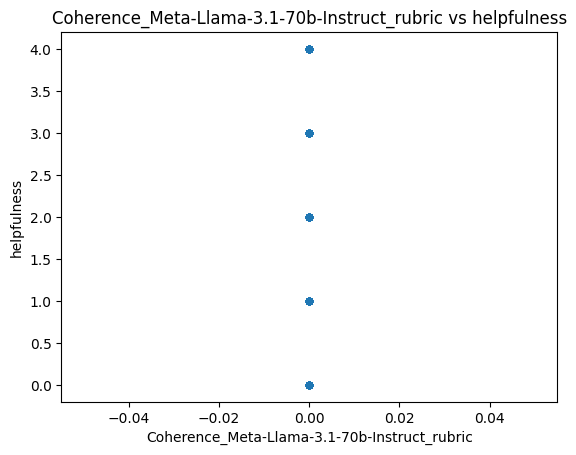

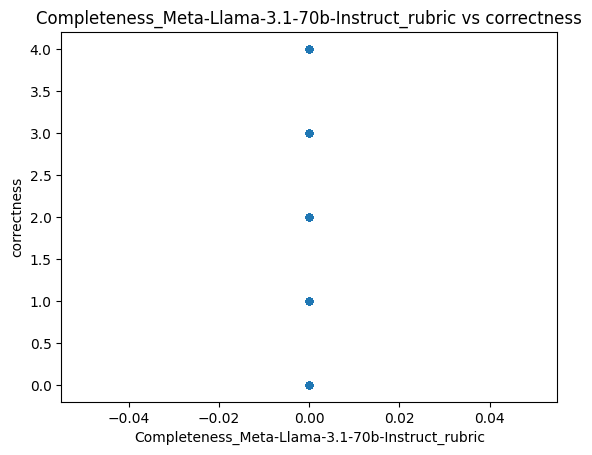

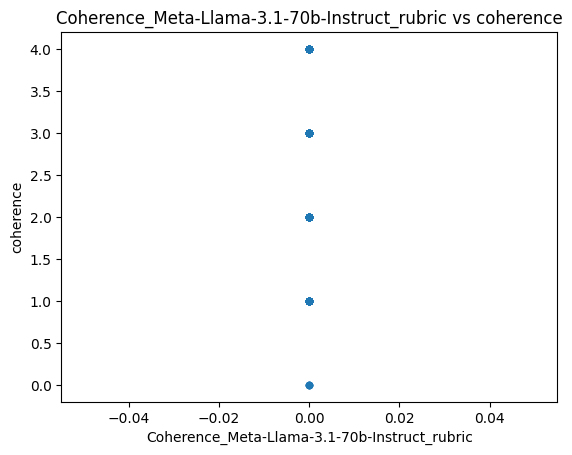

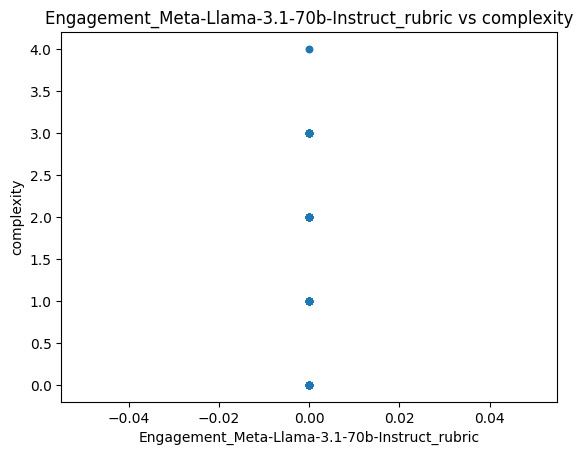

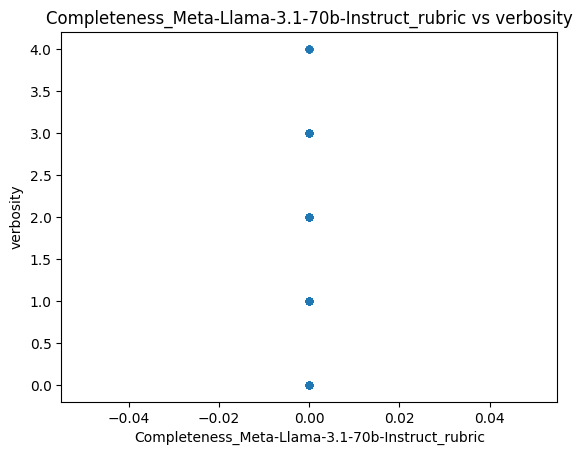

In [17]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
